<a href="https://colab.research.google.com/github/Rochakr4/CAPSTONE-PROJECT-3--Cardiovascular-Risk-Prediction/blob/main/CAPSTONE_PROJECT_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [3]:
#libraries used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer


# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Mounting drive to google account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

# Data preprocessing

In [6]:
data_df.head()#how does the data set looklike

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [7]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [8]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [9]:
#Running describe function
data_df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [10]:
#Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

## NaN value handling

In [11]:
#Checking Nan Value count
data_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

For Nan value handling iam simple imputer("most_frequent") for categorical features and Knn imputer for numerical features.

In [12]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [13]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

## Distribution and outlier analysis

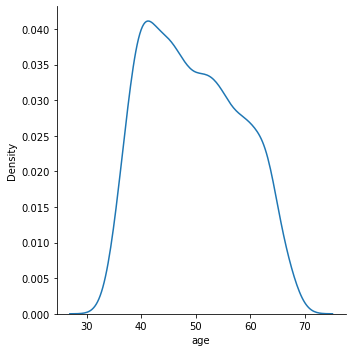

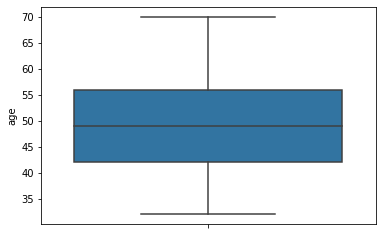

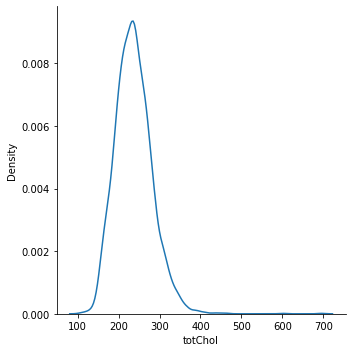

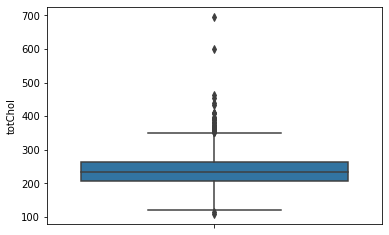

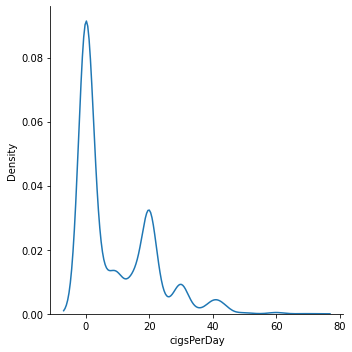

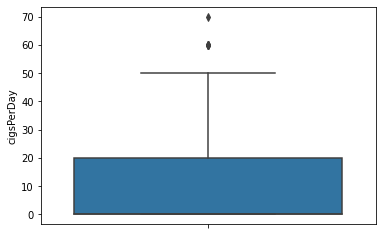

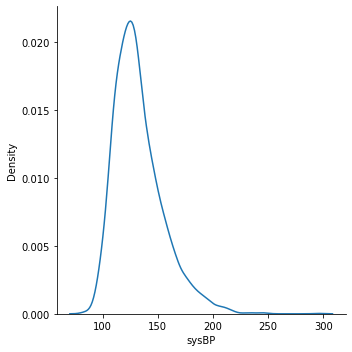

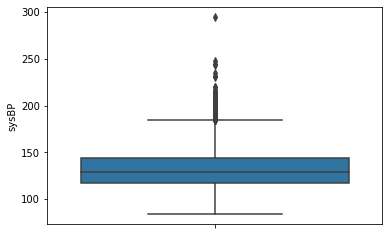

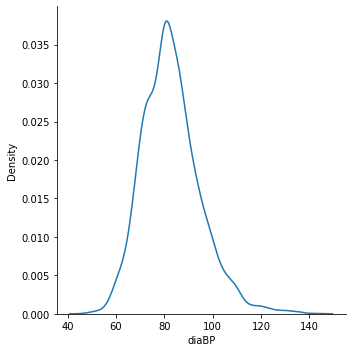

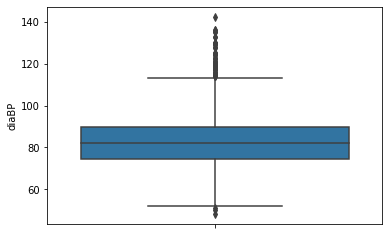

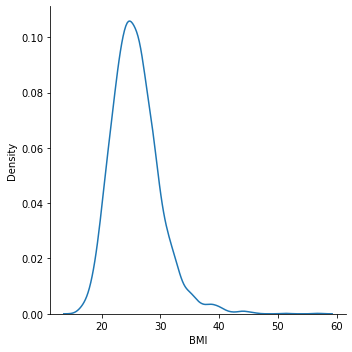

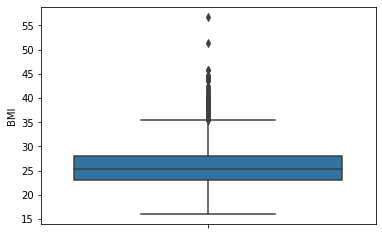

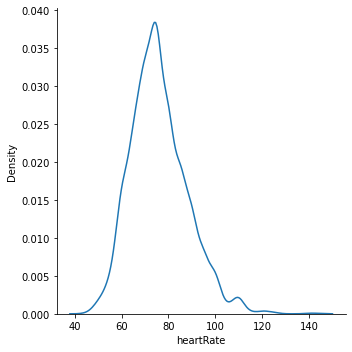

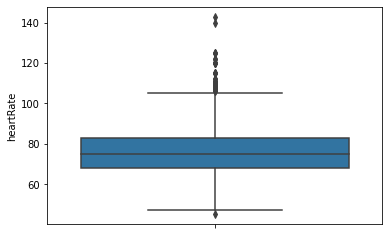

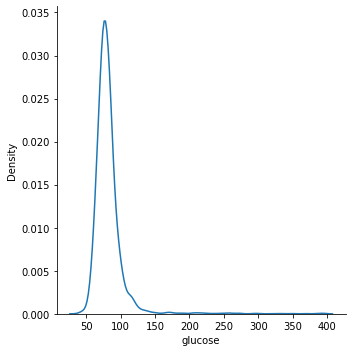

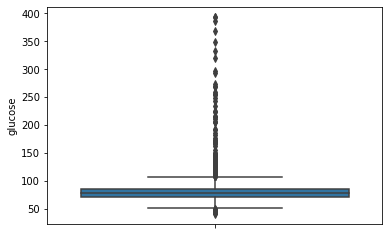

In [14]:
#Disrtribution and outlier analysis
for v in num_features:
   sns.displot(data=data_df, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data_df,y=v)#boxplot for outlier analysis
   plt.show()

REMARKS:

1.   No outliers and good distribution is observed in age feature.
2.   Outliers are observed in 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose' features.

So, in order to handle those outliers IQR method is implemented.


In [15]:
#Implementing IQR method 
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data_df[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data_df[v] = data_df[v].apply(lambda x : min_lim if x < min_lim else x)
   data_df[v] = data_df[v].apply(lambda x : max_lim if x > max_lim else x)

Since 'glucose' feature is having very high outliers, Iam assigning max limit as 145(because glucose level above 145 is considered to high)


In [16]:
#Implementing IQR method 
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


In [17]:
data_df.groupby('TenYearCHD')['id'].count()

TenYearCHD
0    2879
1     511
Name: id, dtype: int64

# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





## Analysing each categorical feature with respect to each other

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

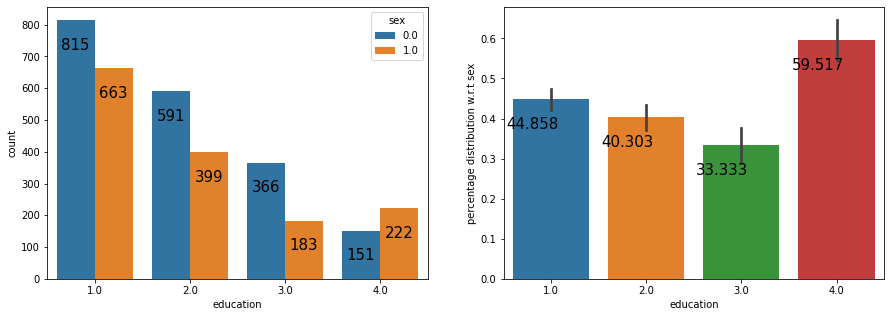

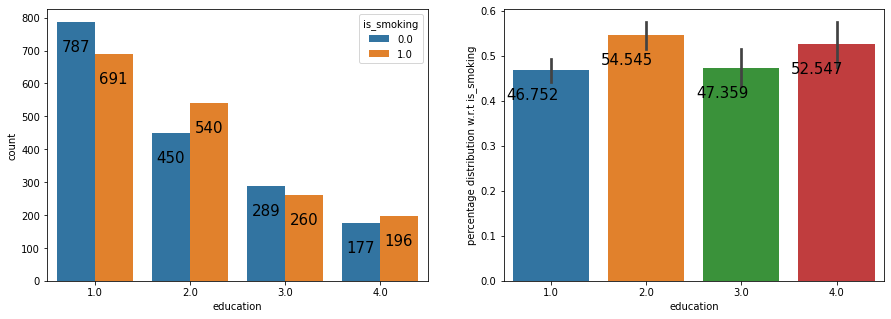

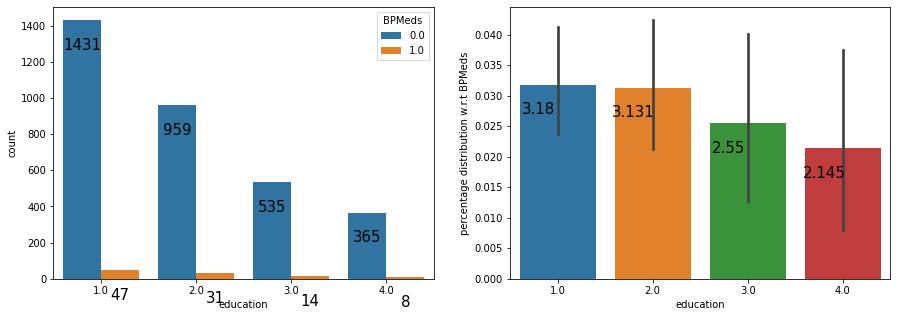

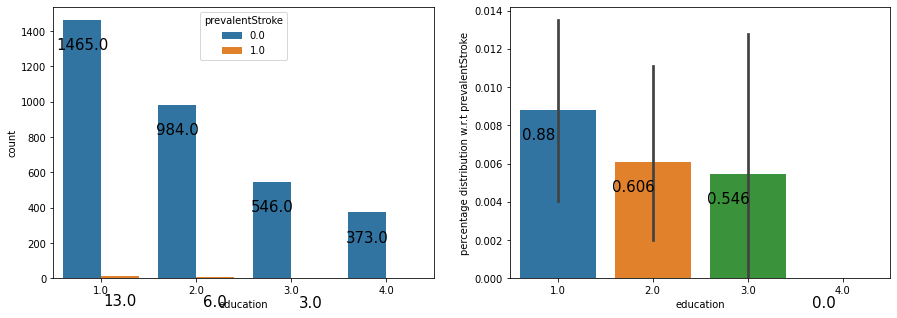

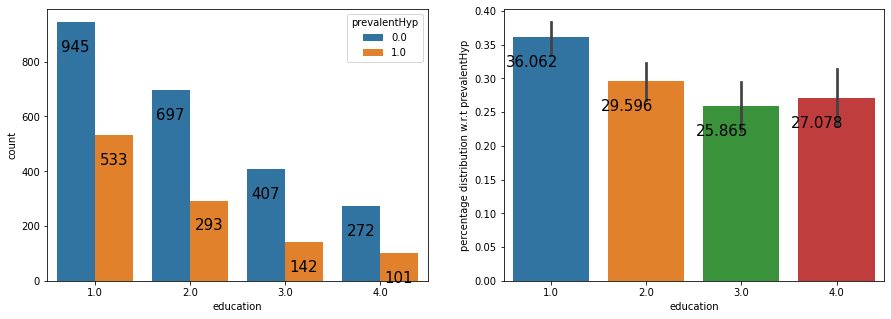

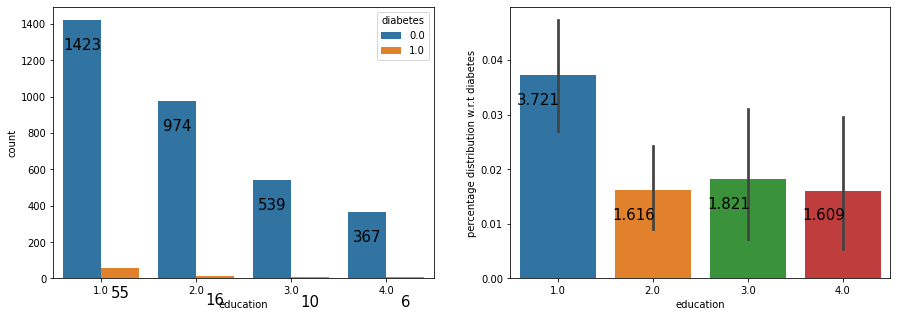

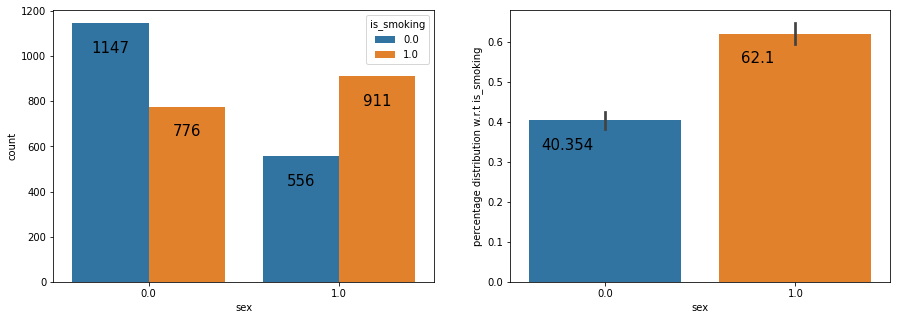

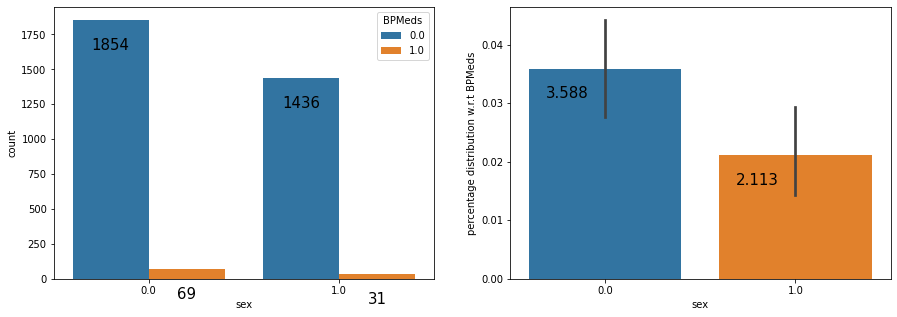

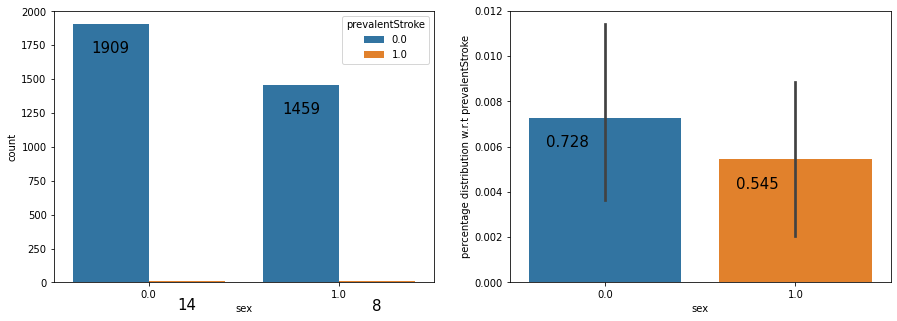

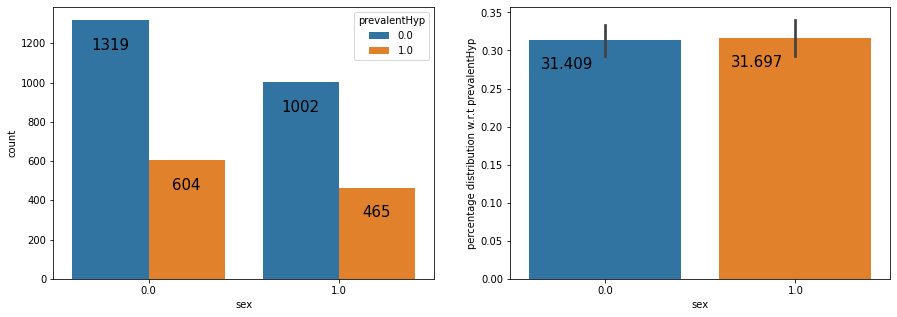

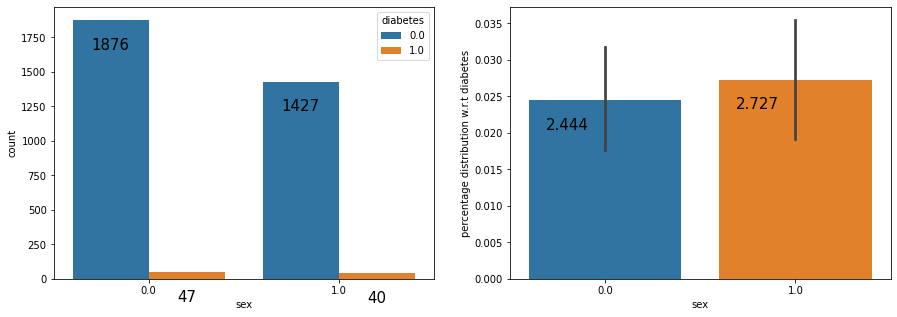

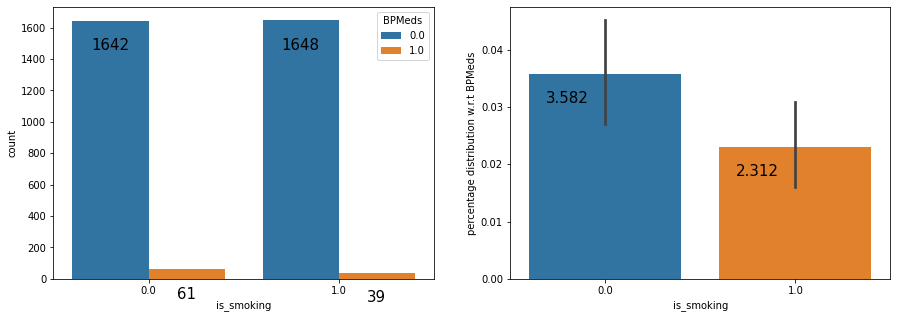

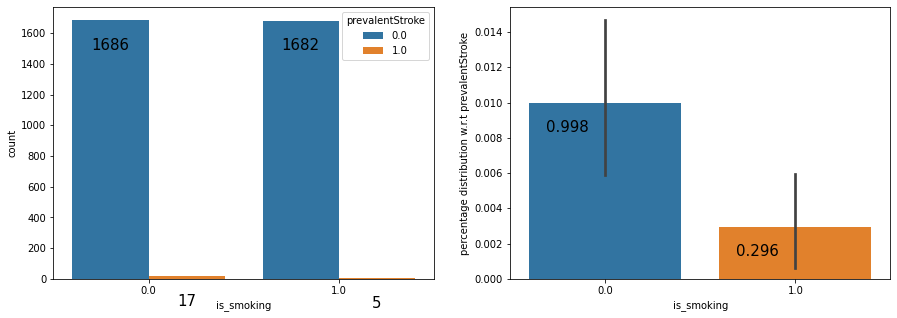

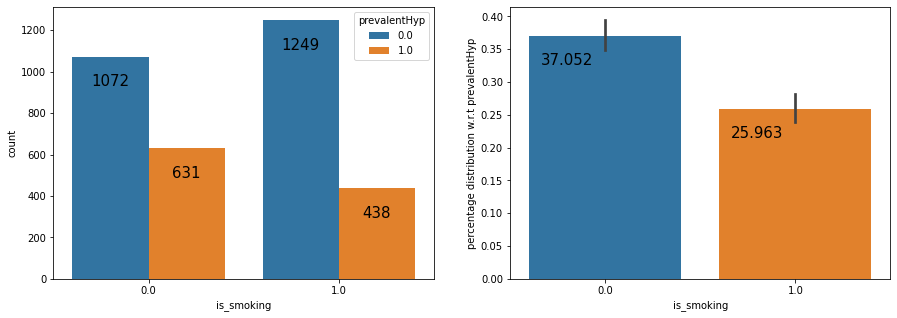

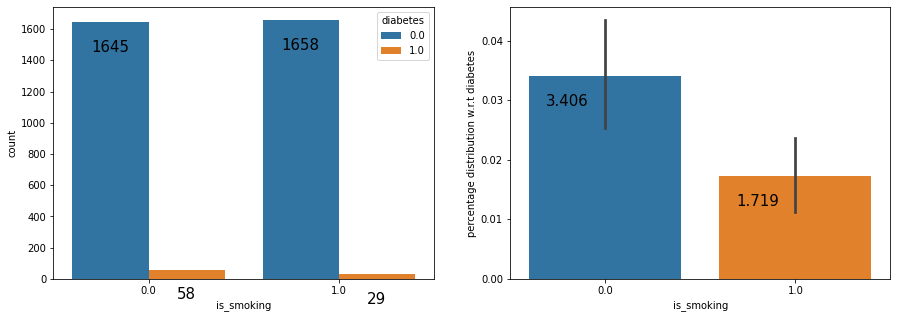

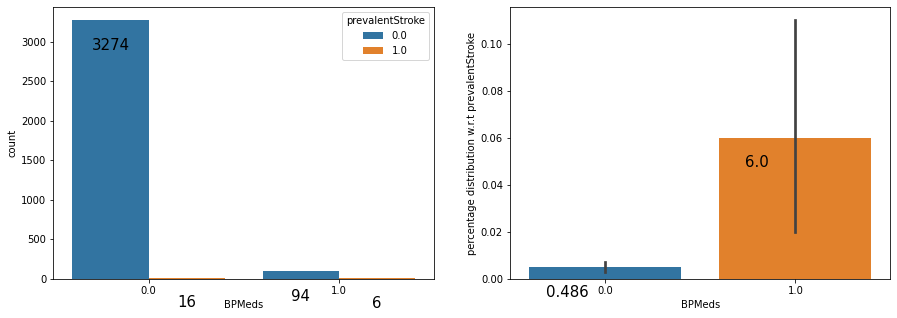

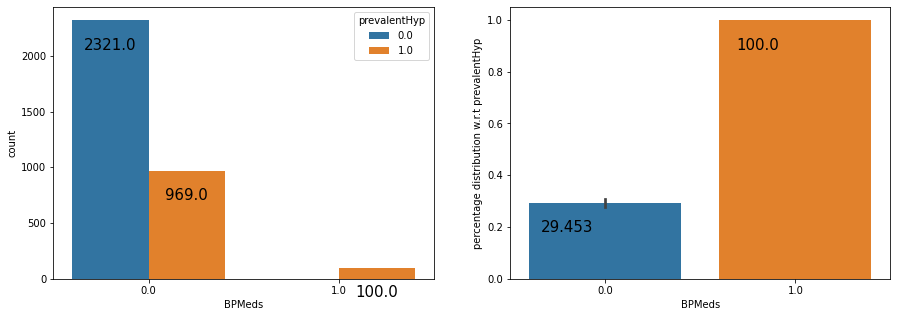

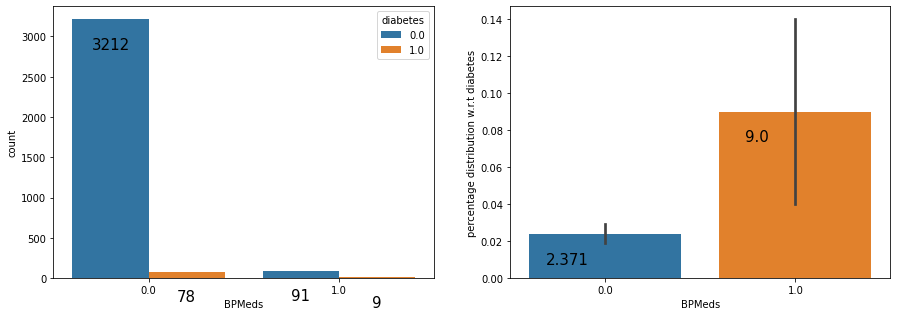

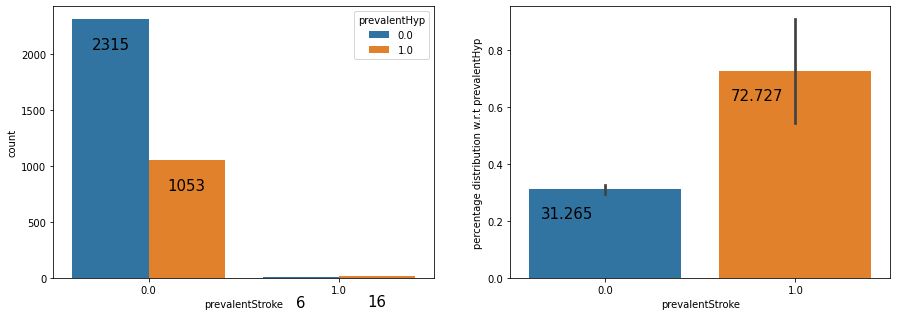

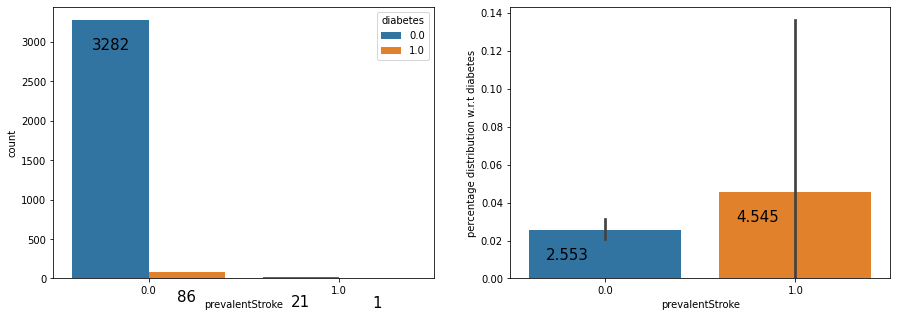

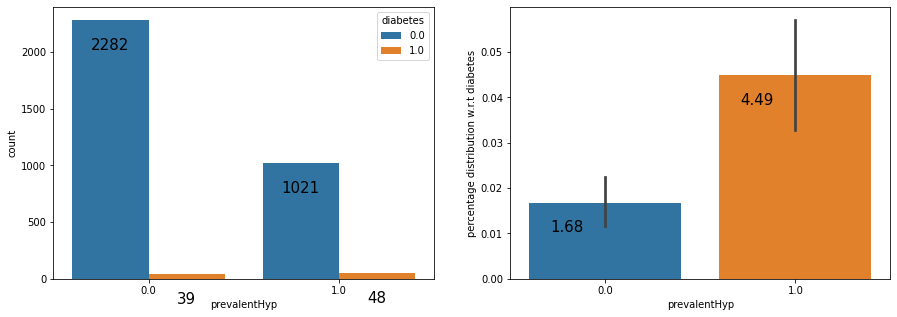

In [18]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   37% of non-smokers tend to have hypertension issues compared to 25% of smokers.
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance of 72% of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









## Categorical features with respect to target feature

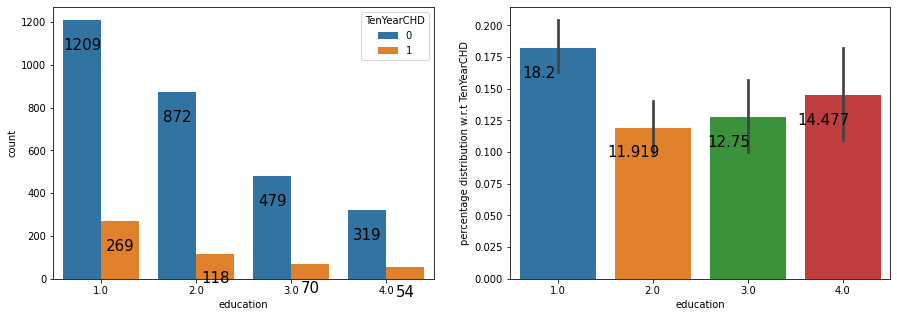

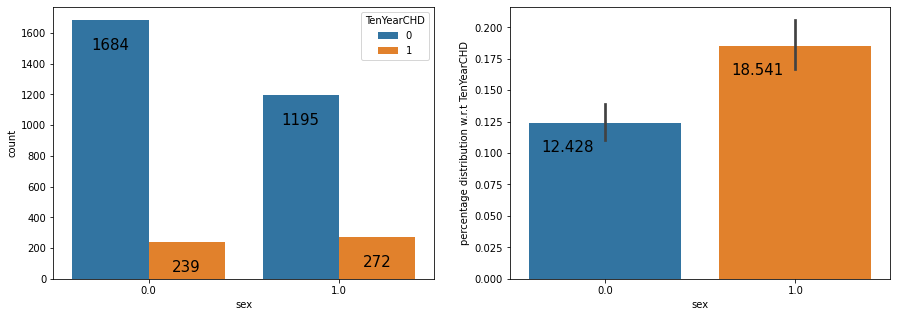

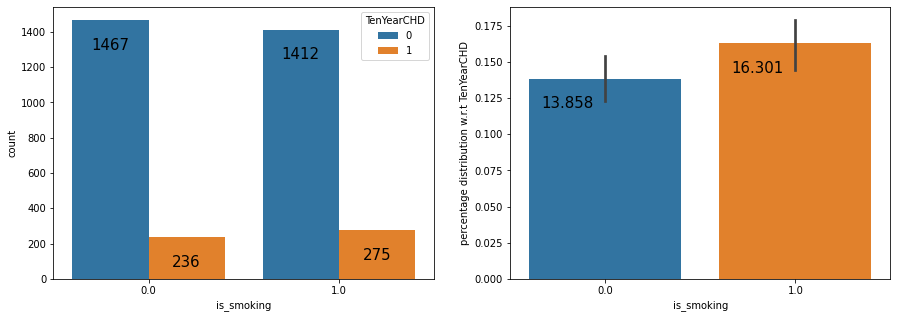

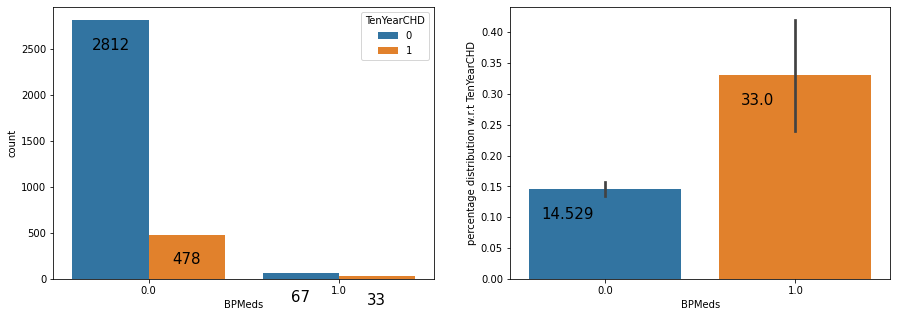

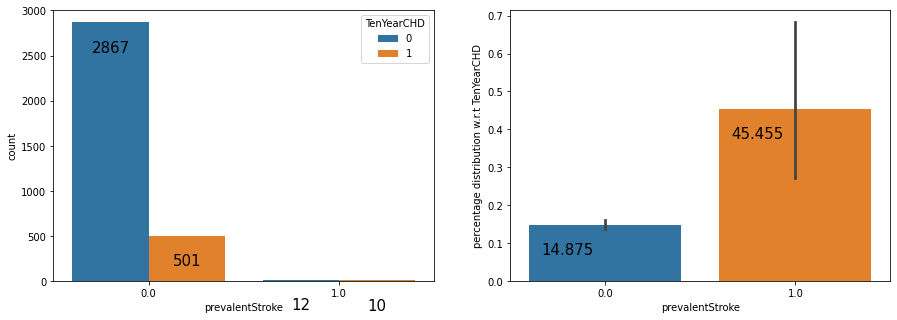

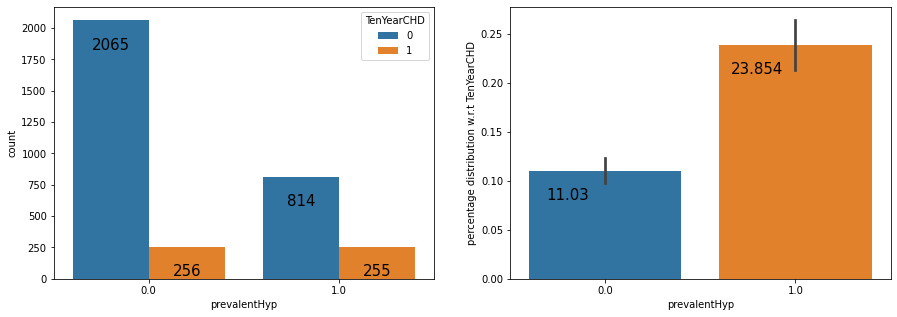

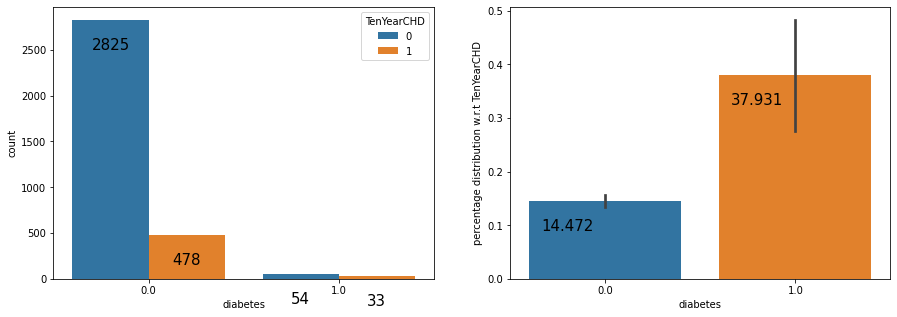

In [19]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



## Analysing Numerical features with respect to other categorical features

### Analysis with respect to age

**Analysising age feature with respect to other categorical features :**

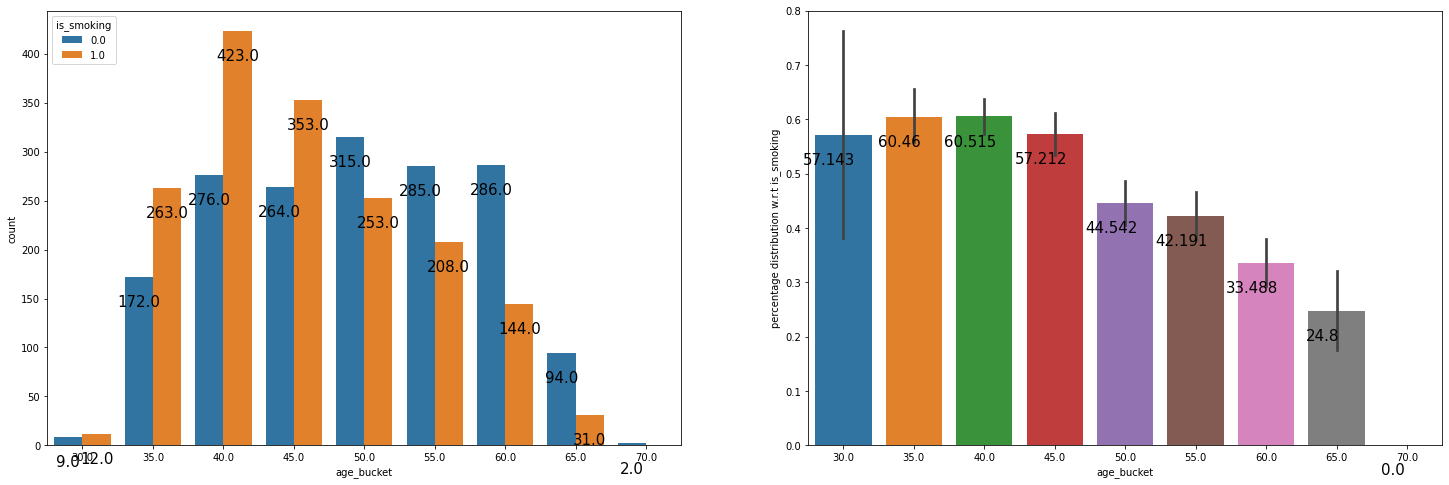

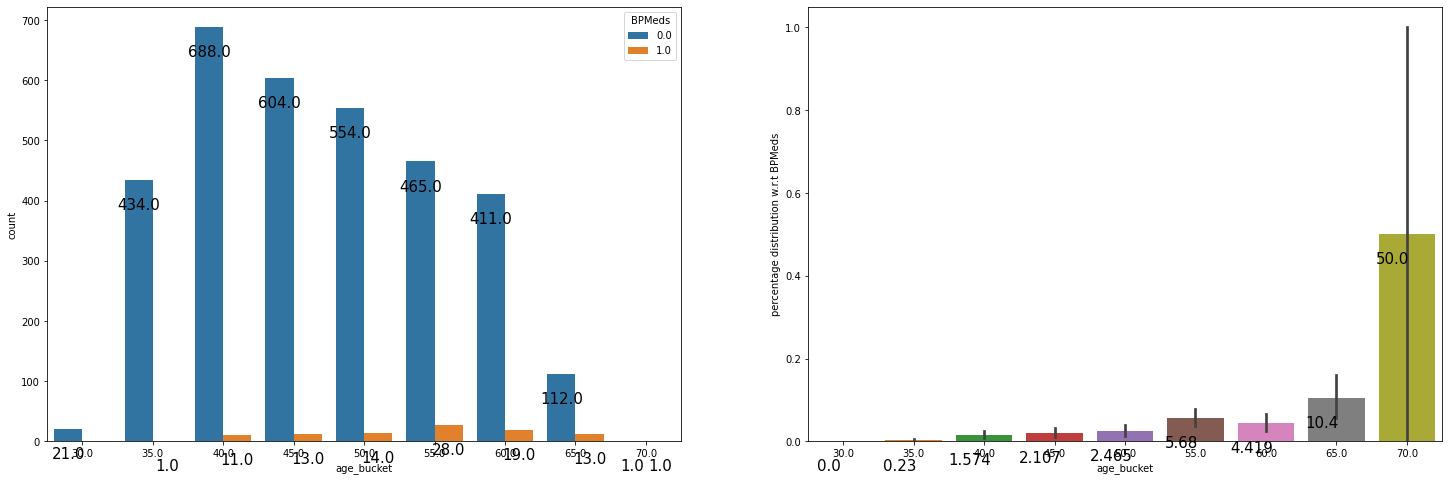

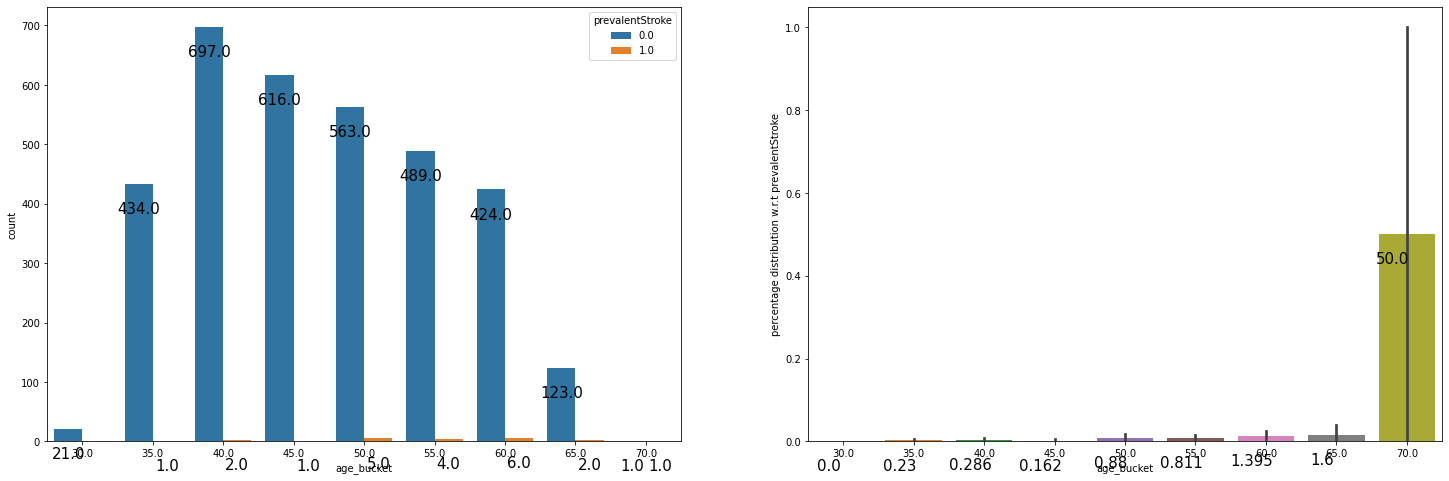

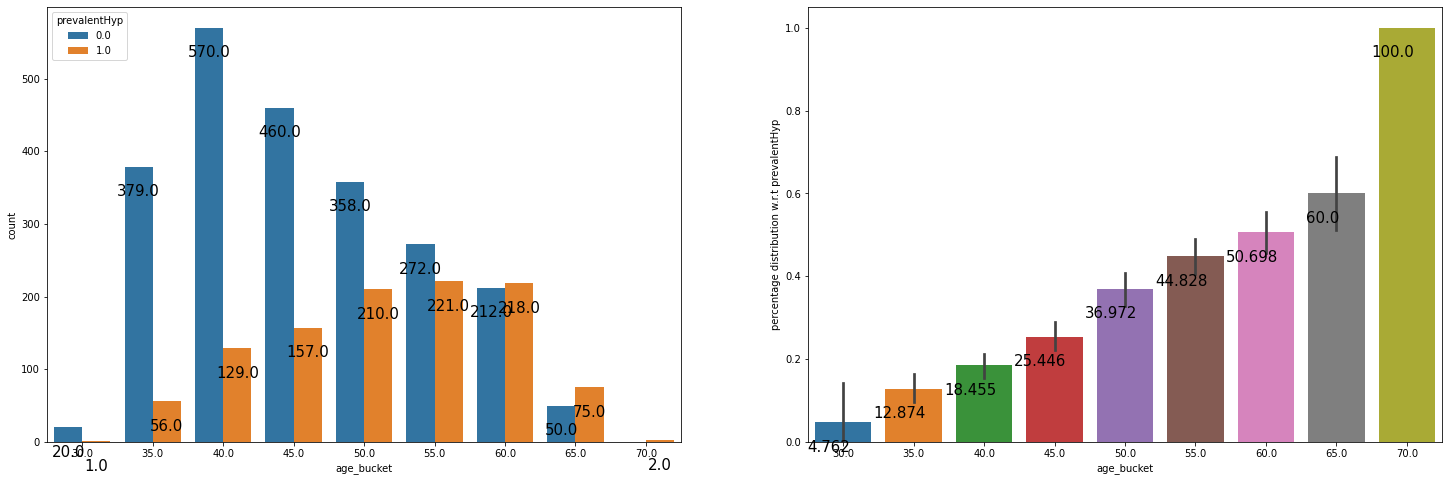

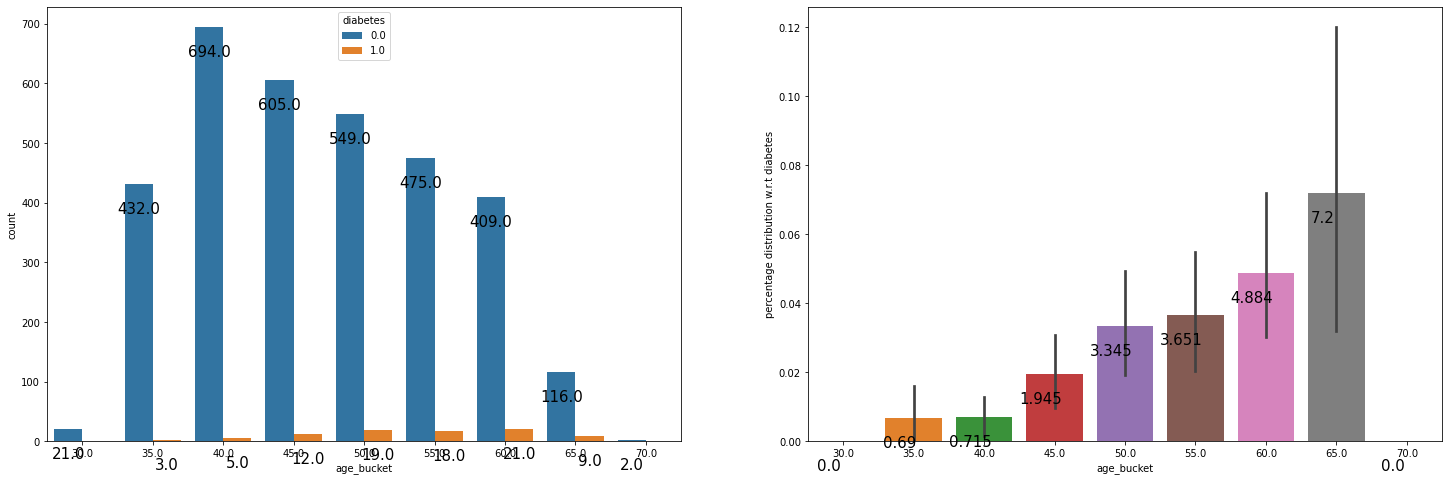

In [20]:
#For better further analysis binning is implemented on age feature
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Smoking habits tend to decrease with an increase in age.
*   Bp, hypertension and diabetes issues tend to increase with increases in age.



### Analysis with respect to totChol

In [21]:
#Implementing IQR method 
vals = data_df.totChol.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['totChol'] = data_df['totChol'].apply(lambda x : min_lim if x < min_lim else x)
data_df['totChol'] = data_df['totChol'].apply(lambda x : max_lim if x > max_lim else x)

0.25    206.0
0.75    264.0
Name: totChol, dtype: float64


**Analysising totChol feature with respect to other categorical features :**

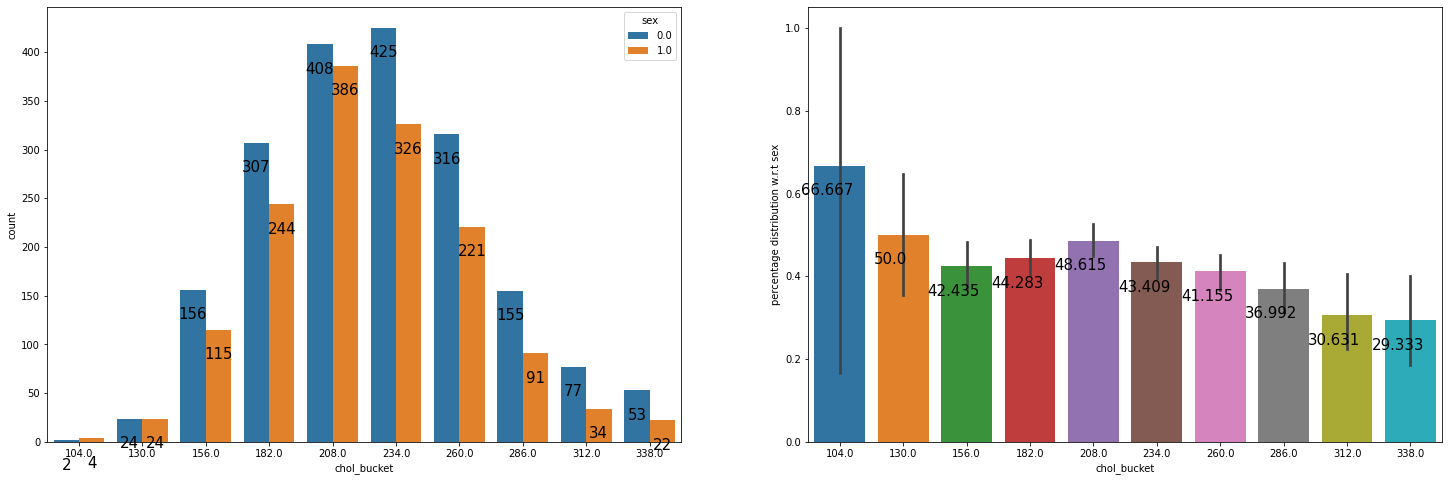

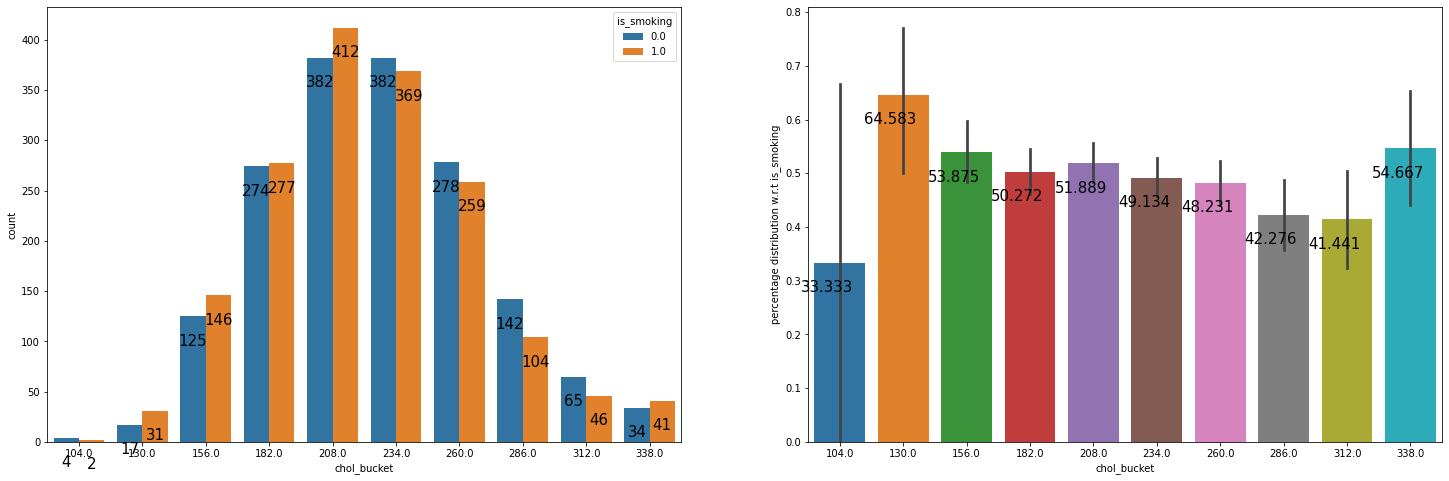

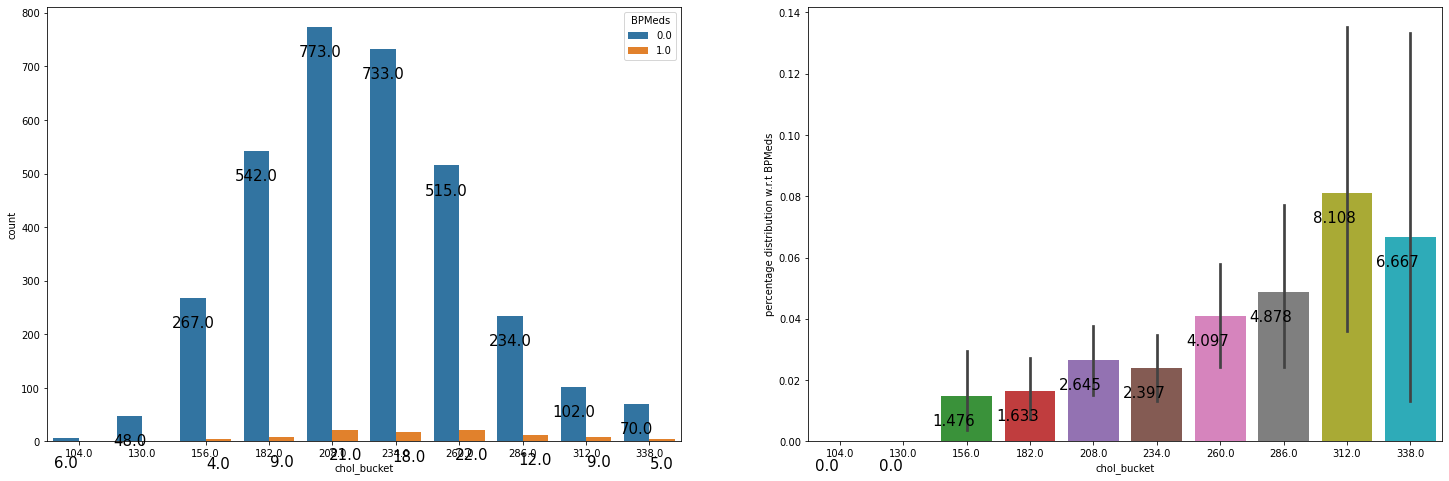

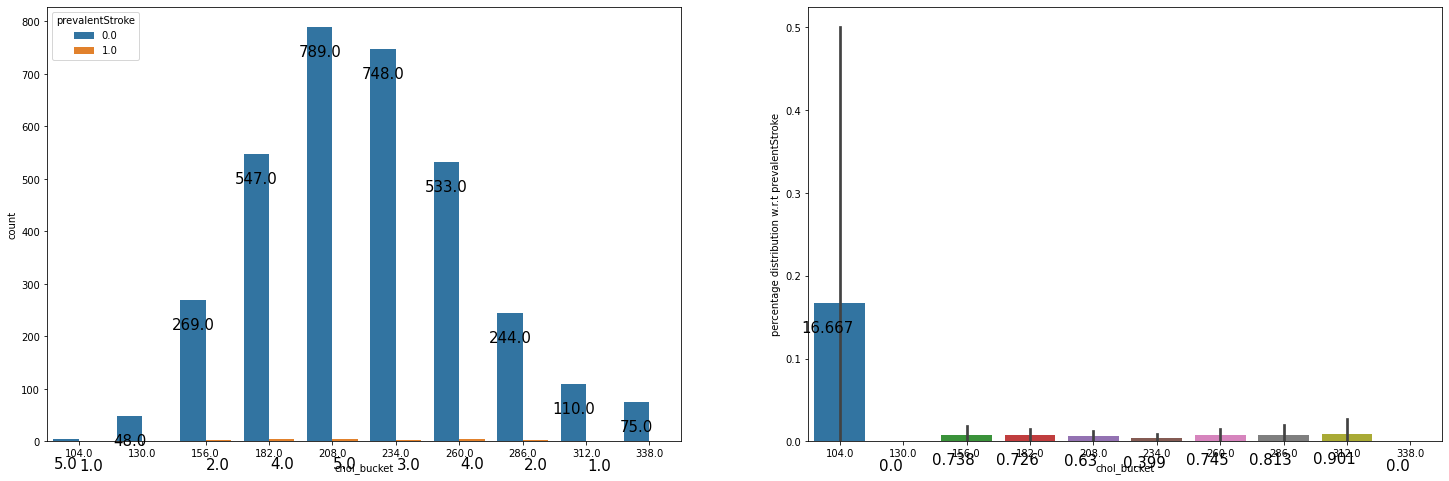

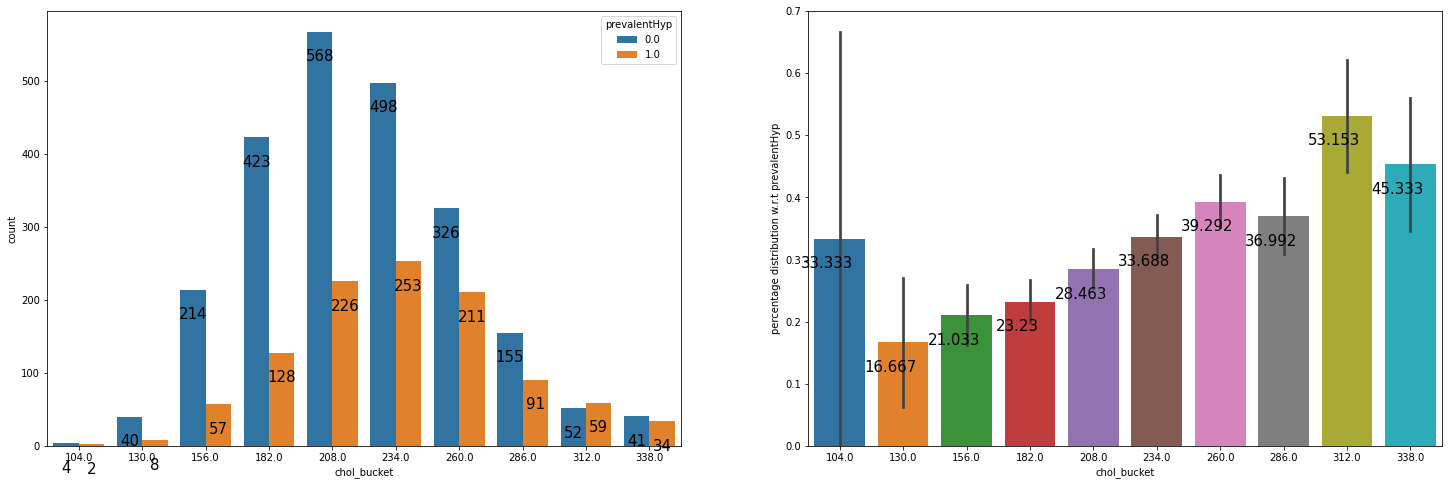

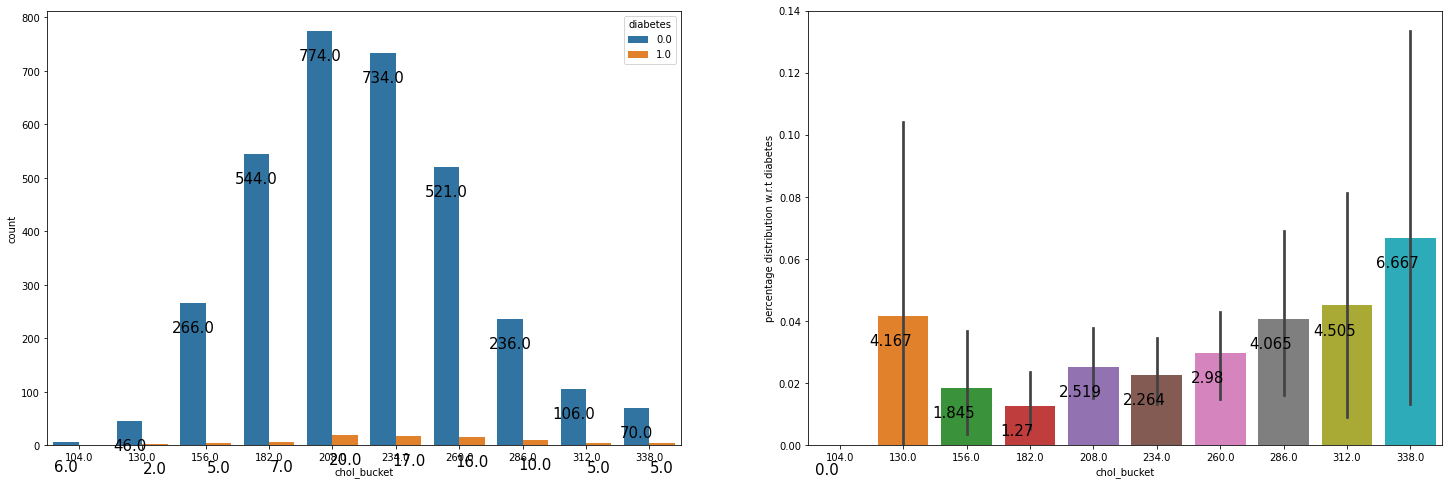

In [22]:
#For better further analysis binning is implemented on age feature
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='chol_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

  vh=sns.barplot('chol_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:



*   Females tend to have higher cholesterol levels compared to males.
*   Bp and hypertension issues tend to increase with an increase in cholesterol levels



### **Analysis with respect to cigsPerDay**

In [23]:
#Implementing IQR method 
vals = data_df.cigsPerDay.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : min_lim if x < min_lim else x)
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : max_lim if x > max_lim else x)

0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64


**Analysising cigsPerDay feature with respect to other categorical features :**

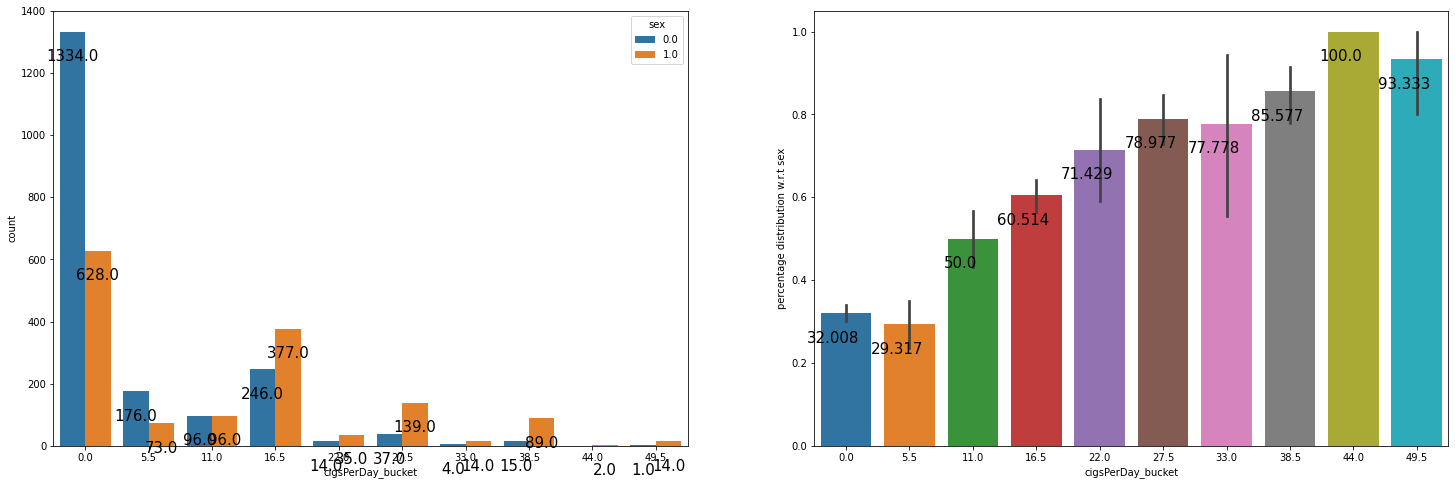

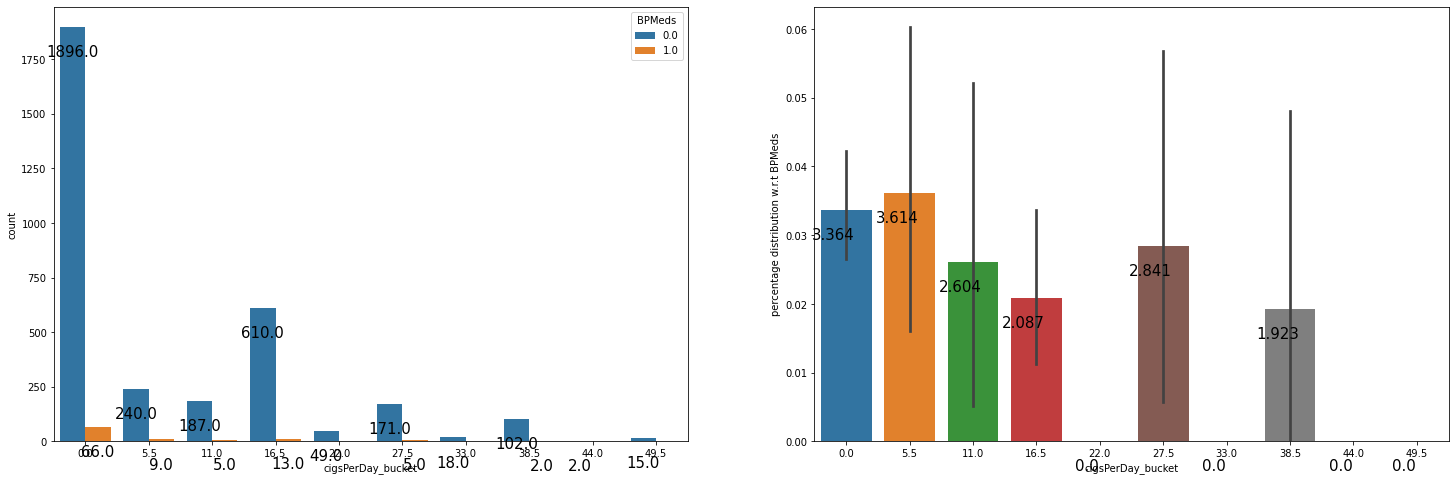

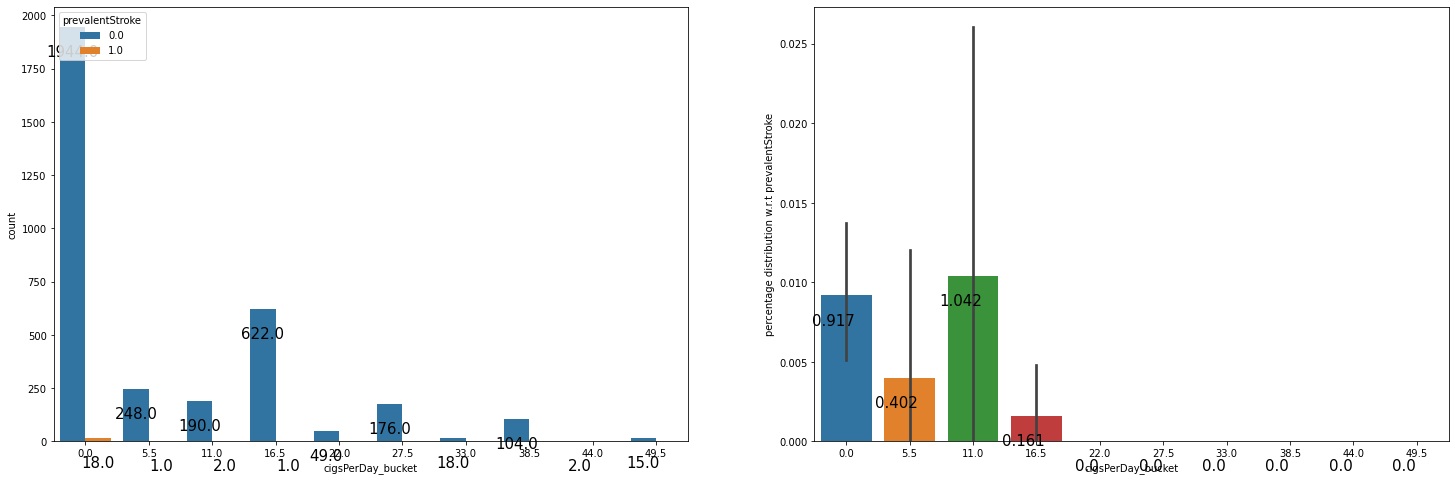

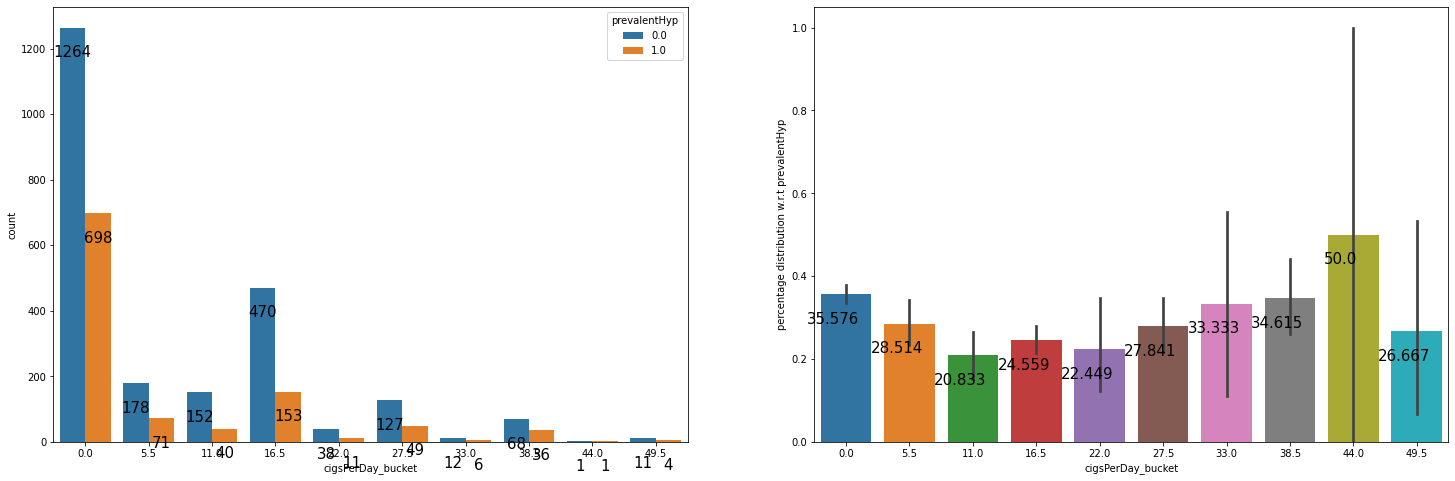

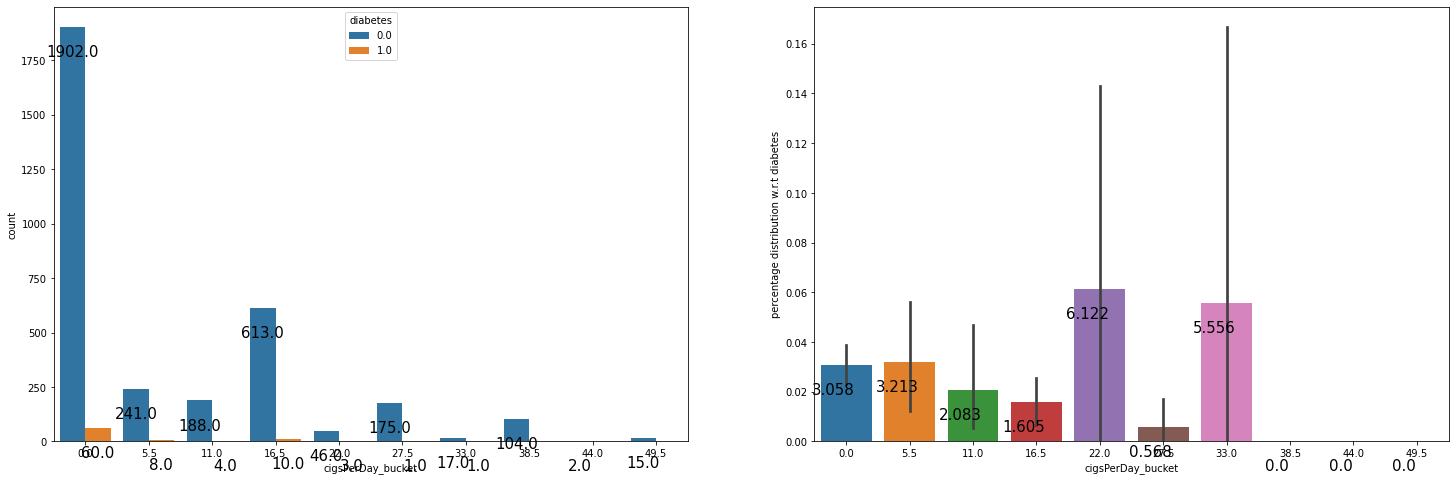

In [24]:
#For better further analysis binning is implemented on age feature
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   Males tend to smoke more cigarettes compared to females.



### Analysis with respect to sysBP

In [25]:
#Implementing IQR method 
vals = data_df.sysBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
#Assigning those outliers with min and max values
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    117.0
0.75    144.0
Name: sysBP, dtype: float64


**Analysising sysBP feature with respect to other categorical features :**

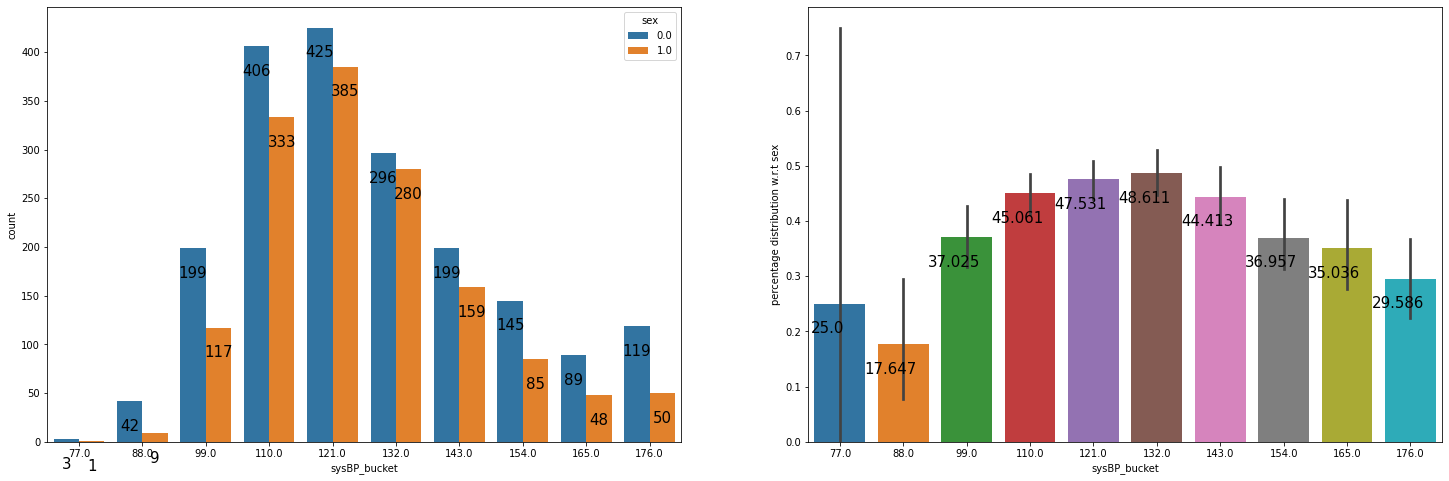

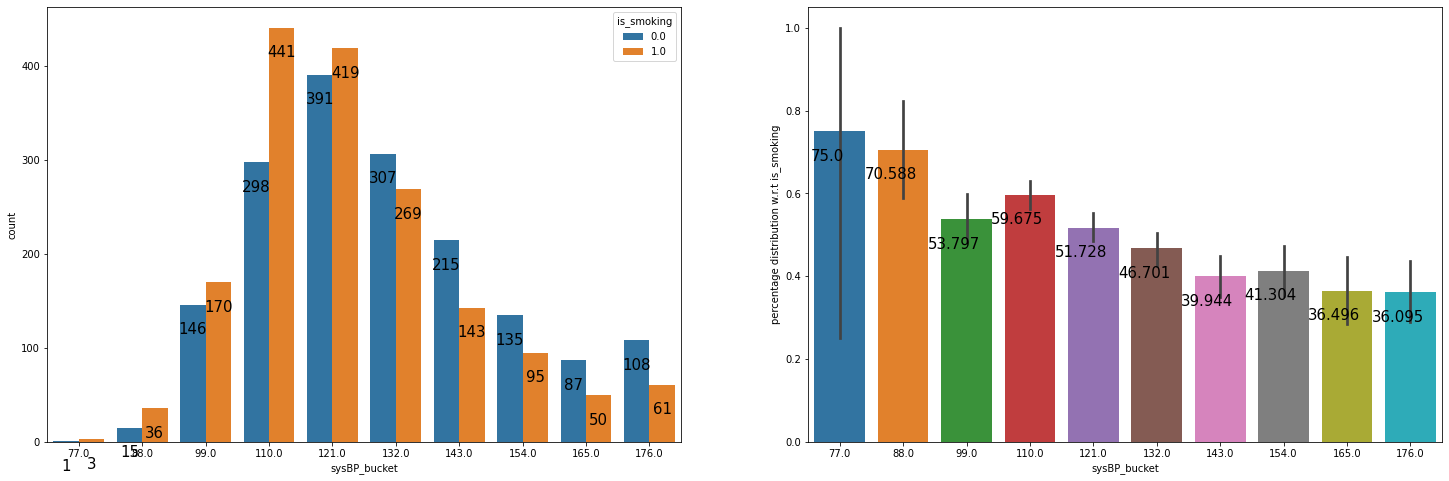

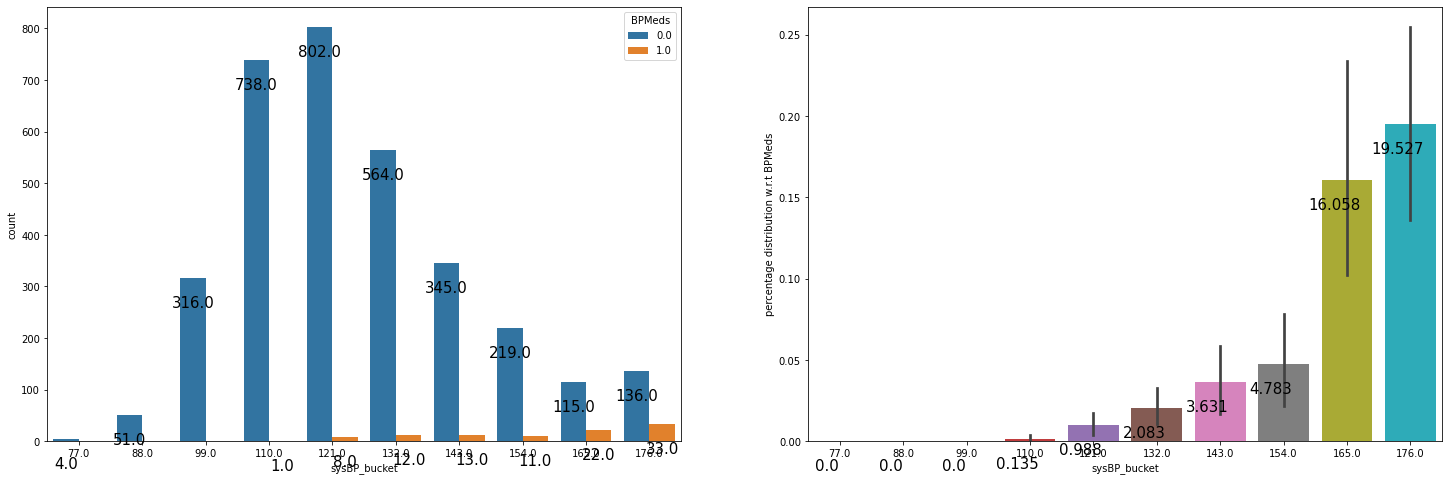

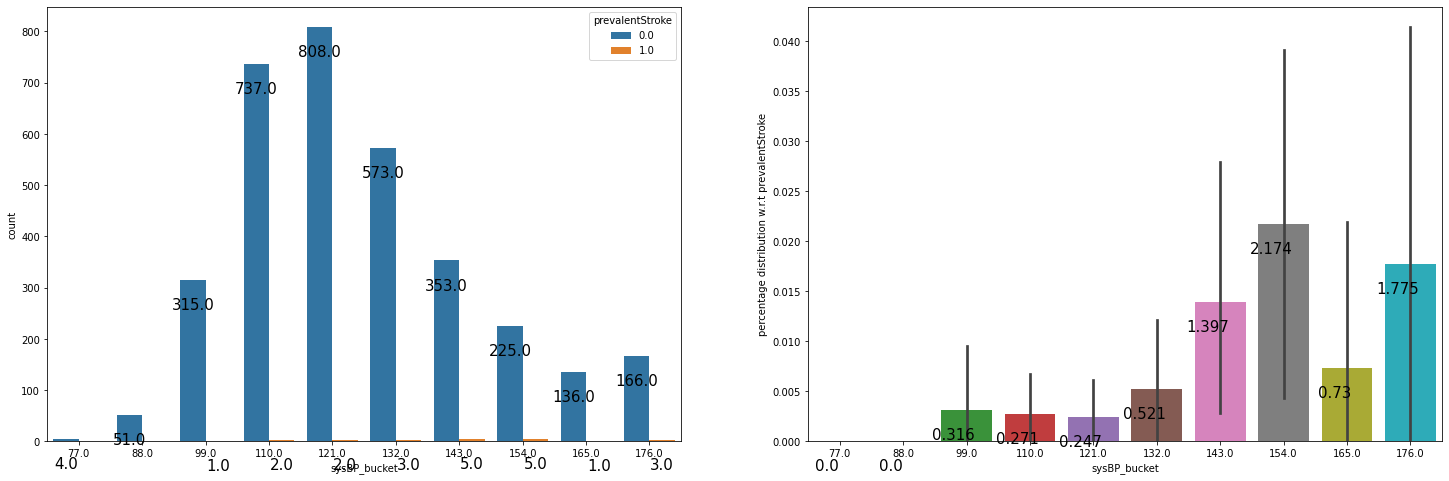

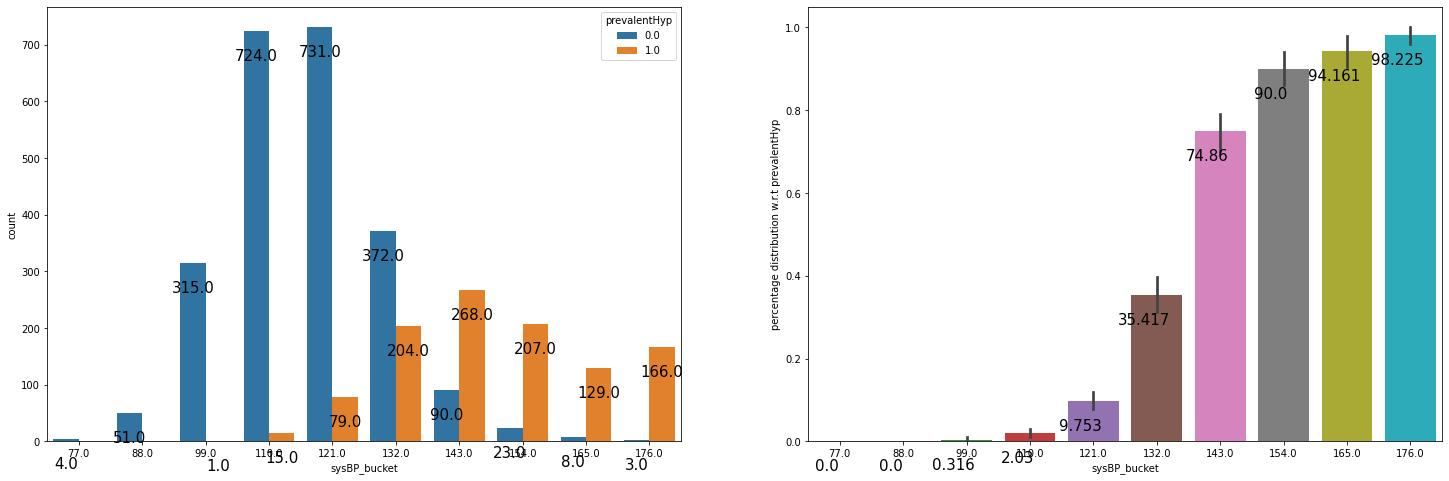

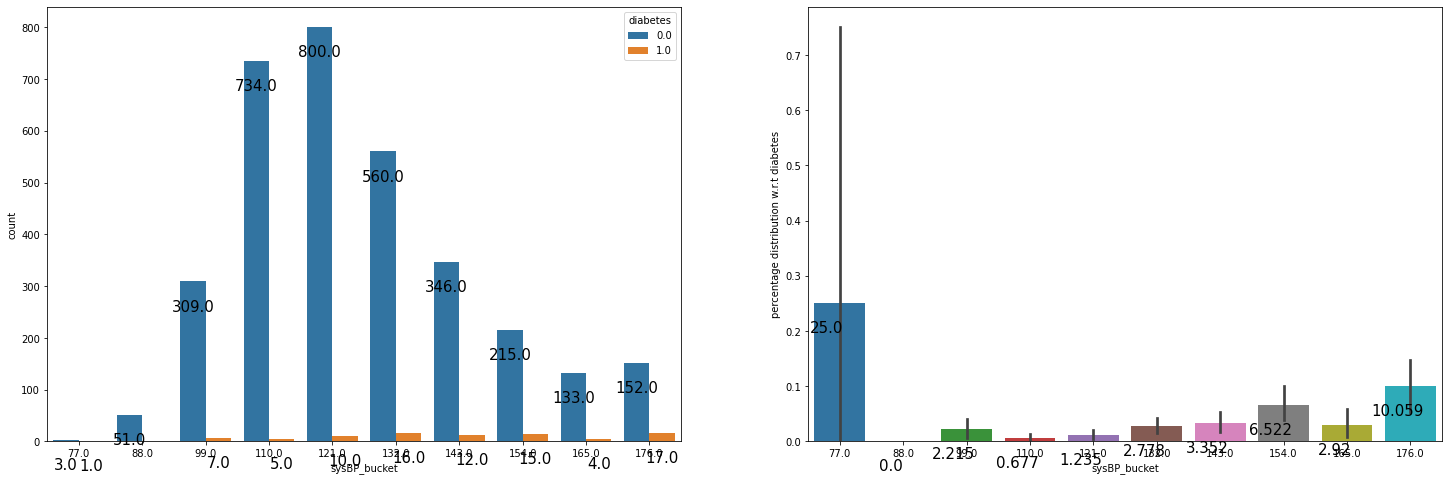

In [26]:
#For better further analysis binning is implemented on age feature
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   SysBp tends to be low for smokers.
*   SysBp tends to be high for people with BP medication and hypertension issues.




### **Analysis with respect to diaBP**

**Analysising diaBP feature with respect to other categorical features :**

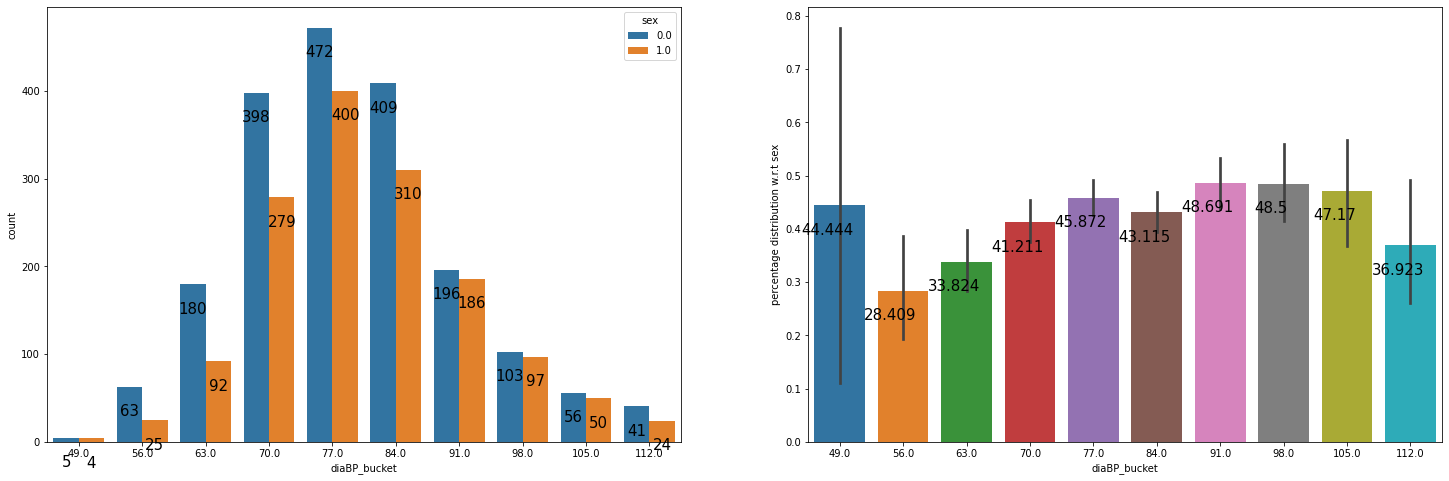

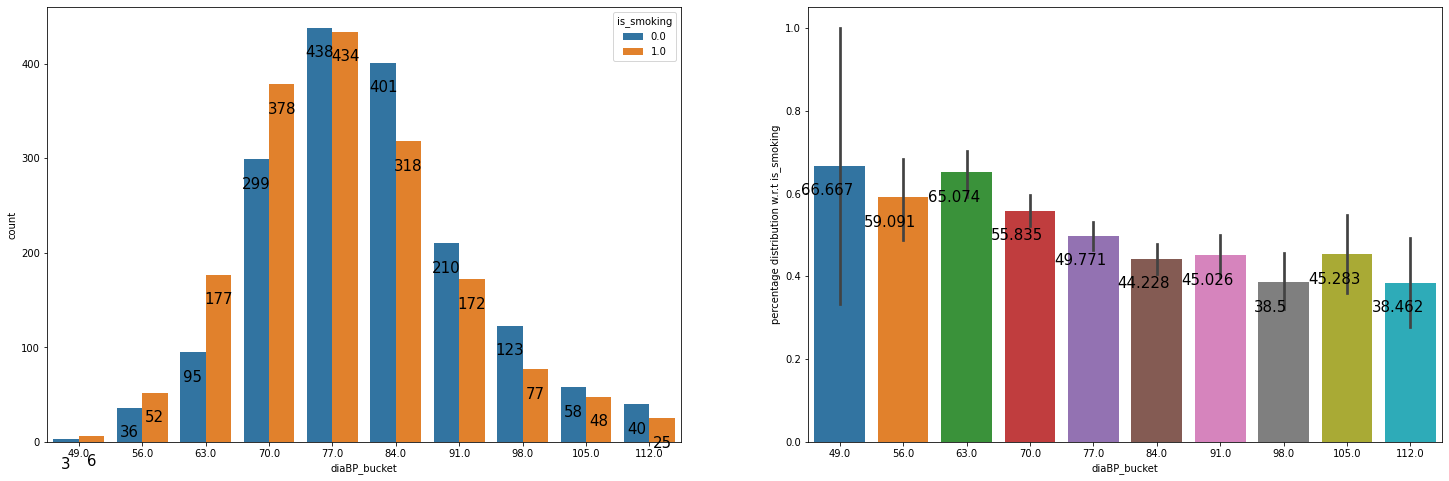

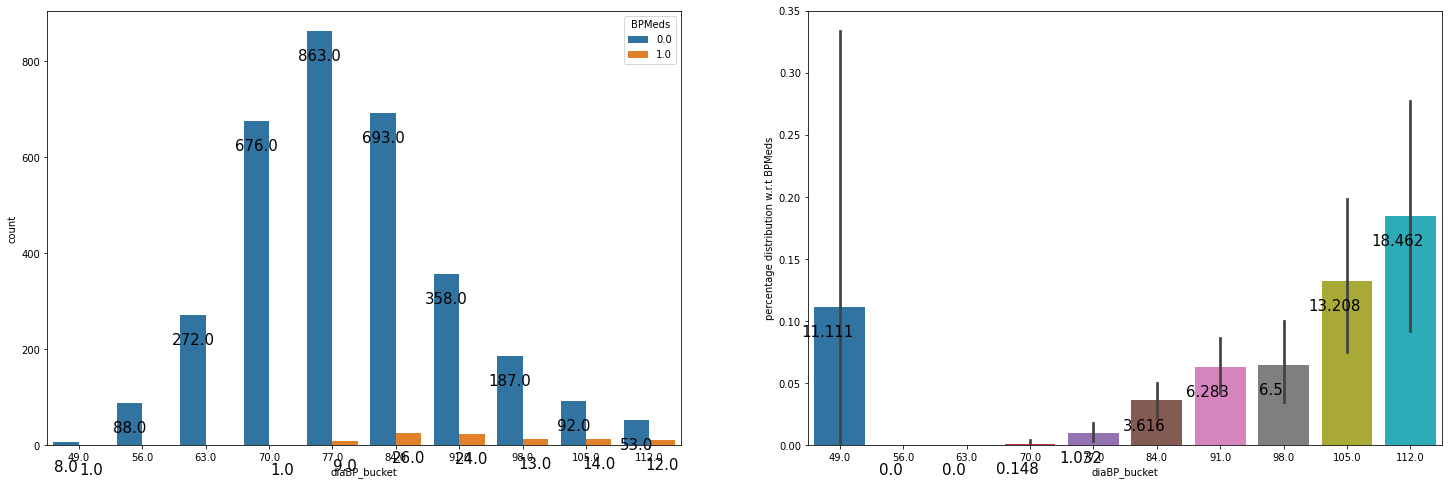

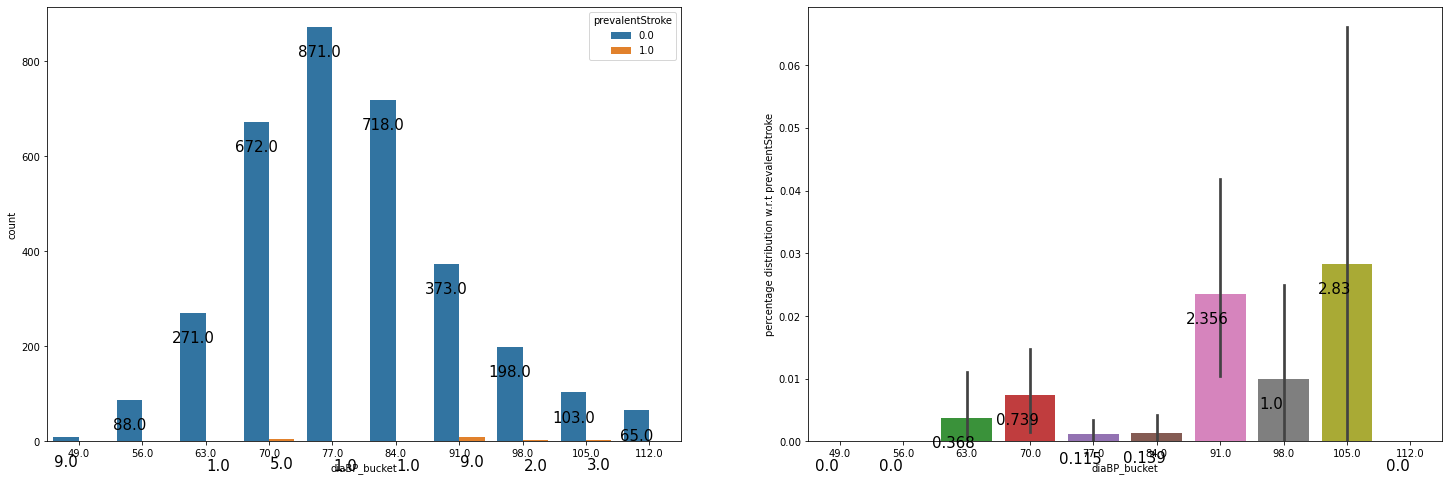

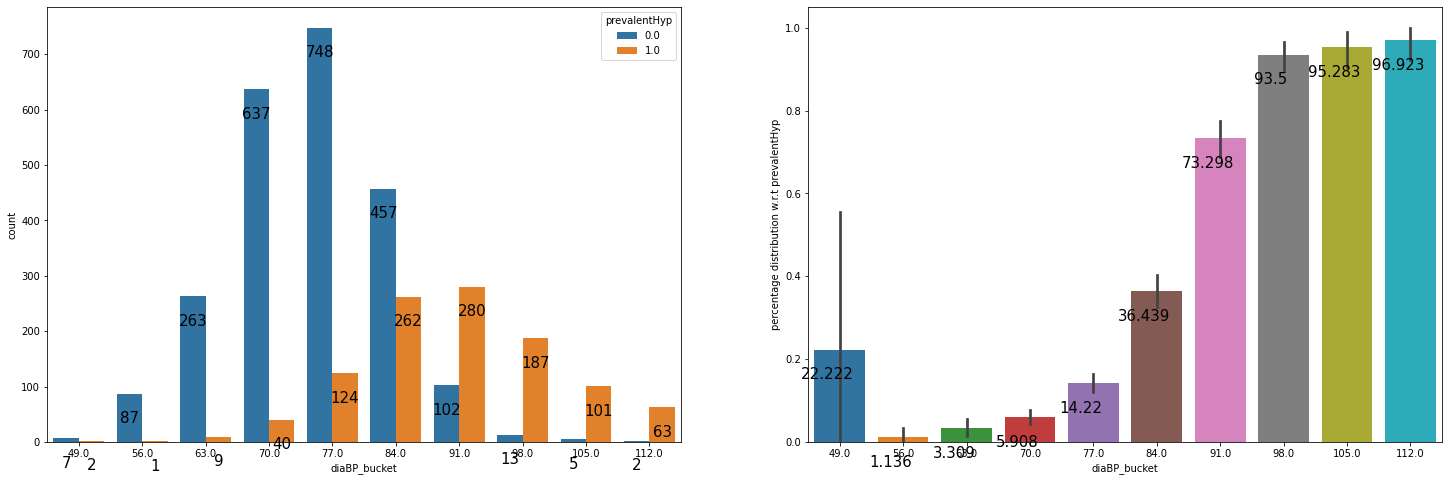

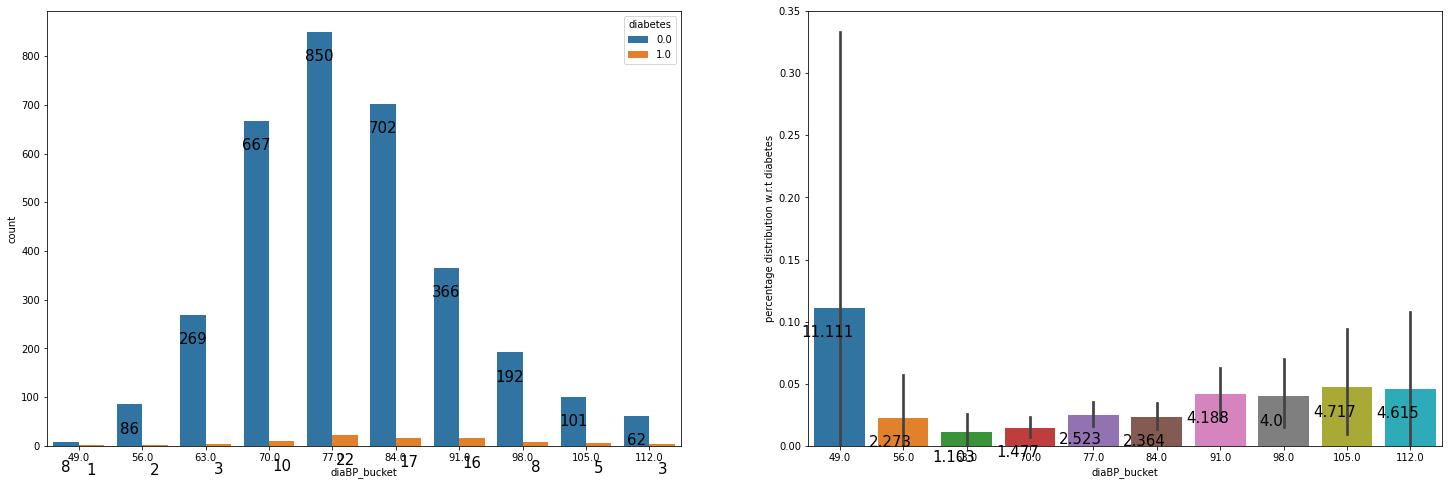

In [27]:
#For better further analysis binning is implemented on age feature
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   DiaBp tends to be low for smokers.
*   DiaBp tends to be high for people with BP medication and hypertension issues.



### **Analysis with respect to BMI**

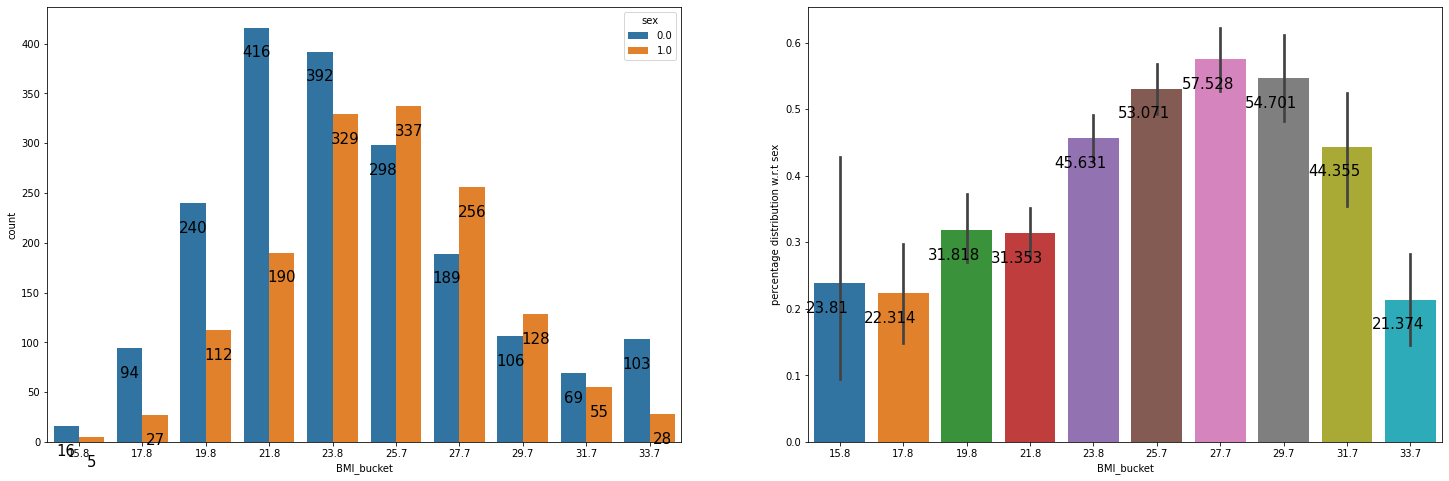

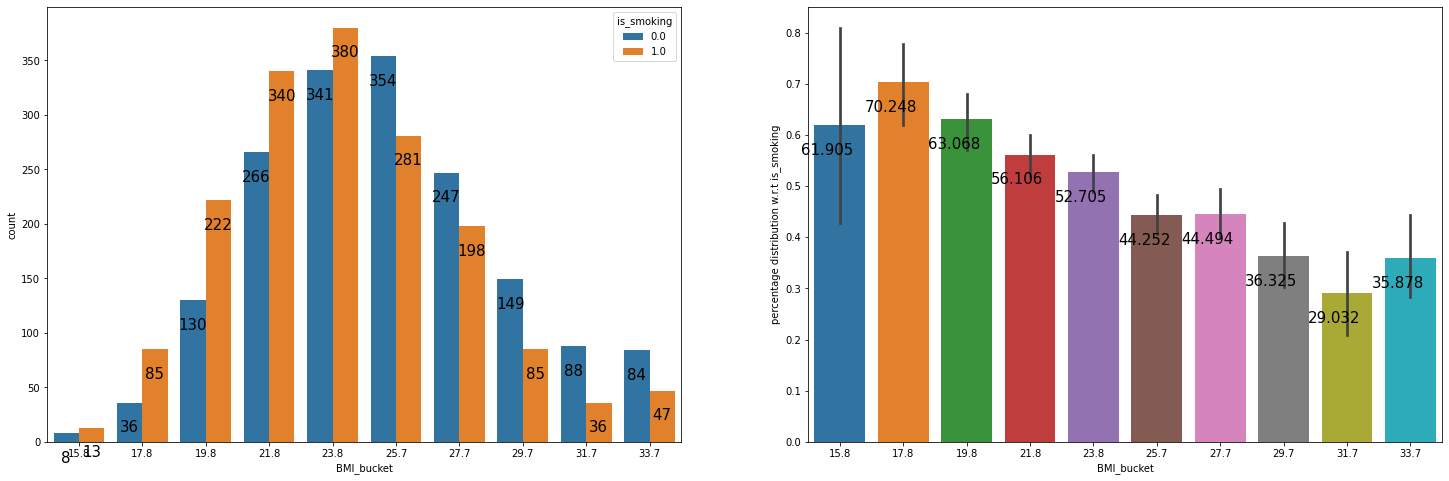

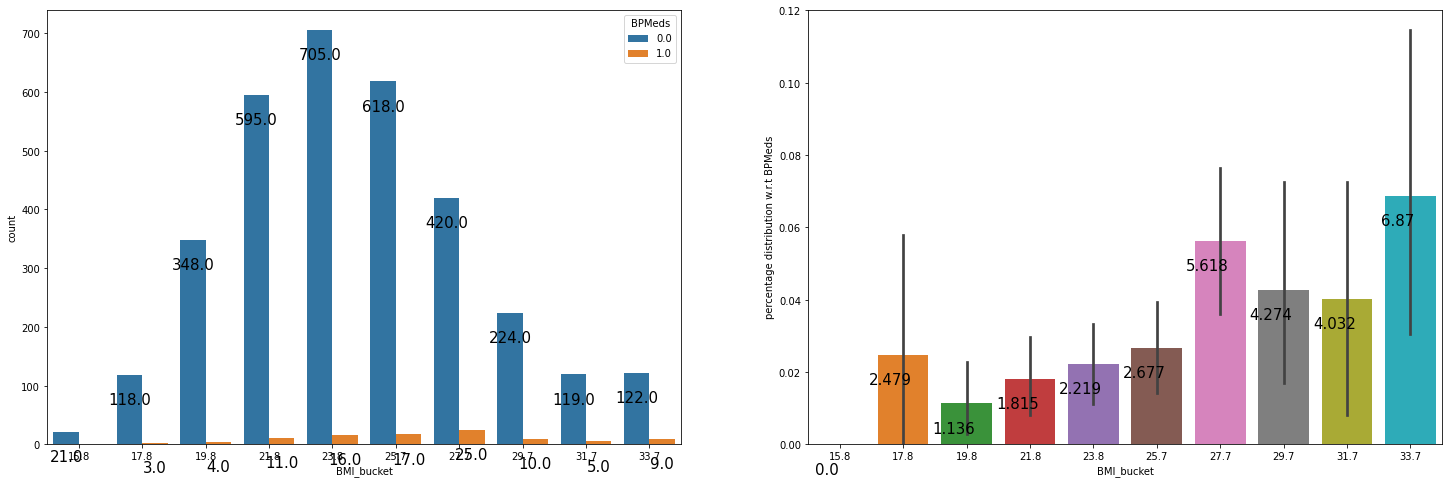

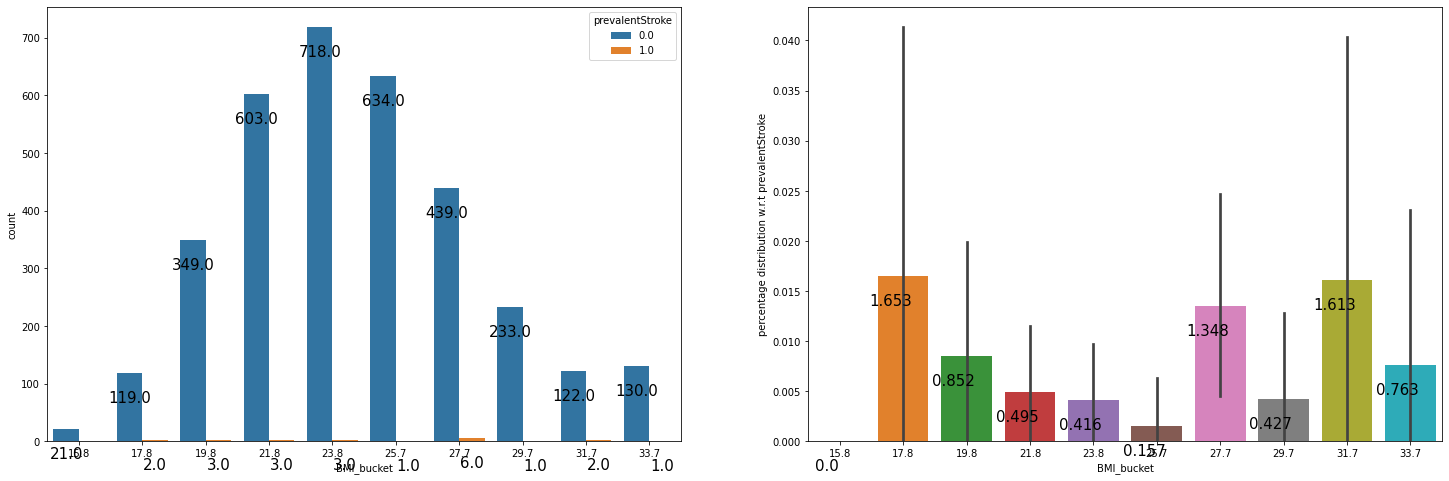

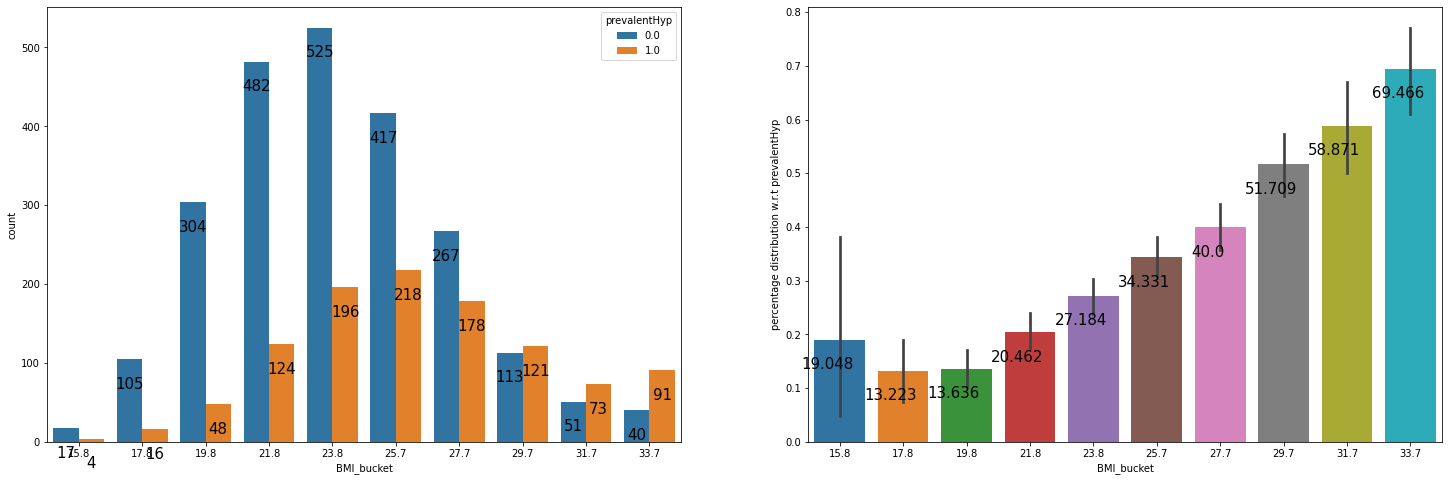

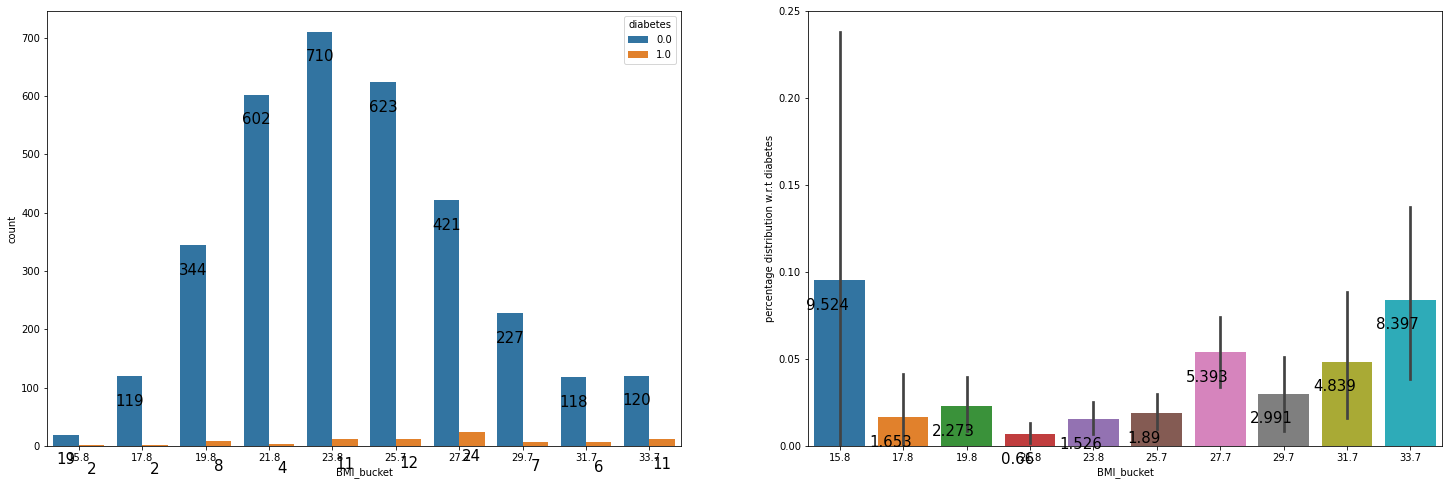

In [28]:
#For better further analysis binning is implemented on age feature
data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   BMI levels from 15 to 22 and 30 to 34 are more prevalent in females.
*   Smokers tend to have lower BMI.
*   People with prevalent hypertension tend to have higher BMI.





### Analysis with respect to heartRate

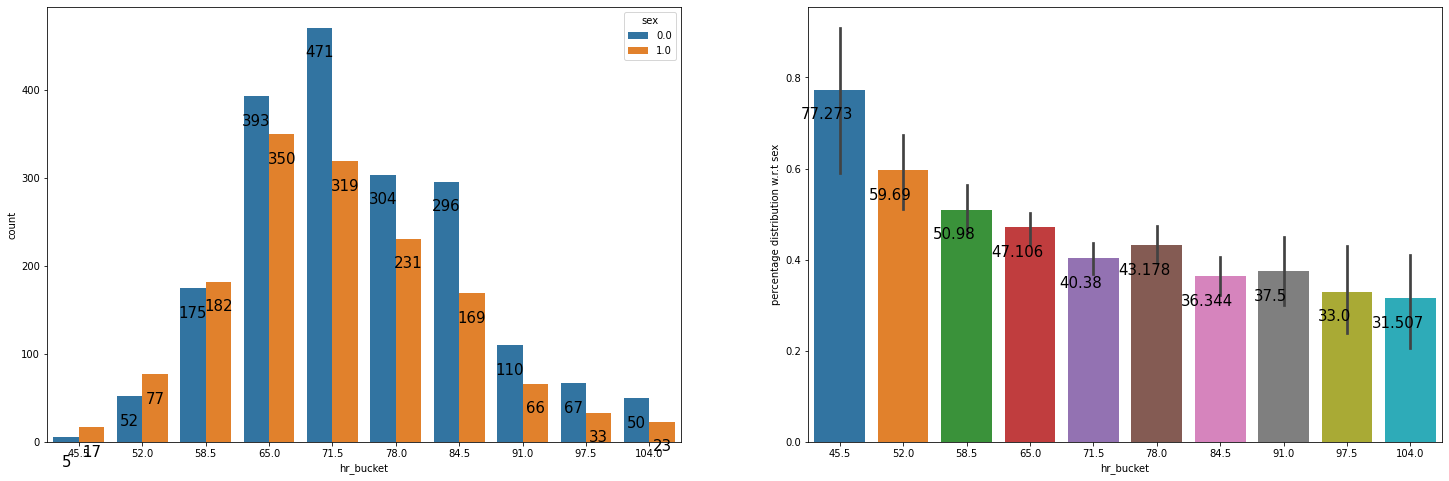

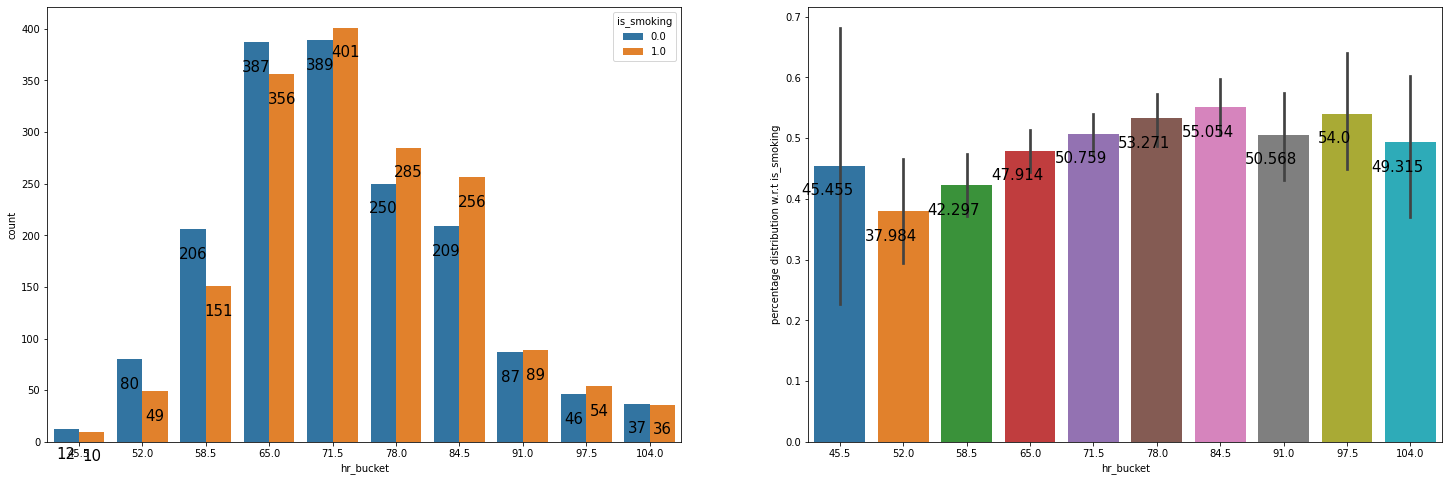

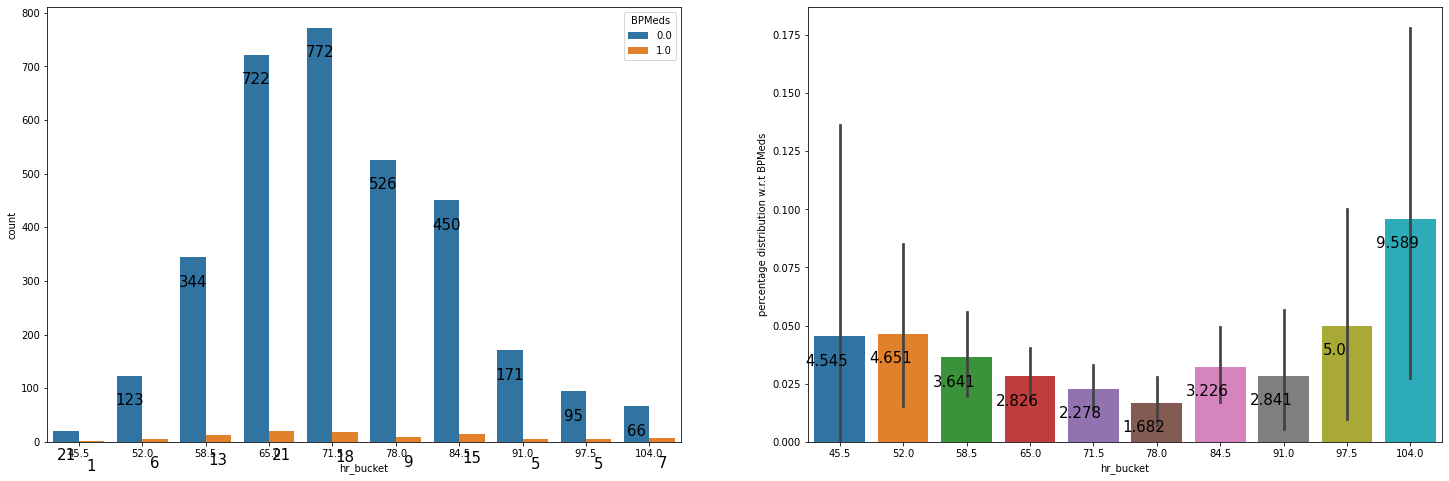

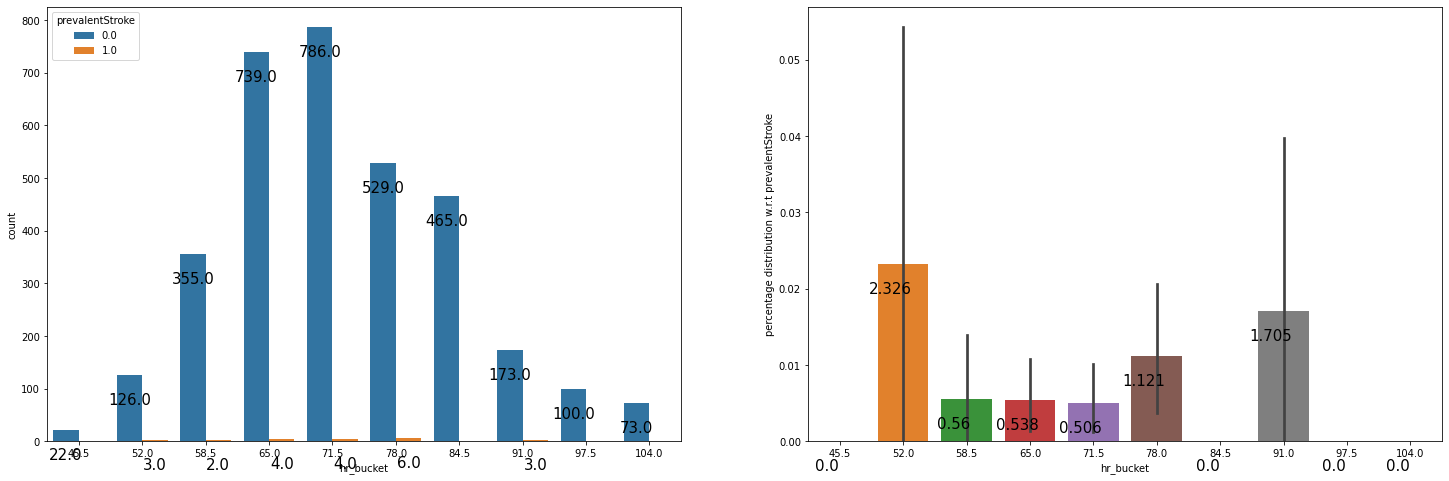

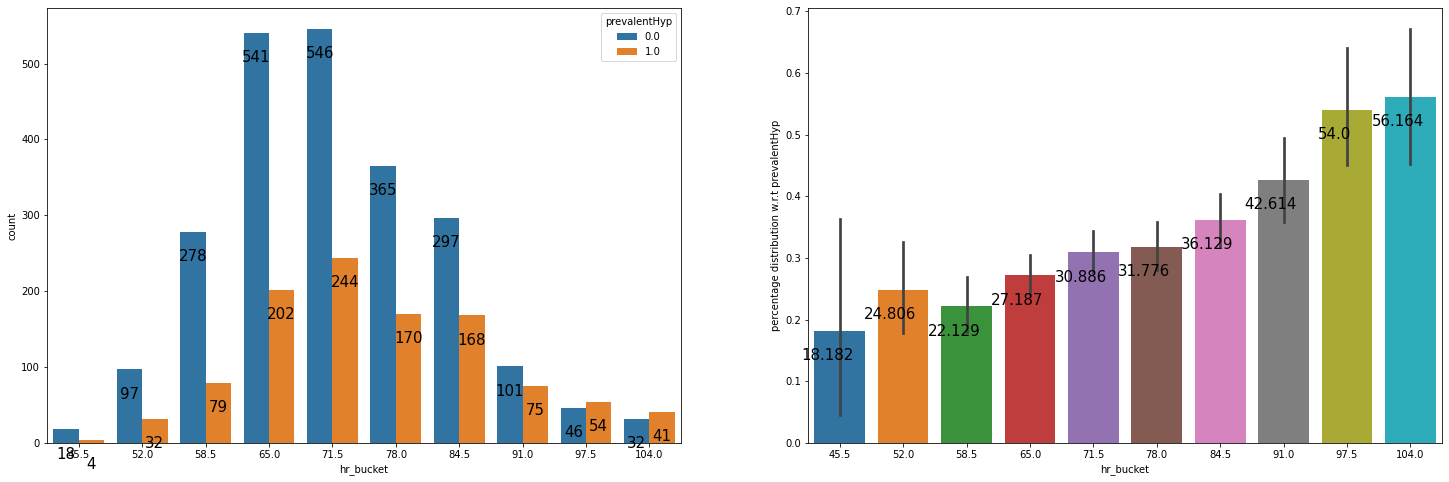

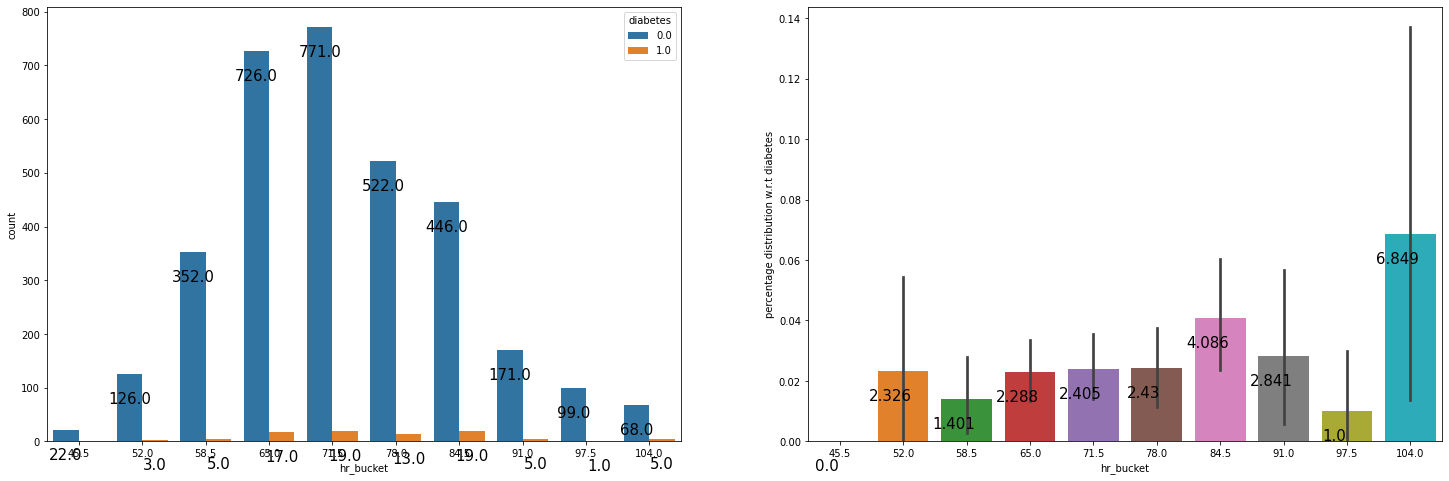

In [29]:
#For better further analysis binning is implemented on age feature
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   Females and people with prevalent hypertension tend to have higher heart rates.



### Analysis with respect to glucose

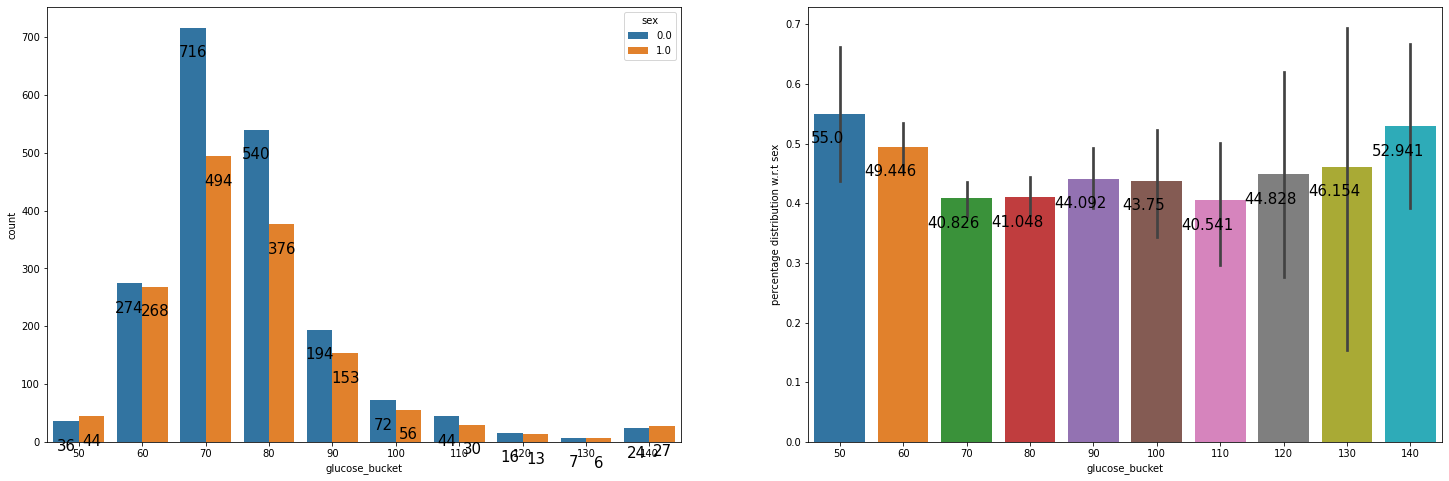

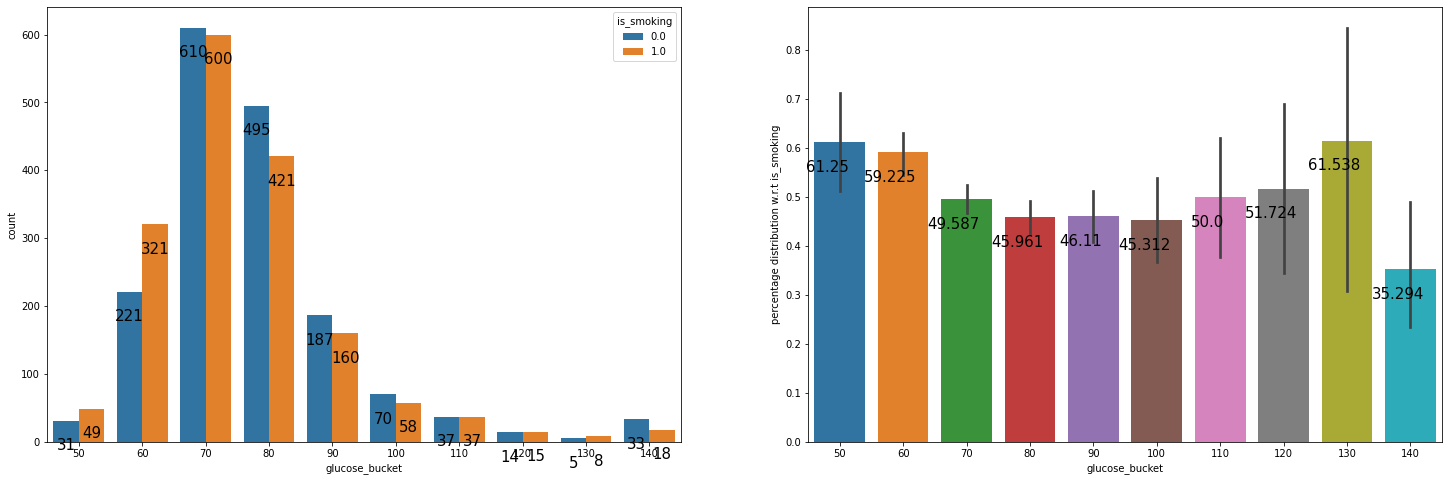

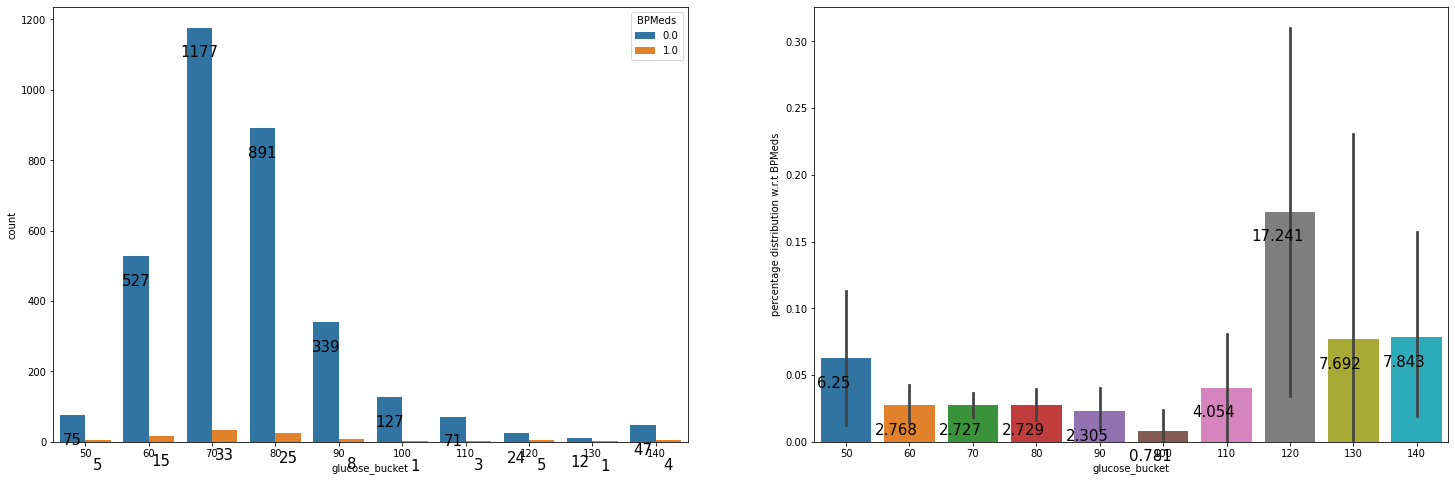

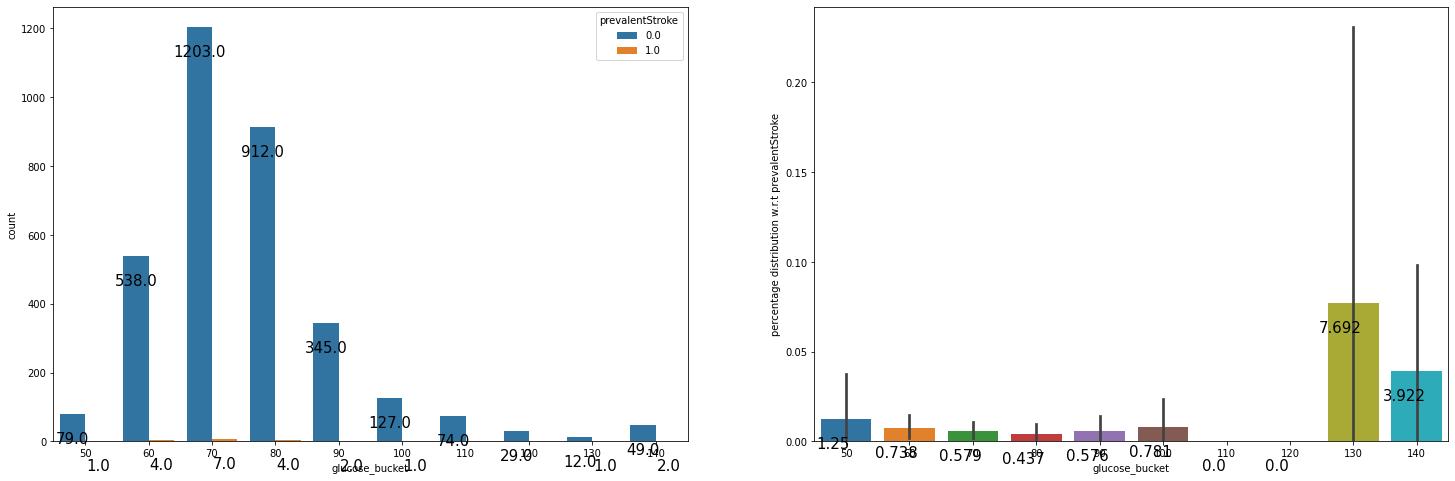

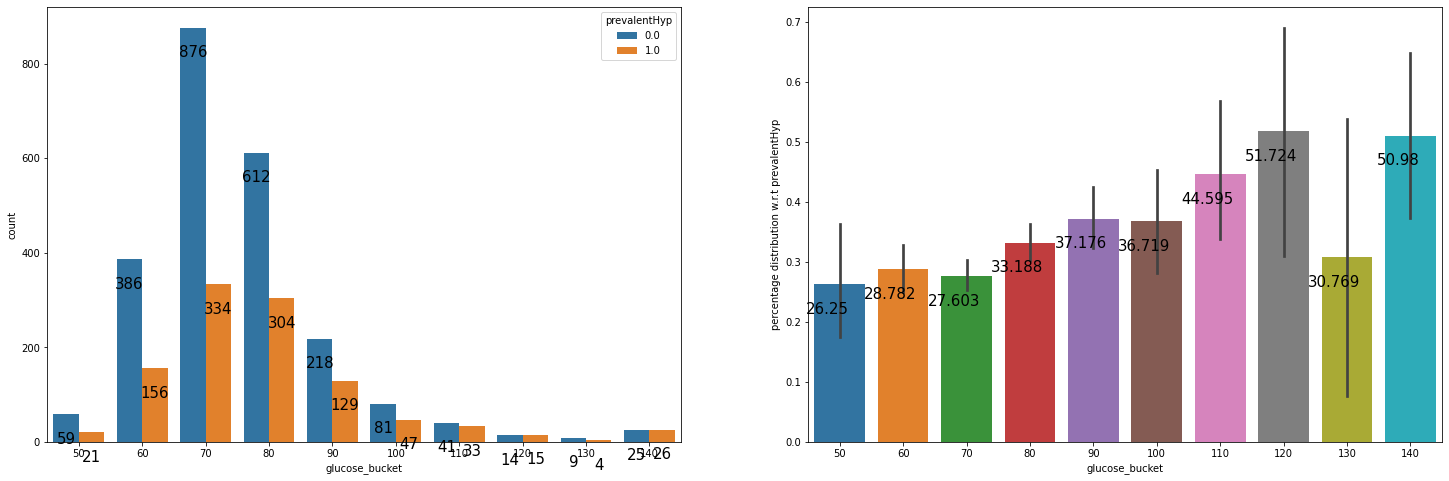

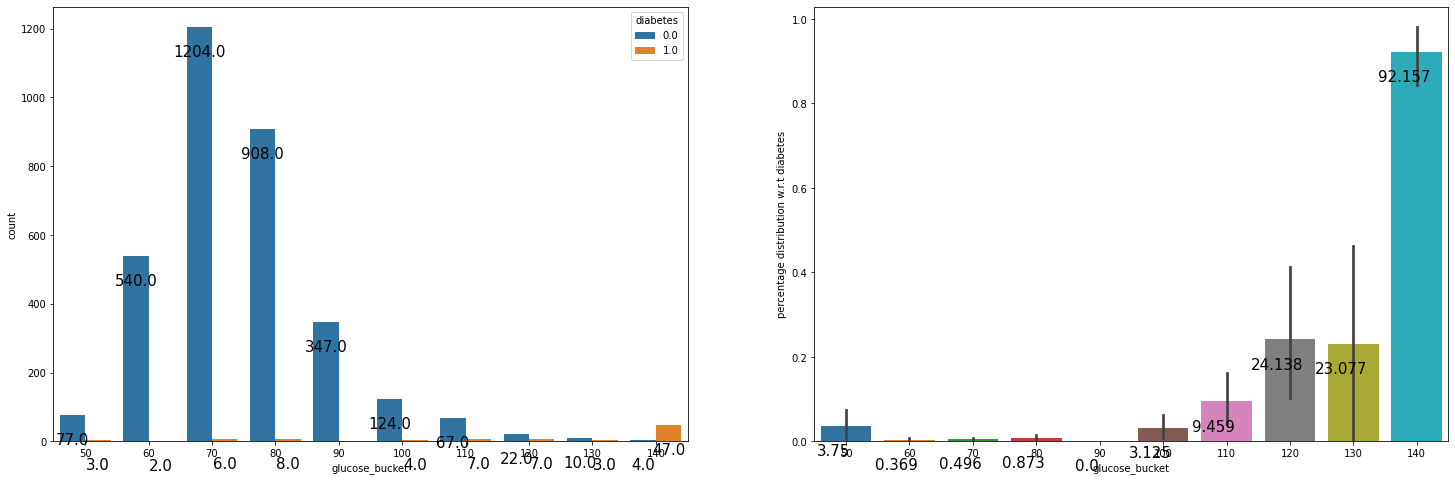

In [30]:
#For better further analysis binning is implemented on age feature
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10)))#Creating new feature for binned feature
#Analysising age feature with respect to other categorical features
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t {v}')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:

*   People with prevalent hypertension tend to have higher glucose levels.



## Analysing numerical features with respect to target feature 

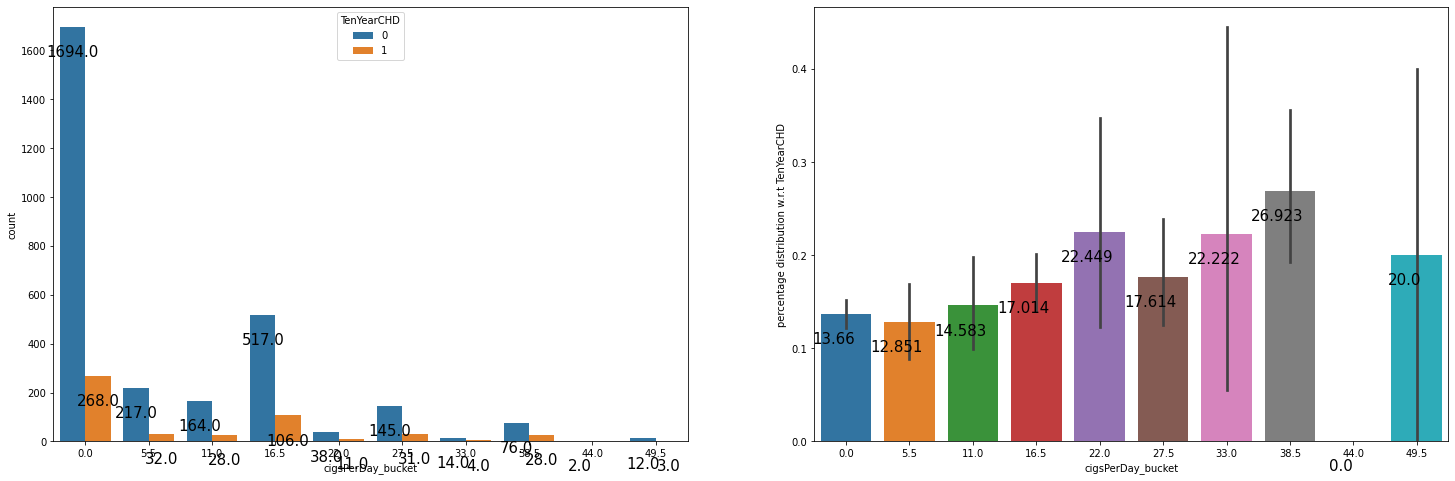

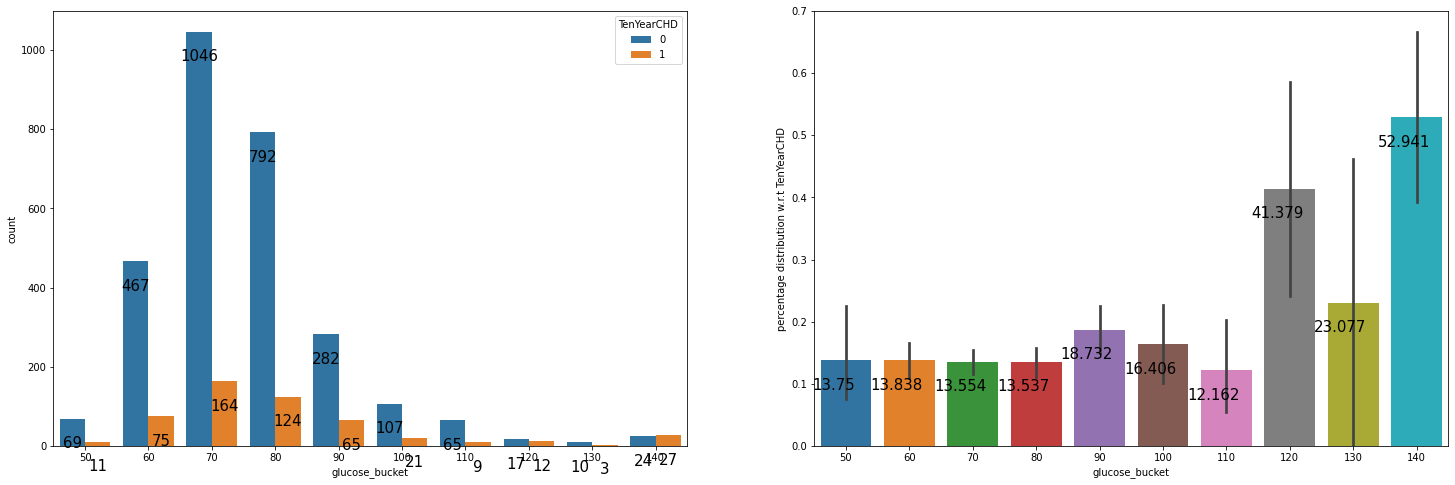

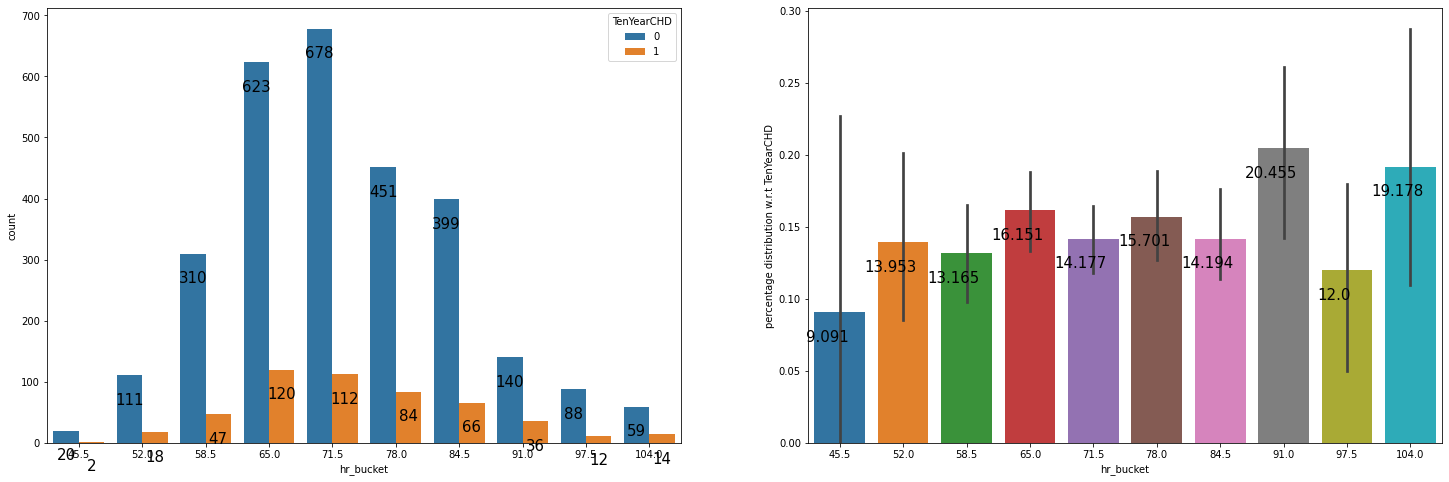

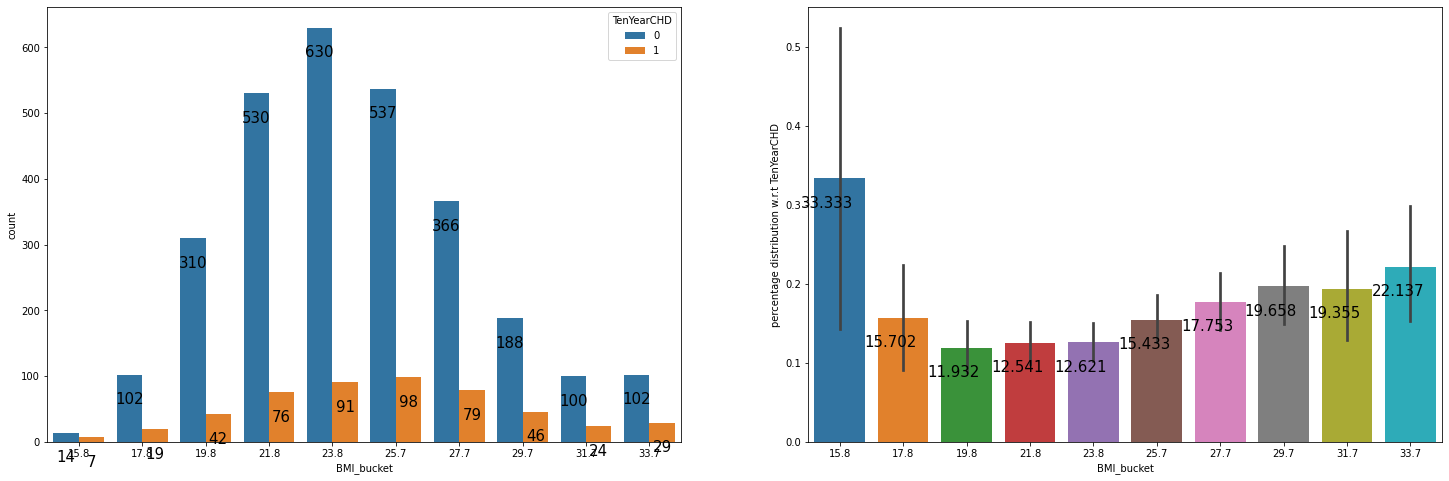

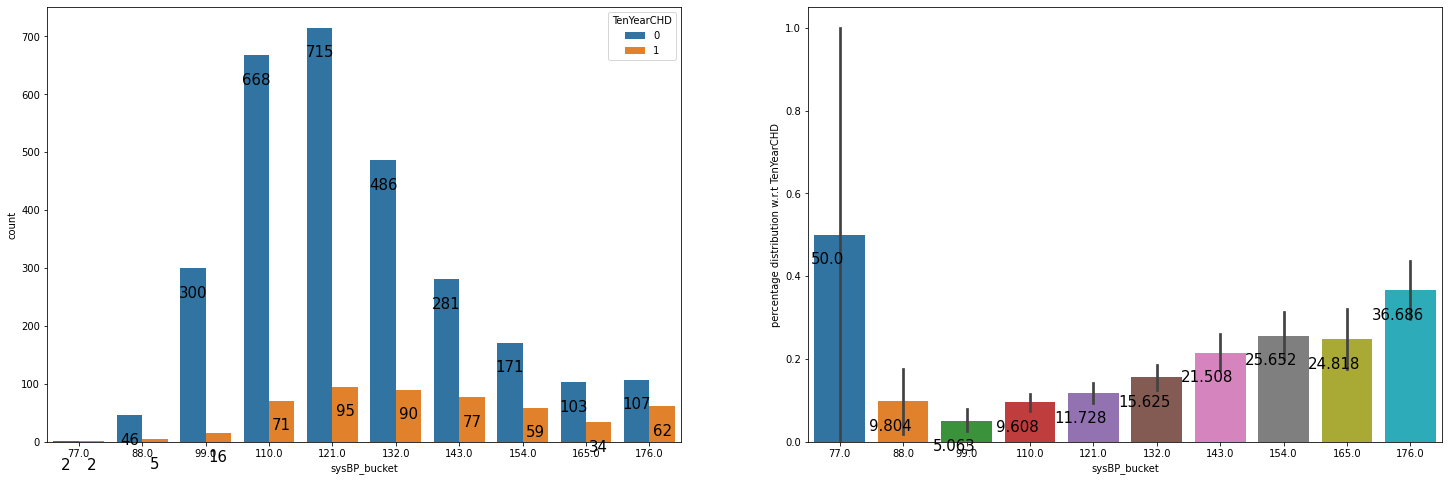

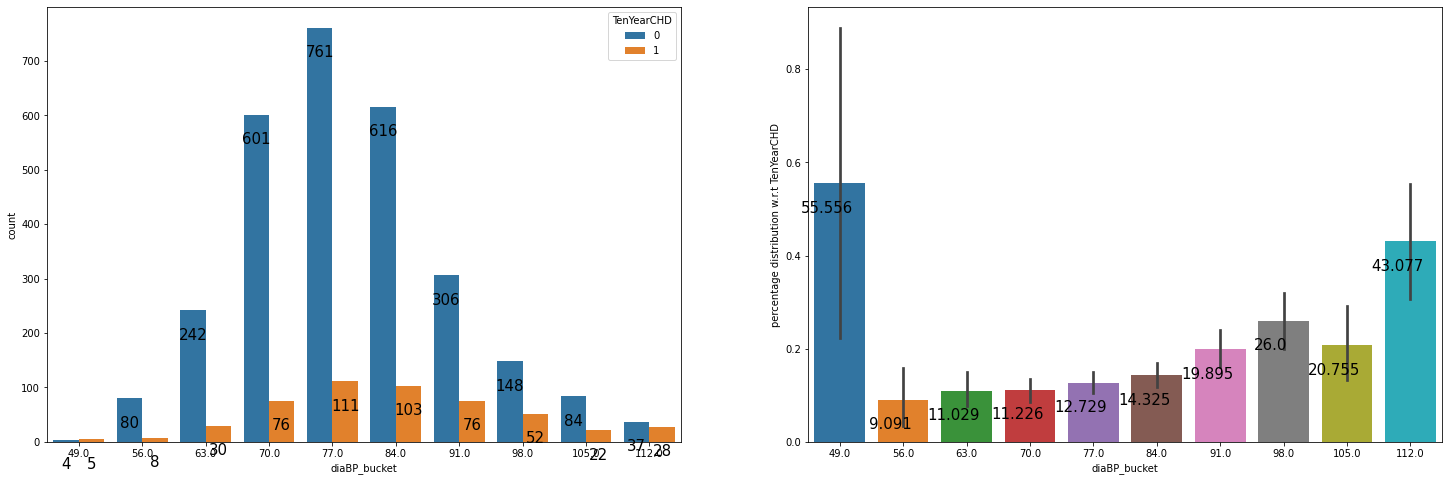

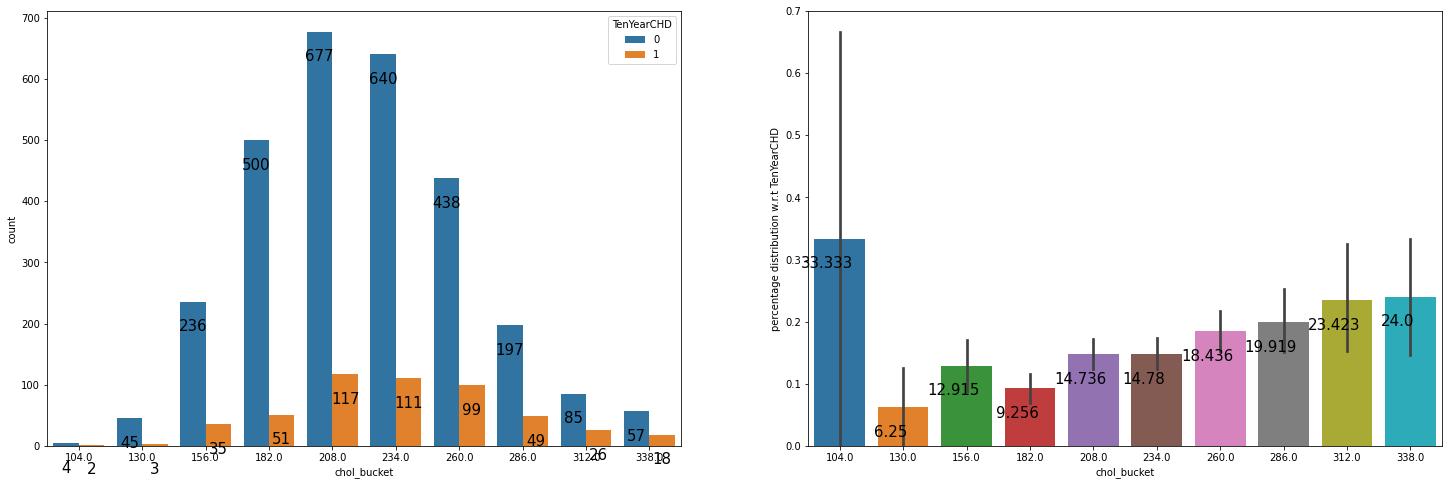

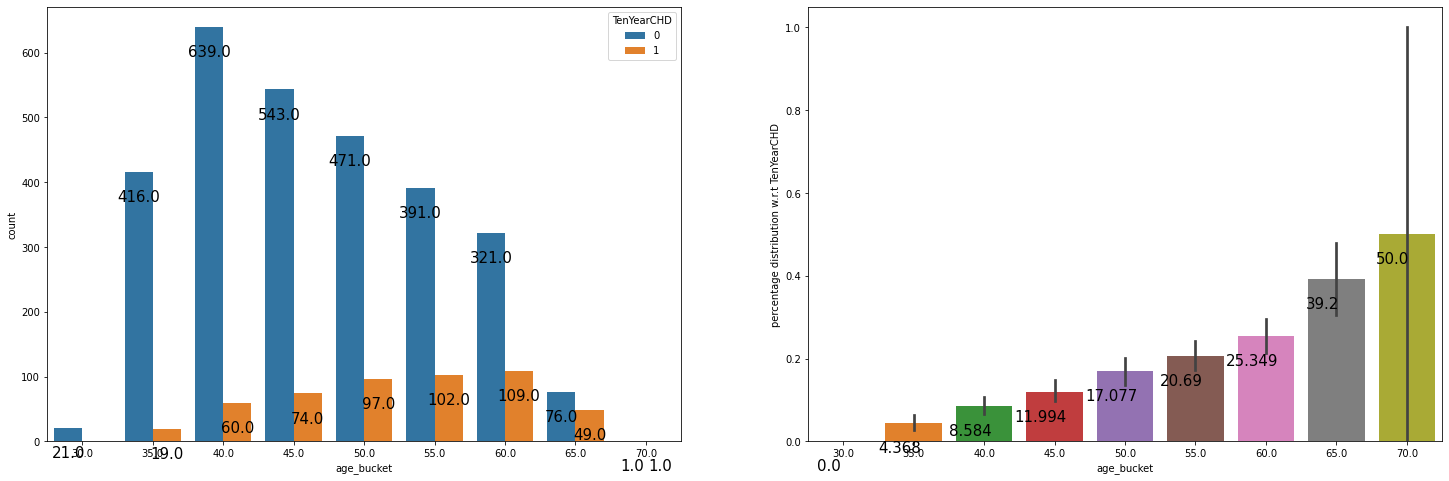

In [31]:
#Analysising age feature with respect to other categorical features
for v in ['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#Countplot analysis
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot(v,'TenYearCHD', data = data_df, ax=axes[1])#Barplot analysis
  vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

REMARKS:


*   An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.



# Feature selection

In [32]:
#droping those binned features which were created while doing EDA
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

In [33]:
data_df=data_df.apply(pd.to_numeric)#for further analysis,converting data values to numeric since some values are encoded as 'object' Dtype
data_df=data_df.drop(columns=['id'])#'id' feature has no relevence in this analysis so droping it from further analysis

## correlation analysis

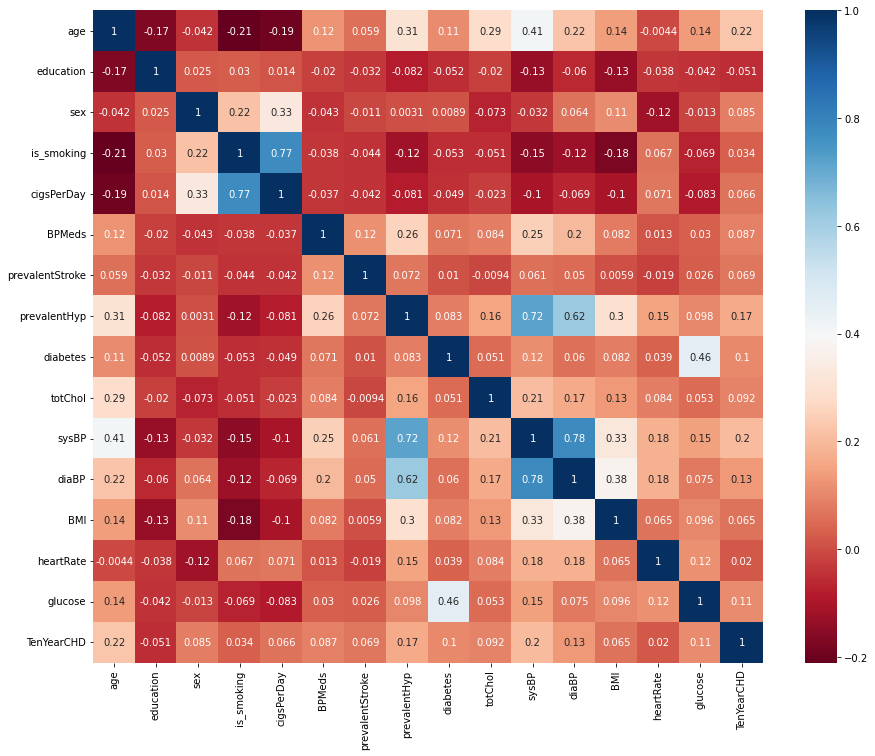

In [34]:
#Checking correlation between each features
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

REMARKS:

'SysBP' and 'DiaBp' is having high correlation of 0.78 followed by 'cigsPerDay' and 'is_smoking' with 0.77, 'SysBP' and 'prevalentHyp' with 0.72  and 'DiaBp' and 'prevalentHyp' with 0.62.

In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.



In [35]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])#Introducing 'PP' feature in the dataset
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])#removing other irrelevant highly correlated features 

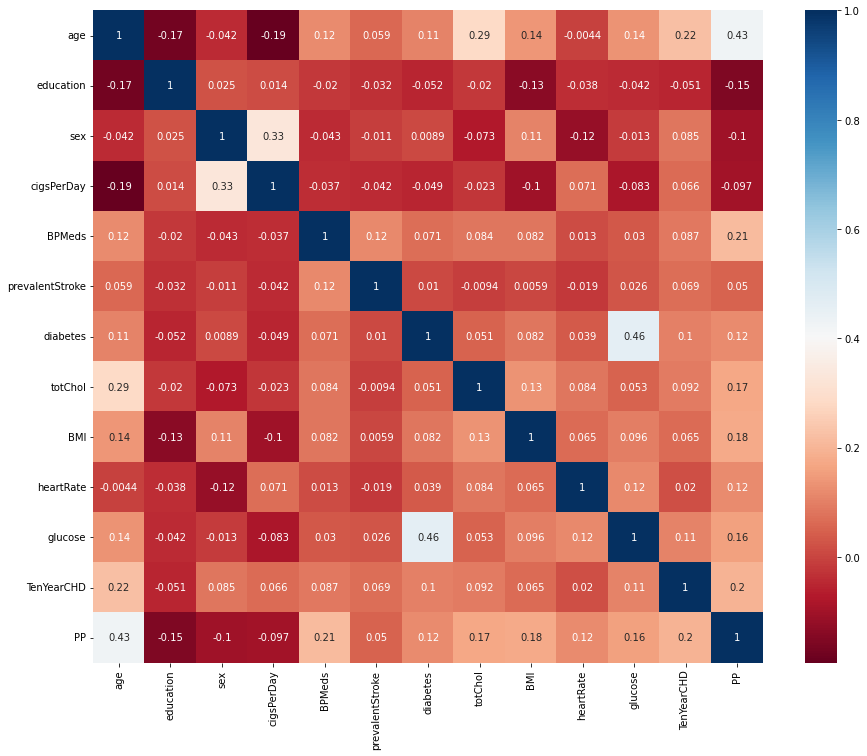

In [36]:
#Rechecking correlation after necessary changes
plt.figure(figsize = (15,12))
sns.heatmap(data_df.corr(), cmap='RdBu', annot=True)#Heatmap based on carrelation values

## Handling class imbalance

In [115]:
#Assigning x and y variables
X = data_df.drop(columns=['TenYearCHD'], axis=1)
y = data_df['TenYearCHD']

In [116]:
#checking value count of target variable
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Class imbalance is observed w.r.t target variable.

inorder to resolve class imbalance Synthetic Minority Over-sampling Technique is used here. 

In [117]:
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [118]:
#checking value count of target variable
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

## Feature selection based on information gain and feature importance

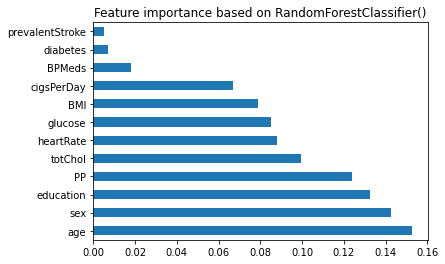

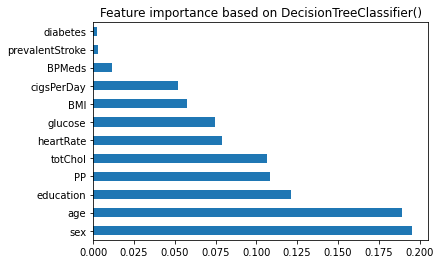

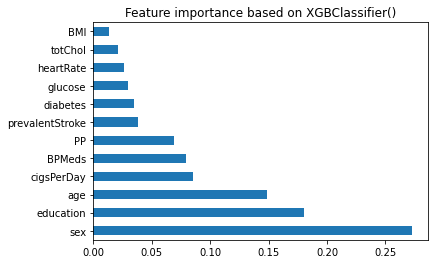

In [119]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

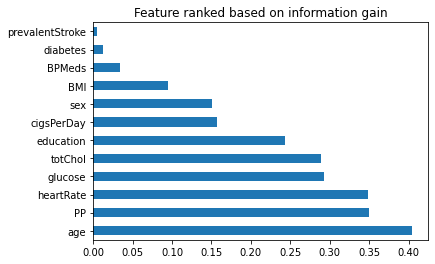

In [120]:
#Analysing feature based on information gain using mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
ranked_features=pd.Series(mutual_data,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')#barplot based based on information gain
plt.title('Feature ranked based on information gain')
plt.show()

REMARKS:

After analysing feature importance and mutual information, features such as 'prevalentStroke','diabetes','BPMeds' and 'BMI' are having less preference.

In [121]:
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])#Droping features from x variables for further model implementation.

# Model Implementation

## Initialising Train and Test data sets

In [122]:
#Initialising train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


In [123]:
#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model implementation preprocessing

In [186]:
# Creating a dataframe for feeding evaluation score based on each model implemented
model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1'])
 
# Creating necessary dictionaries for feeding the confusion matrix and ROC curve for each model implemented
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [125]:
# Creating a function for model implementation as well as feeding the evalution metrics  to the above dataframes dictionaries 
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df):
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:#for gridsearchcv
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      #model prediction
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      #model prediction
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    test_probs = test_probs[:,1]

    # Evaluation scores
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Appendin the dataframe for each iteration
    model_df=model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve#This fuction returns the a dataframe with model evaluation score,
                                                                       #confusion_matrix and ROC curve

The below function is used during loop based cross validation and hyperparameter tuning

In [126]:
# Creating a function for model implementation
def model_build_param_wise(X_train, y_train, X_test, y_test, model_dict,model_df_1):
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)
    #For better understanding of parameter based performance rank feature is introduced with respect to each evaluation matric
    #new feature for ranking the evaluation scores
    model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
    model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

    model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
    model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

    model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
    model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

    model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
    model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

    model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
    model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

    #introducing new feature 'score' which is sum of all test score ranks
    model_df_1['score']=0
    for col in ["Test Accuracy Rank",
            "Test Precision Rank","Test Recall Rank",
            "Test ROC AUC Rank","Test F1 Rank"]:
        model_df_1['score']= model_df_1['score']+ model_df_1[col]
    #Sorting the dataframe based on the 'score'
    model_df_1=model_df_1.sort_values(by='score',ascending=False)
    

  return model_df_1

## 1. Decision Tree Classifier

In [187]:
# Creating a dictionary for model for passing in model built function
models = {'Decision Tree Classifier'        : DecisionTreeClassifier(random_state=42) }

# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [188]:
model_df#Evaluation score

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Decision Tree Classifier             1.0       0.819444              1.0   

   Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0        0.805746           1.0     0.833098            1.0      0.819687   

   Train F1   Test F1  
0       1.0  0.819193

In [129]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                  'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters'])  

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**


In [130]:
#Cross validation and hyperparameter tuning
for x in range(5,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)                                                            


In [131]:
Decision_Tree_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Decision_Tree_param_wise

Model  Train Accuracy  Test Accuracy  \
0     Decision Tree Classifier tunned        0.997916       0.842361   
1     Decision Tree Classifier tunned        0.999537       0.841667   
2     Decision Tree Classifier tunned        1.000000       0.841667   
3     Decision Tree Classifier tunned        0.945113       0.835417   
4     Decision Tree Classifier tunned        0.945113       0.835417   
...                               ...             ...            ...   
7974  Decision Tree Classifier tunned        0.691524       0.692361   
7975  Decision Tree Classifier tunned        0.691292       0.692361   
7976  Decision Tree Classifier tunned        0.691524       0.692361   
7977  Decision Tree Classifier tunned        0.691524       0.692361   
7978  Decision Tree Classifier tunned        0.691524       0.692361   

      Train Precision  Test Precision  Train Recall  Test Recall  \
0            0.998158        0.835196      0.997698     0.845827   
1            1.000000        0.834031      0.999079     0.845827   
2            1.000000        0.833102      1.000000     0.847242   
3            0.960057        0.838617      0.929558     0.823197   
4            0.960057        0.838617      0.929558     0.823197   
...               ...             ...           ...          ...   
7974         0.716272        0.698795      0.640424     0.656294   
7975         0.715903        0.698795      0.640424     0.656294   
7976         0.716272        0.698795      0.640424     0.656294   
7977         0.716272        0.698795      0.640424     0.656294   
7978         0.716272        0.698795      0.640424     0.656294   

      Train ROC AUC  Test ROC AUC  Train F1  ...  Test Accuracy Rank  \
0          0.997917      0.842423  0.997928  ...              7979.0   
1          0.999540      0.841740  0.999539  ...              7976.5   
2          1.000000      0.841766  1.000000  ...              7976.5   
3          0.945208      0.835200  0.944561  ...              7969.0   
4          0.945208      0.835200  0.944561  ...              7969.0   
...             ...           ...       ...  ...                 ...   
7974       0.691833      0.691721  0.676228  ...                47.0   
7975       0.691600      0.691721  0.676063  ...                47.0   
7976       0.691833      0.691721  0.676228  ...                47.0   
7977       0.691833      0.691721  0.676228  ...                47.0   
7978       0.691833      0.691721  0.676228  ...                47.0   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
0                  7902.0               7660.0             7875.0   
1                  7958.0               7616.0             7906.5   
2                  7958.0               7566.0             7955.0   
3                  7350.5               7799.5             7312.0   
4                  7350.5               7799.5             7312.0   
...                   ...                  ...                ...   
7974                236.5                206.0               61.0   
7975                232.0                206.0               61.0   
7976                236.5                206.0               61.0   
7977                236.5                206.0               61.0   
7978                236.5                206.0               61.0   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
0               7937.0              7897.0             7980.0         7891.0   
1               7937.0              7937.0             7978.0         7937.0   
2               7945.5              7966.0             7979.0         7966.0   
3               7722.0              7317.5             7968.5         7315.5   
4               7722.0              7317.5             7968.5         7315.5   
...                ...                 ...                ...            ...   
7974             110.5                 3.5               46.0            3.5   
7975            

In [132]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
Decision_Tree_param_wise[Decision_Tree_param_wise['Test Recall']>0.850071][['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
6440        0.696850       0.683333         0.643403        0.627670   
530         0.994673       0.828472         0.992213        0.799479   
529         0.994673       0.828472         0.992213        0.799479   
457         0.999768       0.828472         0.999540        0.801837   
497         1.000000       0.827778         1.000000        0.800786   
495         1.000000       0.827778         1.000000        0.800786   
494         1.000000       0.827778         1.000000        0.800786   
458         0.999305       0.828472         0.998621        0.801837   
496         1.000000       0.827778         1.000000        0.800786   
456         0.999768       0.828472         0.999540        0.801837   
455         0.999305       0.828472         0.998621        0.801837   
5855        0.733441       0.736806         0.685299        0.685102   
5856        0.733210       0.736806         0.685051        0.685102   
5857        0.733210       0.736806         0.685051        0.685102   
5858        0.733441       0.736806         0.685299        0.685102   
277         0.988189       0.829167         0.984468        0.809396   
174         0.984715       0.831944         0.985253        0.813765   
276         0.988189       0.829167         0.984468        0.809396   
730         0.998379       0.819444         0.997701        0.794466   
731         0.998379       0.819444         0.997701        0.794466   
1135        0.997916       0.814583         0.996329        0.787206   
1136        0.997916       0.814583         0.996329        0.787206   
175         0.984715       0.831944         0.985253        0.813765   
182         0.981936       0.831250         0.981158        0.813514   
185         0.981936       0.831250         0.981158        0.813514   

      Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
6440      0.891344     0.872702       0.695672      0.686692  0.730178   
530       0.997238     0.868458       0.994658      0.829181  0.832542   
529       0.997238     0.868458       0.994658      0.829181  0.832542   
457       1.000000     0.864215       0.999767      0.829106  0.831858   
497       1.000000     0.864215       1.000000      0.828424  0.831293   
495       1.000000     0.864215       1.000000      0.828424  0.831293   
494       1.000000     0.864215       1.000000      0.828424  0.831293   
458       1.000000     0.864215       0.999301      0.829106  0.831858   
496       1.000000     0.864215       1.000000      0.828424  0.831293   
456       1.000000     0.864215       0.999767      0.829106  0.831858   
455       1.000000     0.864215       0.999301      0.829106  0.831858   
5855      0.869245     0.858557       0.732619      0.738965  0.762084   
5856      0.869245     0.858557       0.732386      0.738965  0.762084   
5857      0.869245     0.858557       0.732386      0.738965  0.762084   
5858      0.869245     0.858557       0.732619      0.738965  0.762084   
277       0.992173     0.852900       0.988165      0.829588  0.830579   
174       0.984346     0.852900       0.984717      0.832316  0.832873   
276       0.992173     0.852900       0.988165      0.829588  0.830579   
730       0.999079     0.852900       0.998375      0.820038  0.822647   
731       0.999079     0.852900       0.998375      0.820038  0.822647   
1135      0.999540     0.852900       0.997906      0.815263  0.818737   
1136      0.999540     0.852900       0.997906      0.815263  0.818737   
175       0.984346     0.852900       0.984717      0.832316  0.832873   
182       0.982965     0.851485       0.981930      0.831609  0.832066   
185       0.982965     0.851485       0.981930      0.831609  0.832066   

      Train F1                                         Parameters  
6440  0.747346  {'criterion': 'gini', 'max_depth': 7, 'max_fea...  
530   0.994719  {'criterion': 'entropy', 'max_depth': 19, 'max...  
529 

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [189]:
#the best parameters
Decision_Tree_param_wise['Parameters'][457]

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 0.9,
 'min_samples_leaf': 1}

In [190]:
#Appending the the same to the main dataframe for future comparison
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           param_grid={'max_depth':  [21],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': [0.9],
                                                                      'criterion': ['entropy']},cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)                                                                     

DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=0.9,
                       random_state=42)


In [191]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.00000        0.805746           1.0     0.833098       1.000000   
1          0.99954        0.801837           1.0     0.864215       0.999767   

   Test ROC AUC  Train F1   Test F1  
0      0.819687   1.00000  0.819193  
1      0.829106   0.99977  0.831858

## 2. Logistic Regression classification

In [192]:
# Creating a dictionary for model for passing in model built function
models = {'Logistic Regression'        : LogisticRegression(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [193]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [138]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])  

In [139]:
#Hyperparameter tuning for liblinear solver and updating model_df_1 for every parameter combination
for x in ['l1', 'l2']:
  for y in np.logspace(-5, 4, 30):
    for z in ['liblinear']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)  

#Hyperparameter tuning for 'lbfgs' & 'newton-cg' solver and updating model_df_1 for every parameter combination
for x in ['l2','none']:
  for y in np.logspace(-5, 4, 30):
    for z in ['lbfgs','newton-cg']:
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)   
          
#Hyperparameter tuning for 'elasticnet' solver and updating model_df_1 for every parameter combination
for x in ['elasticnet']:
  for y in np.logspace(-5, 4, 30):
    for z in ['saga']:
      for a in np.logspace(-5, 0, 30):
          models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : [x],
                                                                   'C'       : [y],
                                                                   'solver'  : [z],
                                                                   'l1_ratio' :[a]}
                                                      )}
          model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)    

In [140]:
Logistic_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Logistic_param_wise

Model  Train Accuracy  Test Accuracy  \
0     Logistic Regression tunned        0.663270       0.686111   
2     Logistic Regression tunned        0.662344       0.685417   
1     Logistic Regression tunned        0.661881       0.685417   
3     Logistic Regression tunned        0.663038       0.684722   
4     Logistic Regression tunned        0.662112       0.684722   
...                          ...             ...            ...   
1047  Logistic Regression tunned        0.496989       0.509028   
1048  Logistic Regression tunned        0.496989       0.509028   
1049  Logistic Regression tunned        0.496989       0.509028   
1050  Logistic Regression tunned        0.496989       0.509028   
1037  Logistic Regression tunned        0.496989       0.509028   

      Train Precision  Test Precision  Train Recall  Test Recall  \
0            0.663777        0.673469      0.669890     0.700141   
2            0.662568        0.672554      0.669890     0.700141   
1            0.661818        0.672554      0.670350     0.700141   
3            0.663624        0.672109      0.669429     0.698727   
4            0.661972        0.672109      0.670810     0.698727   
...               ...             ...           ...          ...   
1047         0.000000        0.000000      0.000000     0.000000   
1048         0.000000        0.000000      0.000000     0.000000   
1049         0.000000        0.000000      0.000000     0.000000   
1050         0.000000        0.000000      0.000000     0.000000   
1037         0.000000        0.000000      0.000000     0.000000   

      Train ROC AUC  Test ROC AUC   Test F1  ...  Test Accuracy Rank  \
0          0.663230      0.686360  0.686546  ...              1080.0   
2          0.662298      0.685678  0.686071  ...              1078.5   
1          0.661829      0.685678  0.686071  ...              1078.5   
3          0.663000      0.684971  0.685160  ...              1075.0   
4          0.662059      0.684971  0.685160  ...              1075.0   
...             ...           ...       ...  ...                 ...   
1047       0.500000      0.500000  0.000000  ...                38.5   
1048       0.500000      0.500000  0.000000  ...                38.5   
1049       0.500000      0.500000  0.000000  ...                38.5   
1050       0.500000      0.500000  0.000000  ...                38.5   
1037       0.500000      0.500000  0.000000  ...                38.5   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
0                  1063.0               1079.0              802.5   
2                  1037.0               1075.5              802.5   
1                   995.5               1075.5              828.0   
3                  1060.5               1073.5              754.0   
4                  1021.5               1073.5              847.0   
...                   ...                  ...                ...   
1047                 27.5                 27.5               27.5   
1048                 27.5                 27.5               27.5   
1049                 27.5                 27.5               27.5   
1050                 27.5                 27.5               27.5   
1037                 27.5                 27.5               27.5   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
0                951.5              1050.0             1080.0          895.0   
2                951.5               997.0             1078.5          864.0   
1                951.5               964.5             1078.5          845.5   
3                945.0              1020.5             1076.5          885.5   
4                945.0               978.5             1076.5          866.5   
...                ...                 ...                ...            ...   
1047              27.5                32.5               32.5           27.5   
1048              27.5                32.5               32.5          

In [194]:
#Doing some filtering on the above dataframe to understand some of the best performing parameter combination
df=Logistic_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].sort_values(by='Train Precision',ascending=False)
df[(df['Test Recall']>0.691655) & (df['Test Accuracy']>0.676389)].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
216        0.662575       0.677083         0.658116        0.656736   
214        0.662575       0.677778         0.658116        0.659658   
215        0.662575       0.677778         0.661545        0.660927   
217        0.663502       0.677778         0.662156        0.662216   
97         0.663038       0.679167         0.663624        0.663989   
..              ...            ...              ...             ...   
62         0.661881       0.681944         0.661818        0.670315   
65         0.661881       0.681944         0.661818        0.670315   
63         0.661881       0.681944         0.661818        0.670315   
64         0.661881       0.681944         0.661818        0.670315   
76         0.661881       0.681944         0.661818        0.670315   

     Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
216      0.685083     0.717115       0.662439      0.677793  0.685598   
214      0.685083     0.710042       0.662439      0.678350  0.683924   
215      0.674033     0.705799       0.662506      0.678275  0.682627   
217      0.675875     0.701556       0.663427      0.678199  0.681319   
97       0.669429     0.701556       0.663000      0.679564  0.682256   
..            ...          ...            ...           ...       ...   
62       0.670350     0.693069       0.661829      0.682142  0.681502   
65       0.670350     0.693069       0.661829      0.682142  0.681502   
63       0.670350     0.693069       0.661829      0.682142  0.681502   
64       0.670350     0.693069       0.661829      0.682142  0.681502   
76       0.670350     0.693069       0.661829      0.682142  0.681502   

     Train F1                                         Parameters  
216  0.671329  {'C': 0.00017433288221999874, 'l1_ratio': 0.01...  
214  0.671329  {'C': 0.00017433288221999874, 'l1_ratio': 0.00...  
215  0.667731  {'C': 0.0003562247890262444, 'l1_ratio': 0.041...  
217  0.668945  {'C': 0.0003562247890262444, 'l1_ratio': 0.028...  
97   0.666514  {'C': 0.0007278953843983154, 'l1_ratio': 0.092...  
..        ...                                                ...  
62   0.666057  {'C': 0.006210169418915616, 'l1_ratio': 4.8939...  
65   0.666057  {'C': 0.006210169418915616, 'l1_ratio': 0.0005...  
63   0.666057  {'C': 0.006210169418915616, 'l1_ratio': 0.0003...  
64   0.666057  {'C': 0.006210169418915616, 'l1_ratio': 1.4873...  
76   0.666057  {'C': 0.006210169418915616, 'l1_ratio': 0.0001...  

[125 rows x 11 columns]

After analysing the each parameter combination the below mentioned parameter combination is selected.

In [195]:
#the best parameters
Logistic_param_wise['Parameters'][216]

{'C': 0.00017433288221999874,
 'l1_ratio': 0.018873918221350976,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [196]:
#Appending the the same to the main dataframe for future comparison
models = {'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=4,
                                                      param_grid ={'penalty' : ['elasticnet'],
                                                                   'C'       : [0.00017433288221999874],
                                                                   'solver'  : ['saga'],
                                                                   'l1_ratio' :[0.018873918221350976]}
                                                      )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

LogisticRegression(C=0.00017433288221999874, l1_ratio=0.018873918221350976,
                   penalty='elasticnet', random_state=42, solver='saga')


In [197]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598

## 3. KN Classifier

In [205]:
# Creating a dictionary for model for passing in model built function
models = {'KNN' : KNeighborsClassifier()}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [206]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [147]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [148]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in range(1,10):
  for y in ['uniform','distance']:
    for z in ['minkowski','euclidean','manhattan']:
        models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [x],
                                                   'weights' : [y],
                                                   'metric' : [z]},
                                      cv=5)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [149]:
KNN_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
KNN_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0   KNN tunned        1.000000       0.902778         1.000000   
2   KNN tunned        1.000000       0.902778         1.000000   
1   KNN tunned        1.000000       0.902778         1.000000   
3   KNN tunned        1.000000       0.890972         1.000000   
4   KNN tunned        1.000000       0.890972         1.000000   
5   KNN tunned        1.000000       0.890972         1.000000   
6   KNN tunned        1.000000       0.890972         1.000000   
7   KNN tunned        1.000000       0.890972         1.000000   
8   KNN tunned        1.000000       0.890972         1.000000   
9   KNN tunned        0.984484       0.898611         1.000000   
10  KNN tunned        1.000000       0.874306         1.000000   
12  KNN tunned        0.984484       0.881250         1.000000   
11  KNN tunned        0.984484       0.881250         1.000000   
13  KNN tunned        1.000000       0.874306         1.000000   
14  KNN tunned        1.000000       0.867361         1.000000   
15  KNN tunned        1.000000       0.854861         1.000000   
16  KNN tunned        1.000000       0.854861         1.000000   
17  KNN tunned        1.000000       0.866667         1.000000   
19  KNN tunned        1.000000       0.856250         1.000000   
18  KNN tunned        0.932608       0.862500         0.891386   
20  KNN tunned        0.935850       0.865278         0.919805   
21  KNN tunned        1.000000       0.851389         1.000000   
53  KNN tunned        1.000000       0.850694         1.000000   
23  KNN tunned        1.000000       0.839583         1.000000   
22  KNN tunned        1.000000       0.839583         1.000000   
24  KNN tunned        1.000000       0.838889         1.000000   
25  KNN tunned        1.000000       0.838889         1.000000   
26  KNN tunned        0.900648       0.843056         0.850987   
27  KNN tunned        0.904585       0.850694         0.885289   
28  KNN tunned        0.881195       0.847222         0.860809   
29  KNN tunned        0.877026       0.836806         0.830980   
30  KNN tunned        0.915007       0.833333         0.863472   
31  KNN tunned        0.915007       0.833333         0.863472   
32  KNN tunned        1.000000       0.826389         1.000000   
33  KNN tunned        1.000000       0.826389         1.000000   
34  KNN tunned        0.920333       0.834722         0.893626   
35  KNN tunned        0.920333       0.834722         0.893626   
36  KNN tunned        1.000000       0.823611         1.000000   
37  KNN tunned        1.000000       0.823611         1.000000   
38  KNN tunned        1.000000       0.821528         1.000000   
39  KNN tunned        1.000000       0.821528         1.000000   
40  KNN tunned        0.866373       0.829167         0.825112   
42  KNN tunned        1.000000       0.816667         1.000000   
41  KNN tunned        1.000000       0.816667         1.000000   
43  KNN tunned        0.881890       0.822222         0.849747   
44  KNN tunned        0.881890       0.822222         0.849747   
45  KNN tunned        0.880037       0.815278         0.821540   
46  KNN tunned        0.880037       0.815278         0.821540   
47  KNN tunned        0.858268       0.802083         0.801624   
48  KNN tunned        0.858268       0.802083         0.801624   
49  KNN tunned        0.860584       0.805556         0.825726   
50  KNN tunned        0.860584       0.805556         0.825726   
51  KNN tunned        0.838583       0.790972         0.782892   
52  KNN tunned        0.838583       0.790972         0.782892   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.849568      1.000000     0.974540       1.000000      0.904051   
2         0.849568      1.000000     0.974540       1.000000      0.904051   
1         0.849568      1.000000     0.974540       1.000000      0.904051   
3         0.828947      1.000000     0.980198       1.000000      

In [150]:
#Dataframe of evalustion scores for each combination of parameters
KNN_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
3         1.000000       0.890972         1.000000        0.828947   
4         1.000000       0.890972         1.000000        0.828947   
5         1.000000       0.890972         1.000000        0.828947   
6         1.000000       0.890972         1.000000        0.828947   
7         1.000000       0.890972         1.000000        0.828947   
8         1.000000       0.890972         1.000000        0.828947   
0         1.000000       0.902778         1.000000        0.849568   
15        1.000000       0.854861         1.000000        0.782955   
1         1.000000       0.902778         1.000000        0.849568   
2         1.000000       0.902778         1.000000        0.849568   
16        1.000000       0.854861         1.000000        0.782955   
25        1.000000       0.838889         1.000000        0.763596   
24        1.000000       0.838889         1.000000        0.763596   
23        1.000000       0.839583         1.000000        0.765625   
22        1.000000       0.839583         1.000000        0.765625   
10        1.000000       0.874306         1.000000        0.811611   
39        1.000000       0.821528         1.000000        0.746171   
38        1.000000       0.821528         1.000000        0.746171   
13        1.000000       0.874306         1.000000        0.814593   
14        1.000000       0.867361         1.000000        0.804965   
37        1.000000       0.823611         1.000000        0.749175   
36        1.000000       0.823611         1.000000        0.749175   
33        1.000000       0.826389         1.000000        0.752486   
32        1.000000       0.826389         1.000000        0.752486   
19        1.000000       0.856250         1.000000        0.790698   
41        1.000000       0.816667         1.000000        0.742077   
42        1.000000       0.816667         1.000000        0.742077   
31        0.915007       0.833333         0.863472        0.762655   
30        0.915007       0.833333         0.863472        0.762655   
21        1.000000       0.851389         1.000000        0.786295   
53        1.000000       0.850694         1.000000        0.785383   
17        1.000000       0.866667         1.000000        0.806913   
18        0.932608       0.862500         0.891386        0.804062   
46        0.880037       0.815278         0.821540        0.745273   
45        0.880037       0.815278         0.821540        0.745273   
26        0.900648       0.843056         0.850987        0.785969   
47        0.858268       0.802083         0.801624        0.736547   
48        0.858268       0.802083         0.801624        0.736547   
29        0.877026       0.836806         0.830980        0.782974   
12        0.984484       0.881250         1.000000        0.852632   
11        0.984484       0.881250         1.000000        0.852632   
40        0.866373       0.829167         0.825112        0.777377   
9         0.984484       0.898611         1.000000        0.887967   
20        0.935850       0.865278         0.919805        0.835294   
35        0.920333       0.834722         0.893626        0.790582   
34        0.920333       0.834722         0.893626        0.790582   
43        0.881890       0.822222         0.849747        0.778739   
44        0.881890       0.822222         0.849747        0.778739   
27        0.904585       0.850694         0.885289        0.822835   
28        0.881195       0.847222         0.860809        0.820817   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  \
3       1.000000     0.980198       1.000000      0.892555  0.898250   
4       1.000000     0.980198       1.000000      0.892555  0.898250   
5       1.000000     0.980198       1.000000      0.892555  0.898250   
6       1.000000     0.980198       1.000000      0.892555  0.898250   
7       1.000000     0.980198       1.000000      0.892555  0.898250   
8

In [198]:
#the best parameters
KNN_param_wise['Parameters'][8]

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}

In [207]:
#Appending the the same to the main dataframe for future comparison
models = {'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : [2],
                                                   'weights' : ['distance'],
                                                   'metric' : ['minkowski']},
                                      cv=5)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KNeighborsClassifier(n_neighbors=2, weights='distance')


In [208]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   
5                       KNN tunned        1.000000       0.890972   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   
5         1.000000        0.828947      1.000000     0.980198       1.000000   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371  
5      0.892555  1.000000  0.898250

## 4. Support vector classifier

In [209]:
# Creating a dictionary for model for passing in model built function
models = {'SVC'        : SVC(probability=True,random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [210]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   
5                       KNN tunned        1.000000       0.890972   
6                              SVC        0.790875       0.770139   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   
5         1.000000        0.828947      1.000000     0.980198       1.000000   
6         0.803443        0.770115      0.773481     0.758133       0.790981   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371  
5      0.892555  1.000000  0.898250  
6      0.769926  0.788177  0.764077

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above(model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [156]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [157]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [0.1, 1, 10, 100, 1000]:
        models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [x]}
                                            )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [158]:
SVC_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
SVC_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4  SVC tunned        0.977073       0.841667         0.975677        0.813072   
0  SVC tunned        0.932608       0.836806         0.925758        0.806494   
1  SVC tunned        0.866836       0.801389         0.863450        0.784844   
2  SVC tunned        0.790875       0.770139         0.803443        0.770115   
3  SVC tunned        0.702872       0.713194         0.696421        0.697051   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC   Test F1  ...  \
4      0.978821     0.879774       0.977062      0.842343  0.845109  ...   
0      0.941529     0.878359       0.932554      0.837543  0.840894  ...   
1      0.873389     0.820368       0.866797      0.801725  0.802213  ...   
2      0.773481     0.758133       0.790981      0.769926  0.764077  ...   
3      0.725599     0.735502       0.702734      0.713590  0.715760  ...   

   Test Accuracy Rank Train Precision Rank  Test Precision Rank  \
4                 5.0                  5.0                  5.0   
0                 4.0                  4.0                  4.0   
1                 3.0                  3.0                  3.0   
2                 2.0                  2.0                  2.0   
3                 1.0                  1.0                  1.0   

   Train Recall Rank  Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  \
4                5.0               5.0                 5.0                5.0   
0                4.0               4.0                 4.0                4.0   
1                3.0               3.0                 3.0                3.0   
2                2.0               2.0                 2.0                2.0   
3                1.0               1.0                 1.0                1.0   

   Train F1 Rank  Test F1 Rank  score  
4            5.0           5.0   25.0  
0            4.0           4.0   20.0  
1            3.0           3.0   15.0  
2            2.0           2.0   10.0  
3            1.0           1.0    5.0  

[5 rows x 23 columns]

In [159]:
#Dataframe of evalustion scores for each combination of parameters
SVC_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
4        0.977073       0.841667         0.975677        0.813072   
0        0.932608       0.836806         0.925758        0.806494   
1        0.866836       0.801389         0.863450        0.784844   
2        0.790875       0.770139         0.803443        0.770115   
3        0.702872       0.713194         0.696421        0.697051   

   Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1   Test F1  \
4      0.978821     0.879774       0.977062      0.842343  0.977247  0.845109   
0      0.941529     0.878359       0.932554      0.837543  0.933577  0.840894   
1      0.873389     0.820368       0.866797      0.801725  0.868391  0.802213   
2      0.773481     0.758133       0.790981      0.769926  0.788177  0.764077   
3      0.725599     0.735502       0.702734      0.713590  0.710710  0.715760   

                     Parameters  
4  {'C': 1000, 'kernel': 'rbf'}  
0   {'C': 100, 'kernel': 'rbf'}  
1    {'C': 10, 'kernel': 'rbf'}  
2     {'C': 1, 'kernel': 'rbf'}  
3   {'C': 0.1, 'kernel': 'rbf'}

In [211]:
#the best parameters
SVC_param_wise['Parameters'][4]

{'C': 1000, 'kernel': 'rbf'}

In [212]:
#Appending the the same to the main dataframe for future comparison
models = {'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [1000]}
                                            )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

SVC(C=1000, probability=True, random_state=42)


In [213]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   
5                       KNN tunned        1.000000       0.890972   
6                              SVC        0.790875       0.770139   
7                       SVC tunned        0.977073       0.841667   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   
5         1.000000        0.828947      1.000000     0.980198       1.000000   
6         0.803443        0.770115      0.773481     0.758133       0.790981   
7         0.975677        0.813072      0.978821     0.879774       0.977062   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371  
5      0.892555  1.000000  0.898250  
6      0.769926  0.788177  0.764077  
7      0.842343  0.977247  0.845109

## 5. XGB Classifier

In [214]:
# Creating a dictionary for model for passing in model built function
models = {'XGB Classifier'        : XGBClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [215]:
model_df#Evaluation scores

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   
5                       KNN tunned        1.000000       0.890972   
6                              SVC        0.790875       0.770139   
7                       SVC tunned        0.977073       0.841667   
8                   XGB Classifier        0.881195       0.860417   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   
5         1.000000        0.828947      1.000000     0.980198       1.000000   
6         0.803443        0.770115      0.773481     0.758133       0.790981   
7         0.975677        0.813072      0.978821     0.879774       0.977062   
8         0.938657        0.923077      0.817219     0.780764       0.881583   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371  
5      0.892555  1.000000  0.898250  
6      0.769926  0.788177  0.764077  
7      0.842343  0.977247  0.845109  
8      0.859004  0.873739  0.845977

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [165]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [166]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in [3,  5,  7,  9,  11, 13]:
  for y in np.arange(0.0,40.0,5):
        models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [x],
                                                                    'gamma'   : [y]},  
                                                       )}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)     

In [167]:
XGB_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0   XGB Classifier tunned        0.998610       0.894444         1.000000   
1   XGB Classifier tunned        1.000000       0.895139         1.000000   
2   XGB Classifier tunned        0.989810       0.890278         0.998594   
3   XGB Classifier tunned        0.929597       0.875000         0.969347   
4   XGB Classifier tunned        0.960398       0.881250         0.988287   
5   XGB Classifier tunned        0.939787       0.874306         0.975149   
6   XGB Classifier tunned        0.917323       0.870833         0.962774   
7   XGB Classifier tunned        0.939787       0.874306         0.973736   
8   XGB Classifier tunned        0.927513       0.867361         0.972067   
9   XGB Classifier tunned        0.899259       0.865972         0.950233   
10  XGB Classifier tunned        0.899722       0.863194         0.945669   
11  XGB Classifier tunned        0.901575       0.863889         0.951888   
12  XGB Classifier tunned        0.901112       0.859722         0.949048   
13  XGB Classifier tunned        0.876563       0.861806         0.931089   
14  XGB Classifier tunned        0.868689       0.861806         0.929834   
15  XGB Classifier tunned        0.881195       0.860417         0.938657   
16  XGB Classifier tunned        0.862668       0.859028         0.923779   
17  XGB Classifier tunned        0.871005       0.853472         0.913466   
18  XGB Classifier tunned        0.887679       0.854167         0.934570   
19  XGB Classifier tunned        0.877953       0.857639         0.932667   
20  XGB Classifier tunned        0.873553       0.854167         0.919938   
21  XGB Classifier tunned        0.849467       0.851389         0.898429   
23  XGB Classifier tunned        0.860584       0.845139         0.896065   
22  XGB Classifier tunned        0.868458       0.851389         0.919018   
24  XGB Classifier tunned        0.849236       0.848611         0.899213   
25  XGB Classifier tunned        0.861742       0.847222         0.906557   
26  XGB Classifier tunned        0.859426       0.847917         0.908616   
27  XGB Classifier tunned        0.852015       0.843750         0.894900   
28  XGB Classifier tunned        0.841130       0.845139         0.888598   
29  XGB Classifier tunned        0.858962       0.840972         0.896097   
30  XGB Classifier tunned        0.850625       0.840278         0.887367   
31  XGB Classifier tunned        0.858962       0.838889         0.891337   
32  XGB Classifier tunned        0.849699       0.838889         0.884402   
33  XGB Classifier tunned        0.849699       0.838889         0.884402   
34  XGB Classifier tunned        0.841825       0.840278         0.886352   
35  XGB Classifier tunned        0.844372       0.841667         0.894322   
36  XGB Classifier tunned        0.845530       0.836111         0.878331   
37  XGB Classifier tunned        0.851088       0.838889         0.887481   
38  XGB Classifier tunned        0.846457       0.839583         0.891135   
39  XGB Classifier tunned        0.847615       0.834722         0.880020   
40  XGB Classifier tunned        0.847615       0.834722         0.880020   
41  XGB Classifier tunned        0.844372       0.833333         0.876128   
42  XGB Classifier tunned        0.842057       0.838194         0.886812   
43  XGB Classifier tunned        0.841130       0.830556         0.871129   
44  XGB Classifier tunned        0.841825       0.834028         0.880818   
46  XGB Classifier tunned        0.834414       0.834028         0.886472   
45  XGB Classifier tunned        0.837193       0.827778         0.867066   
47  XGB Classifier tunned        0.837193       0.827778         0.867066   

    Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0         0.918552      0.997238     0.861386       0.998619      0.893858   
1         0.913690      1.000000     0.868458       1.000000      0.894666   
2         0.

In [168]:
#Dataframe of evaluation scores for each combination of parameters
XGB_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
1         1.000000       0.895139         1.000000        0.913690   
0         0.998610       0.894444         1.000000        0.918552   
2         0.989810       0.890278         0.998594        0.921659   
4         0.960398       0.881250         0.988287        0.917445   
7         0.939787       0.874306         0.973736        0.913522   
5         0.939787       0.874306         0.975149        0.918790   
3         0.929597       0.875000         0.969347        0.928455   
8         0.927513       0.867361         0.972067        0.916129   
6         0.917323       0.870833         0.962774        0.924959   
9         0.899259       0.865972         0.950233        0.917208   
10        0.899722       0.863194         0.945669        0.911290   
36        0.845530       0.836111         0.878331        0.857360   
23        0.860584       0.845139         0.896065        0.875776   
17        0.871005       0.853472         0.913466        0.893651   
12        0.901112       0.859722         0.949048        0.907916   
43        0.841130       0.830556         0.871129        0.850227   
40        0.847615       0.834722         0.880020        0.859112   
39        0.847615       0.834722         0.880020        0.859112   
41        0.844372       0.833333         0.876128        0.856489   
33        0.849699       0.838889         0.884402        0.868217   
32        0.849699       0.838889         0.884402        0.868217   
31        0.858962       0.838889         0.891337        0.868217   
45        0.837193       0.827778         0.867066        0.847201   
30        0.850625       0.840278         0.887367        0.870918   
47        0.837193       0.827778         0.867066        0.847201   
11        0.901575       0.863889         0.951888        0.920923   
18        0.887679       0.854167         0.934570        0.901454   
29        0.858962       0.840972         0.896097        0.874608   
21        0.849467       0.851389         0.898429        0.895666   
20        0.873553       0.854167         0.919938        0.902755   
27        0.852015       0.843750         0.894900        0.881329   
37        0.851088       0.838889         0.887481        0.871674   
25        0.861742       0.847222         0.906557        0.889600   
34        0.841825       0.840278         0.886352        0.876777   
44        0.841825       0.834028         0.880818        0.864486   
24        0.849236       0.848611         0.899213        0.893720   
22        0.868458       0.851389         0.919018        0.900813   
13        0.876563       0.861806         0.931089        0.923333   
28        0.841130       0.845139         0.888598        0.889068   
19        0.877953       0.857639         0.932667        0.916944   
15        0.881195       0.860417         0.938657        0.923077   
26        0.859426       0.847917         0.908616        0.898693   
14        0.868689       0.861806         0.929834        0.929054   
38        0.846457       0.839583         0.891135        0.882637   
16        0.862668       0.859028         0.923779        0.925676   
42        0.842057       0.838194         0.886812        0.881029   
35        0.844372       0.841667         0.894322        0.891980   
46        0.834414       0.834028         0.886472        0.882353   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
1       1.000000     0.868458       1.000000      0.894666  1.000000   
0       0.997238     0.861386       0.998619      0.893858  0.998617   
2       0.981123     0.848656       0.989863      0.889540  0.989782   
4       0.932320     0.833098       0.960568      0.880396  0.959488   
7       0.904696     0.821782       0.940000      0.873374  0.937947   
5       0.903315     0.816124       0.940008      0.873274  0.937859   
3       0.888122     0.807638       0.929848      0.873805  0.926958 

In [169]:
#the best parameters
XGB_param_wise['Parameters'][0]

{'gamma': 0.0, 'max_depth': 11}

In [216]:
#Appending the the same to the main dataframe for future comparison
models = {'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [11],
                                                                    'gamma'   : [0]},  
                                                       )}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

XGBClassifier(max_depth=11, random_state=42)


In [217]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.819444   
1  Decision Tree Classifier tunned        0.999768       0.828472   
2              Logistic Regression        0.659101       0.676389   
3       Logistic Regression tunned        0.662575       0.677083   
4                              KNN        0.880037       0.815278   
5                       KNN tunned        1.000000       0.890972   
6                              SVC        0.790875       0.770139   
7                       SVC tunned        0.977073       0.841667   
8                   XGB Classifier        0.881195       0.860417   
9            XGB Classifier tunned        0.998610       0.894444   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.805746      1.000000     0.833098       1.000000   
1         0.999540        0.801837      1.000000     0.864215       0.999767   
2         0.658658        0.663501      0.668969     0.691655       0.659042   
3         0.658116        0.656736      0.685083     0.717115       0.662439   
4         0.821540        0.745273      0.972836     0.947666       0.879475   
5         1.000000        0.828947      1.000000     0.980198       1.000000   
6         0.803443        0.770115      0.773481     0.758133       0.790981   
7         0.975677        0.813072      0.978821     0.879774       0.977062   
8         0.938657        0.923077      0.817219     0.780764       0.881583   
9         1.000000        0.918552      0.997238     0.861386       0.998619   

   Test ROC AUC  Train F1   Test F1  
0      0.819687  1.000000  0.819193  
1      0.829106  0.999770  0.831858  
2      0.676660  0.663773  0.677285  
3      0.677793  0.671329  0.685598  
4      0.817626  0.890809  0.834371  
5      0.892555  1.000000  0.898250  
6      0.769926  0.788177  0.764077  
7      0.842343  0.977247  0.845109  
8      0.859004  0.873739  0.845977  
9      0.893858  0.998617  0.889051

## 6. RandomForest Classifier

In [218]:
# Creating a dictionary for model for passing in model built function
models = {'Random Forest' : RandomForestClassifier(random_state=42)}
# Running model built function
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

In [219]:
#Evaluation scores
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.819444   
1   Decision Tree Classifier tunned        0.999768       0.828472   
2               Logistic Regression        0.659101       0.676389   
3        Logistic Regression tunned        0.662575       0.677083   
4                               KNN        0.880037       0.815278   
5                        KNN tunned        1.000000       0.890972   
6                               SVC        0.790875       0.770139   
7                        SVC tunned        0.977073       0.841667   
8                    XGB Classifier        0.881195       0.860417   
9             XGB Classifier tunned        0.998610       0.894444   
10                    Random Forest        1.000000       0.902083   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.805746      1.000000     0.833098       1.000000   
1          0.999540        0.801837      1.000000     0.864215       0.999767   
2          0.658658        0.663501      0.668969     0.691655       0.659042   
3          0.658116        0.656736      0.685083     0.717115       0.662439   
4          0.821540        0.745273      0.972836     0.947666       0.879475   
5          1.000000        0.828947      1.000000     0.980198       1.000000   
6          0.803443        0.770115      0.773481     0.758133       0.790981   
7          0.975677        0.813072      0.978821     0.879774       0.977062   
8          0.938657        0.923077      0.817219     0.780764       0.881583   
9          1.000000        0.918552      0.997238     0.861386       0.998619   
10         1.000000        0.918639      1.000000     0.878359       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.819687  1.000000  0.819193  
1       0.829106  0.999770  0.831858  
2       0.676660  0.663773  0.677285  
3       0.677793  0.671329  0.685598  
4       0.817626  0.890809  0.834371  
5       0.892555  1.000000  0.898250  
6       0.769926  0.788177  0.764077  
7       0.842343  0.977247  0.845109  
8       0.859004  0.873739  0.845977  
9       0.893858  0.998617  0.889051  
10      0.901663  1.000000  0.898048

**Rather than using the best estimator-based gridsearchcv, I am implementing for loop for a range of hyperparameters and passing it to the second function that I have initialized above (model_build_param_wise).**

**The intention of doing this is to get a data frame of evaluation score on the train as well as the test dataset for each parameter combination.**

In [174]:
# Creating a temporary dataframe for paramereter wise 
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']) 

In [175]:
#Hyperparameter tuning and updating model_df_1 for every parameter combination
for x in ['entropy', 'gini']:
  for y in [6,9,11,15,17,19,21,24]:
    for z in [50,100]:
      for a in ["auto", "sqrt", "log2",None,1,3,5,7]:
        models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': [x],
                                                                'max_depth': [y],
                                                                'n_estimators': [z],
                                                                'max_features': [a] },
                                                          cv = 3)}
        model_df_1= model_build_param_wise(X_train, y_train, X_test, y_test, models,model_df_1)          

In [176]:
Random_param_wise=model_df_1
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise

Model  Train Accuracy  Test Accuracy  Train Precision  \
0    Random Classifier tunned        1.000000       0.907639         1.000000   
1    Random Classifier tunned        0.999768       0.904861         1.000000   
2    Random Classifier tunned        1.000000       0.902083         1.000000   
3    Random Classifier tunned        1.000000       0.901389         1.000000   
4    Random Classifier tunned        0.999305       0.900694         0.998621   
..                        ...             ...            ...              ...   
250  Random Classifier tunned        0.823993       0.806944         0.819457   
251  Random Classifier tunned        0.833719       0.816667         0.853256   
252  Random Classifier tunned        0.833719       0.816667         0.853256   
253  Random Classifier tunned        0.818898       0.805556         0.819100   
254  Random Classifier tunned        0.851552       0.816667         0.878025   

     Test Precision  Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  \
0          0.930931      1.000000     0.876945       1.000000      0.907095   
1          0.924107      0.999540     0.878359       0.999770      0.904391   
2          0.919881      1.000000     0.876945       1.000000      0.901637   
3          0.922272      1.000000     0.872702       1.000000      0.900880   
4          0.918398      1.000000     0.875530       0.999301      0.900248   
..              ...           ...          ...            ...           ...   
250        0.804255      0.833794     0.801980       0.823933      0.806856   
251        0.830104      0.808471     0.787836       0.833872      0.816155   
252        0.830104      0.808471     0.787836       0.833872      0.816155   
253        0.801980      0.821363     0.801980       0.818883      0.805492   
254        0.832084      0.818600     0.785007       0.851751      0.816105   

      Test F1  ...  Test Accuracy Rank Train Precision Rank  \
0    0.903132  ...               256.0                201.0   
1    0.900653  ...               255.0                201.0   
2    0.897900  ...               254.0                201.0   
3    0.896802  ...               252.0                201.0   
4    0.896452  ...               248.5                131.0   
..        ...  ...                 ...                  ...   
250  0.803116  ...                 2.0                  2.0   
251  0.808418  ...                 6.0                  5.5   
252  0.808418  ...                 6.0                  5.5   
253  0.801980  ...                 1.0                  1.0   
254  0.807860  ...                 6.0                 28.0   

     Test Precision Rank  Train Recall Rank  Test Recall Rank  \
0                  256.0              205.0             249.5   
1                  245.0              141.0             252.0   
2                  227.0              205.0             249.5   
3                  239.0              205.0             235.0   
4                  214.5              205.0             246.0   
..                   ...                ...               ...   
250                  3.0               31.0              27.5   
251                  5.5                5.5               8.5   
252                  5.5                5.5               8.5   
253                  1.0               14.5              27.5   
254                  7.0               11.0               5.0   

     Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  Test F1 Rank  \
0                 208.5              256.0          208.5         256.0   
1                 153.5              255.0          149.5         255.0   
2                 208.5              254.0          208.5         254.0   
3                 208.5              253.0          208.5         253.0   
4                 132.0              249.5          137.0         251.5   
..                  ...                ...            ...           ...   
250                 3.0                

In [177]:
#Dataframe of evaluation scores for each combination of parameters
Random_param_wise[['Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1','Parameters']].head(50).sort_values(by='Test Recall',ascending=False)

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
22        1.000000       0.898611         1.000000        0.909489   
16        0.999305       0.899306         0.999080        0.912023   
44        0.997453       0.896528         0.996325        0.906706   
1         0.999768       0.904861         1.000000        0.924107   
9         1.000000       0.900000         1.000000        0.914580   
0         1.000000       0.907639         1.000000        0.930931   
2         1.000000       0.902083         1.000000        0.919881   
45        0.999768       0.895833         1.000000        0.908957   
4         0.999305       0.900694         0.998621        0.918398   
5         0.999305       0.900694         0.998621        0.918398   
21        1.000000       0.898611         1.000000        0.914328   
20        1.000000       0.898611         1.000000        0.914328   
26        1.000000       0.897917         1.000000        0.915430   
25        1.000000       0.897917         1.000000        0.915430   
3         1.000000       0.901389         1.000000        0.922272   
13        1.000000       0.899306         1.000000        0.918155   
12        1.000000       0.899306         1.000000        0.918155   
8         1.000000       0.900000         1.000000        0.919523   
17        0.999768       0.898611         1.000000        0.918033   
30        1.000000       0.897917         1.000000        0.916667   
29        1.000000       0.897917         1.000000        0.916667   
28        1.000000       0.897917         1.000000        0.916667   
27        1.000000       0.897917         1.000000        0.916667   
51        1.000000       0.895833         1.000000        0.913819   
40        0.998610       0.896528         0.998160        0.915179   
7         1.000000       0.900694         1.000000        0.924699   
42        1.000000       0.896528         1.000000        0.916418   
35        1.000000       0.897917         1.000000        0.919162   
43        1.000000       0.896528         1.000000        0.916418   
6         1.000000       0.900694         1.000000        0.924699   
18        1.000000       0.898611         1.000000        0.920540   
19        1.000000       0.898611         1.000000        0.920540   
36        1.000000       0.897917         1.000000        0.919162   
37        1.000000       0.897917         1.000000        0.920420   
14        1.000000       0.900000         1.000000        0.924585   
15        1.000000       0.900000         1.000000        0.924585   
24        0.999768       0.898611         1.000000        0.921805   
23        0.999768       0.898611         1.000000        0.921805   
38        1.000000       0.897917         1.000000        0.921687   
39        1.000000       0.897917         1.000000        0.921687   
31        1.000000       0.898611         1.000000        0.923077   
10        1.000000       0.901389         1.000000        0.928680   
11        1.000000       0.901389         1.000000        0.928680   
46        1.000000       0.896528         1.000000        0.918919   
47        1.000000       0.896528         1.000000        0.918919   
32        1.000000       0.898611         1.000000        0.923077   
41        1.000000       0.897917         1.000000        0.922961   
48        0.999537       0.896528         0.999540        0.920181   
33        1.000000       0.899306         1.000000        0.928354   
34        1.000000       0.899306         1.000000        0.928354   

    Train Recall  Test Recall  Train ROC AUC  Test ROC AUC  Train F1  \
22      1.000000     0.881188       1.000000      0.898302  1.000000   
16      0.999540     0.879774       0.999304      0.898959  0.999310   
44      0.998619     0.879774       0.997445      0.896231  0.997471   
1       0.999540     0.878359       0.999770      0.904391  0.999770   
9       1.000000     0.878359       1.000000      0.899616  1.000000   
0

In [178]:
#the best parameters
Random_param_wise['Parameters'][0]

{'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 1,
 'n_estimators': 100}

In [224]:
#Appending the the same to the main dataframe for future comparison
models = {'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy'],
                                                                'max_depth': [24],
                                                                'n_estimators': [100],
                                                                'max_features': [1] },
                                                          cv = 3)}
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

RandomForestClassifier(criterion='entropy', max_depth=24, max_features=1,
                       random_state=42)


In [225]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.819444   
1   Decision Tree Classifier tunned        0.999768       0.828472   
2               Logistic Regression        0.659101       0.676389   
3        Logistic Regression tunned        0.662575       0.677083   
4                               KNN        0.880037       0.815278   
5                        KNN tunned        1.000000       0.890972   
6                               SVC        0.790875       0.770139   
7                        SVC tunned        0.977073       0.841667   
8                    XGB Classifier        0.881195       0.860417   
9             XGB Classifier tunned        0.998610       0.894444   
10                    Random Forest        1.000000       0.902083   
11         Random Classifier tunned        1.000000       0.907639   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.805746      1.000000     0.833098       1.000000   
1          0.999540        0.801837      1.000000     0.864215       0.999767   
2          0.658658        0.663501      0.668969     0.691655       0.659042   
3          0.658116        0.656736      0.685083     0.717115       0.662439   
4          0.821540        0.745273      0.972836     0.947666       0.879475   
5          1.000000        0.828947      1.000000     0.980198       1.000000   
6          0.803443        0.770115      0.773481     0.758133       0.790981   
7          0.975677        0.813072      0.978821     0.879774       0.977062   
8          0.938657        0.923077      0.817219     0.780764       0.881583   
9          1.000000        0.918552      0.997238     0.861386       0.998619   
10         1.000000        0.918639      1.000000     0.878359       1.000000   
11         1.000000        0.930931      1.000000     0.876945       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.819687  1.000000  0.819193  
1       0.829106  0.999770  0.831858  
2       0.676660  0.663773  0.677285  
3       0.677793  0.671329  0.685598  
4       0.817626  0.890809  0.834371  
5       0.892555  1.000000  0.898250  
6       0.769926  0.788177  0.764077  
7       0.842343  0.977247  0.845109  
8       0.859004  0.873739  0.845977  
9       0.893858  0.998617  0.889051  
10      0.901663  1.000000  0.898048  
11      0.907095  1.000000  0.903132

Model : Decision Tree Classifier


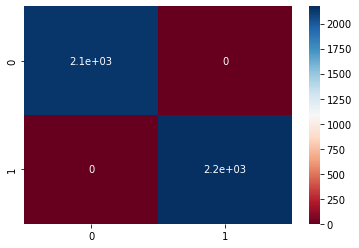

Model : Decision Tree Classifier tunned


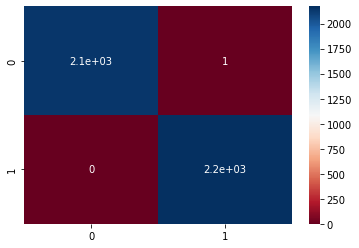

Model : Logistic Regression


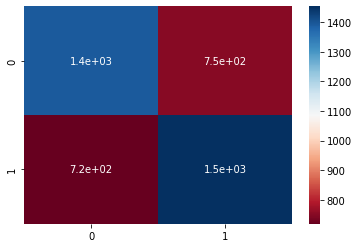

Model : Logistic Regression tunned


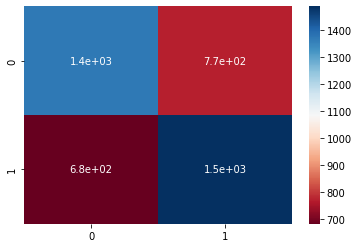

Model : KNN tunned


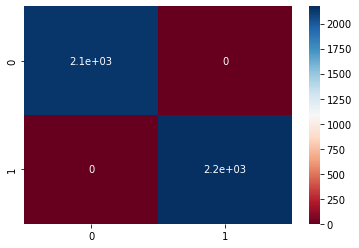

Model : KNN


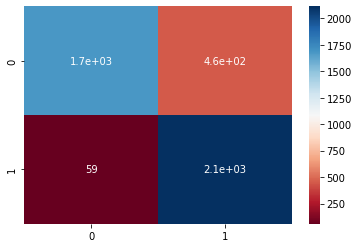

Model : SVC


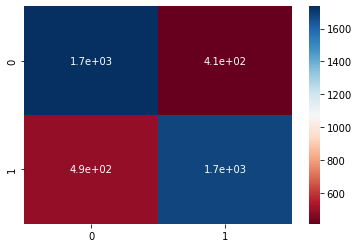

Model : SVC tunned


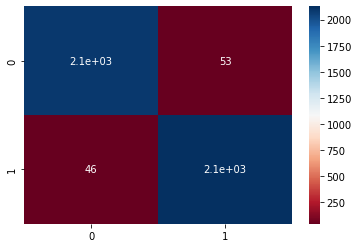

Model : XGB Classifier


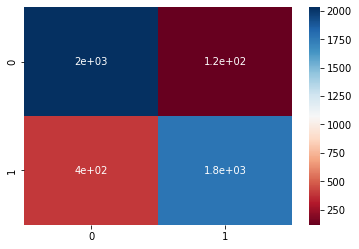

Model : XGB Classifier tunned


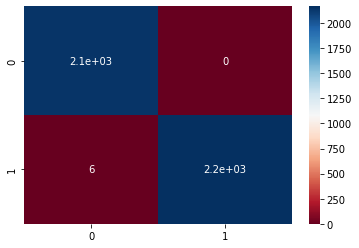

Model : Random Forest


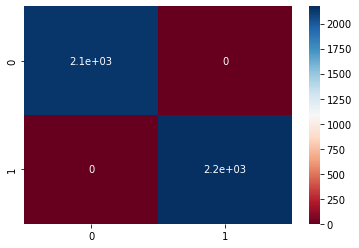

Model : Random Classifier tunned


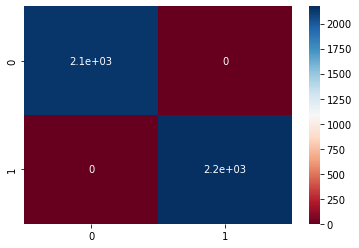

In [226]:
# Train confusion matrix
for name, matrix in train_confusion_matrix.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()

Model : Decision Tree Classifier


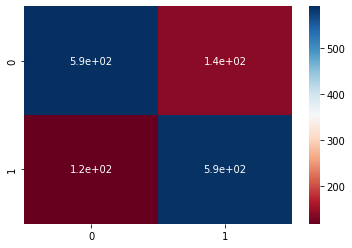

Model : Decision Tree Classifier tunned


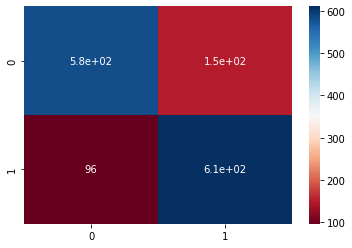

Model : Logistic Regression


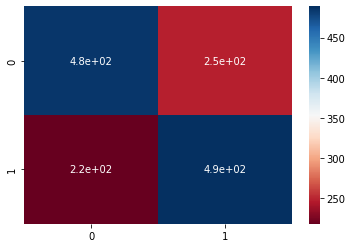

Model : Logistic Regression tunned


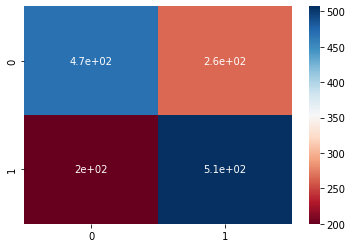

Model : KNN tunned


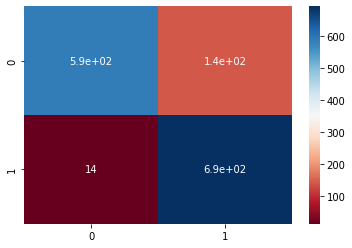

Model : KNN


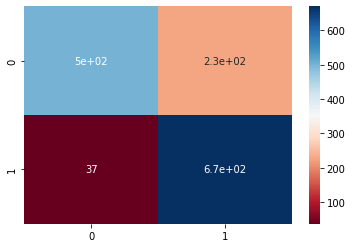

Model : SVC


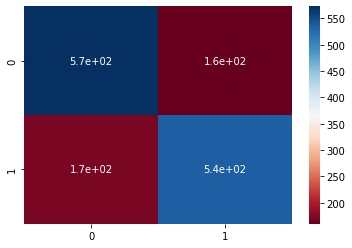

Model : SVC tunned


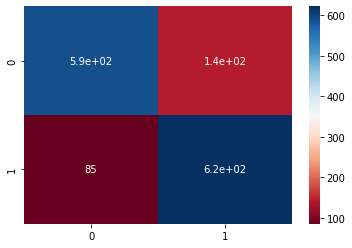

Model : XGB Classifier


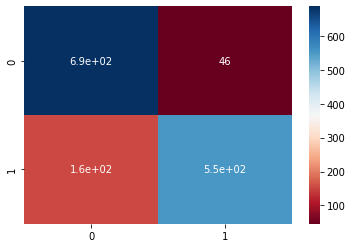

Model : XGB Classifier tunned


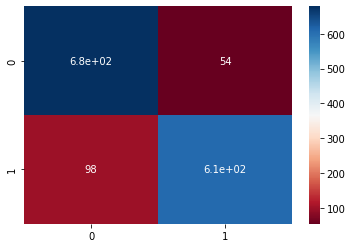

Model : Random Forest


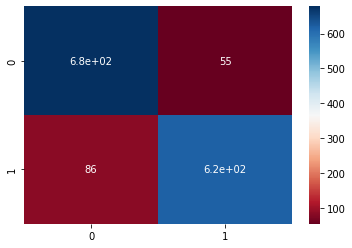

Model : Random Classifier tunned


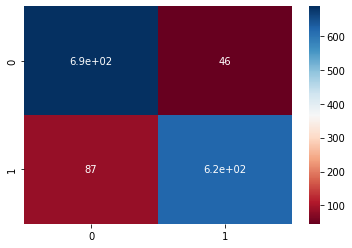

In [227]:
# Test confusion matrix
for name, matrix in test_confusion_matrix.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()

Text(0.5, 1.0, 'ROC CURVE')

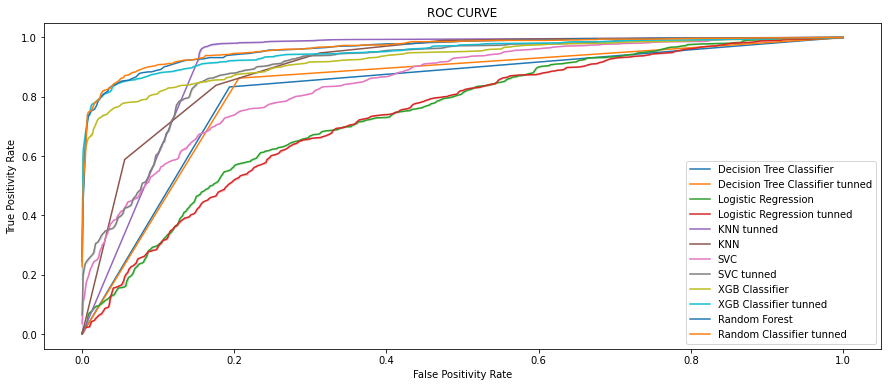

In [228]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Conclusion :**

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.

In [229]:
model_df

Model  Train Accuracy  Test Accuracy  \
0          Decision Tree Classifier        1.000000       0.819444   
1   Decision Tree Classifier tunned        0.999768       0.828472   
2               Logistic Regression        0.659101       0.676389   
3        Logistic Regression tunned        0.662575       0.677083   
4                               KNN        0.880037       0.815278   
5                        KNN tunned        1.000000       0.890972   
6                               SVC        0.790875       0.770139   
7                        SVC tunned        0.977073       0.841667   
8                    XGB Classifier        0.881195       0.860417   
9             XGB Classifier tunned        0.998610       0.894444   
10                    Random Forest        1.000000       0.902083   
11         Random Classifier tunned        1.000000       0.907639   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          1.000000        0.805746      1.000000     0.833098       1.000000   
1          0.999540        0.801837      1.000000     0.864215       0.999767   
2          0.658658        0.663501      0.668969     0.691655       0.659042   
3          0.658116        0.656736      0.685083     0.717115       0.662439   
4          0.821540        0.745273      0.972836     0.947666       0.879475   
5          1.000000        0.828947      1.000000     0.980198       1.000000   
6          0.803443        0.770115      0.773481     0.758133       0.790981   
7          0.975677        0.813072      0.978821     0.879774       0.977062   
8          0.938657        0.923077      0.817219     0.780764       0.881583   
9          1.000000        0.918552      0.997238     0.861386       0.998619   
10         1.000000        0.918639      1.000000     0.878359       1.000000   
11         1.000000        0.930931      1.000000     0.876945       1.000000   

    Test ROC AUC  Train F1   Test F1  
0       0.819687  1.000000  0.819193  
1       0.829106  0.999770  0.831858  
2       0.676660  0.663773  0.677285  
3       0.677793  0.671329  0.685598  
4       0.817626  0.890809  0.834371  
5       0.892555  1.000000  0.898250  
6       0.769926  0.788177  0.764077  
7       0.842343  0.977247  0.845109  
8       0.859004  0.873739  0.845977  
9       0.893858  0.998617  0.889051  
10      0.901663  1.000000  0.898048  
11      0.907095  1.000000  0.903132

# **Hyperparameter Tuning**

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  range(5,24),
                                                                      'min_samples_leaf': range(15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5),
          
          'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),
                                                      scoring='accuracy',
                                                      param_grid={'penalty' : ['l1', 'l2', 'elasticnet'],
                                                                  'C' : np.logspace(-4, 4, 20),
                                                                  'solver' : ['lbfgs','newton-cg','liblinear']},
                                                      cv=5),
          
          'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : range(4,10),
                                                   'weights' : ['uniform','distance'],
                                                   'metric' : ['minkowski','euclidean','manhattan']},
                                      cv=5),
          
          'SVC tunned' : RandomizedSearchCV(SVC(probability=True,random_state=42),
                                            param_distributions={'kernel' : ['rbf'],
                                             "C":[0.1, 1, 10, 100, 1000]}, 
                                            n_iter = 50,
                                            cv = 5, 
                                            verbose= 5, 
                                            random_state=42),
          
          'XGB Classifier tunned' : RandomizedSearchCV(XGBClassifier(random_state=42), 
                                                       param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                                                            'gamma': np.arange(0.0,40.0,0.005)},  
                                                       n_iter = 100,
                                                       verbose= 2, 
                                                       scoring="accuracy", 
                                                       cv=5),
          
          'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy', 'gini'],
                                                                'max_depth': [6,9,11,15,17,19,21,24],
                                                                'n_estimators': [50,100],
                                                                'max_features': ["auto", "sqrt", "log2",None,1,3,5,7] },
                                                          scoring='recall',
                                                          cv = 3, 
                                                          verbose= 2
                                                          )}

In [ ]:
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models,'tunning')

In [ ]:
model_table

In [ ]:
# Creating a dictionary for models
models = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
          'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [21],
                                                                      'min_samples_leaf': range(1,15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5)}

In [ ]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

DecisionTreeClassifier(max_depth=21, max_features=0.9, random_state=42)


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.999183       0.827546   
1  Decision Tree Classifier tunned        0.706988       0.663194   
2         Decision Tree Classifier        0.999183       0.827546   
3  Decision Tree Classifier tunned        0.962812       0.847222   
4         Decision Tree Classifier        0.999183       0.827546   
5  Decision Tree Classifier tunned        0.993666       0.828704   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.797778      0.998375     0.860911       0.999188   
1         0.649680        0.600962      0.906174     0.899281       0.705760   
2         1.000000        0.797778      0.998375     0.860911       0.999188   
3         0.984694        0.855362      0.940699     0.822542       0.962948   
4         1.000000        0.797778      0.998375     0.860911       0.999188   
5         0.997544        0.809195      0.989846     0.844125       0.993689   

   Test ROC AUC  Test F1  Train F1  max_depth  min_samples_leaf  max_features  \
0      0.828666      NaN       NaN        NaN               NaN           NaN   
1      0.671117      NaN       NaN        NaN               NaN           NaN   
2      0.828666      NaN       NaN        NaN               NaN           NaN   
3      0.846394      NaN       NaN        NaN               NaN           NaN   
4      0.828666      NaN       NaN        NaN               NaN           NaN   
5      0.829221      NaN       NaN        NaN               NaN           NaN   

   criterion  Test F1   Train F1   
0        NaN  0.828143   0.999187  
1        NaN  0.720461   0.756784  
2        NaN  0.828143   0.999187  
3        NaN  0.838631   0.962194  
4        NaN  0.828143   0.999187  
5        NaN  0.826291   0.993680

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=42),refit=False,
                                                           scoring=['recall','accuracy'],
                                                           param_grid={'max_depth':  [19,21,23],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5, return_train_score=False)
clf.fit(X_train, y_train)


{'mean_fit_time': array([0.01690173, 0.0090415 , 0.01141477, 0.0189281 , 0.00751462,
        0.00696044, 0.01055002, 0.01211181, 0.0129015 , 0.01356888,
        0.01743183, 0.01926417, 0.02022462, 0.00712781, 0.00902729,
        0.0137898 , 0.01309891, 0.01476092, 0.01636291, 0.01980791,
        0.0087019 , 0.01073656, 0.01135664, 0.02133193, 0.00743184,
        0.00750442, 0.00948319, 0.01227837, 0.01340909, 0.01320162,
        0.01614766, 0.01646419, 0.01879191, 0.00708208, 0.00885224,
        0.01192837, 0.01320786, 0.01836476, 0.01702371, 0.01937957,
        0.00917158, 0.00937362, 0.01113811, 0.02244563, 0.00722232,
        0.00731802, 0.00922565, 0.01225357, 0.01293979, 0.01278973,
        0.01490116, 0.01663051, 0.01832976, 0.00840063, 0.00913639,
        0.01113548, 0.01402116, 0.01686082, 0.01654515, 0.01795101,
        0.01240625, 0.01246176, 0.01692071, 0.03034987, 0.00881524,
        0.00888705, 0.0124846 , 0.01745443, 0.01511159, 0.01275988,
        0.01452932, 0.01628361,

In [ ]:
df[['param_criterion','param_max_depth','param_min_samples_leaf','param_max_features','mean_test_accuracy','mean_test_recall']]

param_criterion param_max_depth param_min_samples_leaf param_max_features  \
0              gini              19                      1               auto   
1              gini              19                      1               sqrt   
2              gini              19                      1               log2   
3              gini              19                      1               None   
4              gini              19                      1                0.1   
..              ...             ...                    ...                ...   
115         entropy              23                      1                  3   
116         entropy              23                      1                  4   
117         entropy              23                      1                  5   
118         entropy              23                      1                  6   
119         entropy              23                      1                  7   

     mean_test_accuracy  mean_test_recall  
0              0.836125          0.834681  
1              0.836125          0.834681  
2              0.824682          0.828590  
3              0.843071          0.850937  
4              0.817733          0.807470  
..                  ...               ...  
115            0.814872          0.818432  
116            0.831428          0.839972  
117            0.846139          0.844862  
118            0.837762          0.848514  
119            0.838577          0.839159  

[120 rows x 6 columns]

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.016902      0.008703         0.007243        0.004103   
1         0.009042      0.000278         0.003857        0.000060   
2         0.011415      0.000264         0.003961        0.000162   
3         0.018928      0.000255         0.003778        0.000051   
4         0.007515      0.001020         0.003921        0.000180   
..             ...           ...              ...             ...   
115       0.010723      0.000463         0.002275        0.000008   
116       0.012721      0.000501         0.002295        0.000009   
117       0.015107      0.001210         0.002294        0.000022   
118       0.017293      0.001068         0.002445        0.000335   
119       0.019882      0.001531         0.002741        0.000584   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0              gini              19               auto                      1   
1              gini              19               sqrt                      1   
2              gini              19               log2                      1   
3              gini              19               None                      1   
4              gini              19                0.1                      1   
..              ...             ...                ...                    ...   
115         entropy              23                  3                      1   
116         entropy              23                  4                      1   
117         entropy              23                  5                      1   
118         entropy              23                  6                      1   
119         entropy              23                  7                      1   

                                                params  split0_test_recall  \
0    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
1    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
2    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.817444   
3    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.835700   
4    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.805274   
..                                                 ...                 ...   
115  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.817444   
116  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.821501   
117  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.797160   
118  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.827586   
119  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.825558   

     ...  std_test_recall  rank_test_recall  split0_test_accuracy  \
0    ...         0.014863                53              0.842697   
1    ...         0.014863                53              0.842697   
2    ...         0.012010                75              0.823289   
3    ...         0.017101                 4              0.843718   
4    ...         0.014443               118              0.820225   
..   ...              ...               ...                   ...   
115  ...         0.014667               100              0.821246   
116  ...         0.010705                27              0.828396   
117  ...         0.027558                15              0.826353   
118  ...         0.023599                 8              0.828396   
119  ...         0.010410                32              0.836568   

     split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0                0.839632              0.828396              0.836568   
1                0.839632              0.828396              0.836568   
2                0.840654              0.830439              0.808989   
3                0.845761              0.839632              0.854954   
4                0.819203              0.811032              0.835546   

In [ ]:
# Creating a dataframe
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters'])


In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df_1,x,y,z,a):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'Parameters': model.best_params_
                                },
                               ignore_index = True)

  return model_df_1

In [ ]:
for x in range(21,24):
  for y in range(1,15):
    for z in ["auto", "sqrt", "log2",None, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)                                                            


In [ ]:
model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

In [ ]:
model_df_1['score']=0
for col in ["Train Accuracy Rank","Test Accuracy Rank","Train Precision Rank",
            "Test Precision Rank","Train Recall Rank","Test Recall Rank",
            "Train ROC AUC Rank","Test ROC AUC Rank","Train F1 Rank","Test F1 Rank"]:
   model_df_1['score']= model_df_1['score']+ model_df_1[col]

In [ ]:
temp=model_df_1.sort_values(by='score',ascending=False)

In [ ]:
temp

Model  Train Accuracy  Test Accuracy  \
861   Decision Tree Classifier tunned        0.999074       0.818750   
851   Decision Tree Classifier tunned        0.999074       0.818750   
847   Decision Tree Classifier tunned        1.000000       0.820139   
869   Decision Tree Classifier tunned        1.000000       0.820139   
431   Decision Tree Classifier tunned        0.997684       0.818750   
...                               ...             ...            ...   
1148  Decision Tree Classifier tunned        0.786475       0.715972   
1156  Decision Tree Classifier tunned        0.786475       0.715972   
316   Decision Tree Classifier tunned        0.786475       0.715972   
797   Decision Tree Classifier tunned        0.788328       0.686111   
789   Decision Tree Classifier tunned        0.788328       0.686111   

      Train Precision  Test Precision  Train Recall  Test Recall  \
861          0.999539        0.808864      0.998619     0.826025   
851          0.999539        0.808864      0.998619     0.826025   
847          1.000000        0.799465      1.000000     0.845827   
869          1.000000        0.799465      1.000000     0.845827   
431          0.997698        0.808011      0.997698     0.827440   
...               ...             ...           ...          ...   
1148         0.799904        0.726444      0.767495     0.676096   
1156         0.799904        0.726444      0.767495     0.676096   
316          0.799904        0.726444      0.767495     0.676096   
797          0.798387        0.682927      0.774862     0.673267   
789          0.798387        0.682927      0.774862     0.673267   

      Train ROC AUC  Test ROC AUC   Test F1  ...  Test Accuracy Rank  \
861        0.999076      0.818879  0.817355  ...              1233.5   
851        0.999076      0.818879  0.817355  ...              1233.5   
847        1.000000      0.820594  0.821993  ...              1244.5   
869        1.000000      0.820594  0.821993  ...              1244.5   
431        0.997684      0.818904  0.817610  ...              1233.5   
...             ...           ...       ...  ...                 ...   
1148       0.786590      0.715265  0.700366  ...                21.5   
1156       0.786590      0.715265  0.700366  ...                21.5   
316        0.786590      0.715265  0.700366  ...                21.5   
797        0.788410      0.685883  0.678063  ...                 1.5   
789        0.788410      0.685883  0.678063  ...                 1.5   

     Train Precision Rank  Test Precision Rank  Train Recall Rank  \
861                1229.5               1043.5             1226.0   
851                1229.5               1043.5             1226.0   
847                1246.5                820.5             1249.5   
869                1246.5                820.5             1249.5   
431                1213.5               1020.5             1219.5   
...                   ...                  ...                ...   
1148                 21.5                 47.5                3.5   
1156                 21.5                 47.5                3.5   
316                  21.5                 47.5                3.5   
797                  17.5                  1.5               10.5   
789                  17.5                  1.5               10.5   

      Test Recall Rank  Train ROC AUC Rank  Test ROC AUC Rank  Train F1 Rank  \
861             1201.5              1227.5             1232.5         1227.5   
851             1201.5              1227.5             1232.5         1227.5   
847             1241.5              1251.5             1244.5         1251.5   
869             1241.5              1251.5             1244.5         1251.5   
431             1203.5              1220.5             1234.5         1220.5   
...                ...                 ...                ...            ...   
1148              19.5                 5.5               23.5            3.5   
1156            

In [ ]:
temp_1=temp[['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','Parameters']]
                              

In [ ]:
temp_1

Model  Train Accuracy  Test Accuracy  \
861   Decision Tree Classifier tunned        0.999074       0.818750   
851   Decision Tree Classifier tunned        0.999074       0.818750   
847   Decision Tree Classifier tunned        1.000000       0.820139   
869   Decision Tree Classifier tunned        1.000000       0.820139   
431   Decision Tree Classifier tunned        0.997684       0.818750   
...                               ...             ...            ...   
1148  Decision Tree Classifier tunned        0.786475       0.715972   
1156  Decision Tree Classifier tunned        0.786475       0.715972   
316   Decision Tree Classifier tunned        0.786475       0.715972   
797   Decision Tree Classifier tunned        0.788328       0.686111   
789   Decision Tree Classifier tunned        0.788328       0.686111   

      Train Precision  Test Precision  Train Recall  Test Recall  \
861          0.999539        0.808864      0.998619     0.826025   
851          0.999539        0.808864      0.998619     0.826025   
847          1.000000        0.799465      1.000000     0.845827   
869          1.000000        0.799465      1.000000     0.845827   
431          0.997698        0.808011      0.997698     0.827440   
...               ...             ...           ...          ...   
1148         0.799904        0.726444      0.767495     0.676096   
1156         0.799904        0.726444      0.767495     0.676096   
316          0.799904        0.726444      0.767495     0.676096   
797          0.798387        0.682927      0.774862     0.673267   
789          0.798387        0.682927      0.774862     0.673267   

      Train ROC AUC  Test ROC AUC   Test F1  Train F1  \
861        0.999076      0.818879  0.817355  0.999079   
851        0.999076      0.818879  0.817355  0.999079   
847        1.000000      0.820594  0.821993  1.000000   
869        1.000000      0.820594  0.821993  1.000000   
431        0.997684      0.818904  0.817610  0.997698   
...             ...           ...       ...       ...   
1148       0.786590      0.715265  0.700366  0.783365   
1156       0.786590      0.715265  0.700366  0.783365   
316        0.786590      0.715265  0.700366  0.783365   
797        0.788410      0.685883  0.678063  0.786449   
789        0.788410      0.685883  0.678063  0.786449   

                                             Parameters  
861   {'criterion': 'entropy', 'max_depth': 23, 'max...  
851   {'criterion': 'entropy', 'max_depth': 23, 'max...  
847   {'criterion': 'entropy', 'max_depth': 23, 'max...  
869   {'criterion': 'entropy', 'max_depth': 23, 'max...  
431   {'criterion': 'entropy', 'max_depth': 22, 'max...  
...                                                 ...  
1148  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
1156  {'criterion': 'gini', 'max_depth': 23, 'max_fe...  
316   {'criterion': 'gini', 'max_depth': 21, 'max_fe...  
797   {'criterion': 'entropy', 'max_depth': 22, 'max...  
789   {'criterion': 'entropy', 'max_depth': 22, 'max...  

[1260 rows x 12 columns]

In [ ]:
for x in range(5,24):
  for y in range(15):
    for z in ["auto", "sqrt", "log2",None,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)    

KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier(metric='euclidean', n_neighbors=4)
KNeighborsClassifier(metric='manhattan', n_neighbors=4)
KNeighborsClassifier(n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
KNeighborsClassifier()
KNeighborsClassifier(metric='euclidean')
KNeighborsClassifier(metric='manhattan')
KNeighborsClassifier(weights='distance')
KNeighborsClassifier(metric='euclidean', weights='distance')
KNeighborsClassifier(metric='manhattan', weights='distance')
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(metric='euclidean', n_neighbors=6)
KNeighborsClassifier(metric='manhattan', n_neighbors=6)
KNeighborsClassifier(n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
KNeighborsClassifier

In [ ]:
model_df_1

Model  Train Accuracy  Test Accuracy  \
0   Decision Tree Classifier tunned        0.897834       0.806713   
1   Decision Tree Classifier tunned        0.897834       0.806713   
2   Decision Tree Classifier tunned        0.909890       0.824074   
3   Decision Tree Classifier tunned        0.999183       0.822917   
4   Decision Tree Classifier tunned        0.999183       0.822917   
5   Decision Tree Classifier tunned        0.999183       0.857639   
6   Decision Tree Classifier tunned        0.863302       0.780093   
7   Decision Tree Classifier tunned        0.863302       0.780093   
8   Decision Tree Classifier tunned        0.895995       0.826389   
9   Decision Tree Classifier tunned        0.999183       0.807870   
10  Decision Tree Classifier tunned        0.999183       0.807870   
11  Decision Tree Classifier tunned        0.999183       0.854167   
12  Decision Tree Classifier tunned        0.861054       0.785880   
13  Decision Tree Classifier tunned        0.861054       0.785880   
14  Decision Tree Classifier tunned        0.881079       0.825231   
15  Decision Tree Classifier tunned        0.999183       0.807870   
16  Decision Tree Classifier tunned        0.999183       0.807870   
17  Decision Tree Classifier tunned        0.999183       0.857639   
18  Decision Tree Classifier tunned        0.833470       0.766204   
19  Decision Tree Classifier tunned        0.833470       0.766204   
20  Decision Tree Classifier tunned        0.871680       0.809028   
21  Decision Tree Classifier tunned        0.999183       0.800926   
22  Decision Tree Classifier tunned        0.999183       0.800926   
23  Decision Tree Classifier tunned        0.999183       0.843750   
24  Decision Tree Classifier tunned        0.834287       0.766204   
25  Decision Tree Classifier tunned        0.834287       0.766204   
26  Decision Tree Classifier tunned        0.857581       0.800926   
27  Decision Tree Classifier tunned        0.999183       0.806713   
28  Decision Tree Classifier tunned        0.999183       0.806713   
29  Decision Tree Classifier tunned        0.999183       0.846065   
30  Decision Tree Classifier tunned        0.812219       0.751157   
31  Decision Tree Classifier tunned        0.812219       0.751157   
32  Decision Tree Classifier tunned        0.848386       0.797454   
33  Decision Tree Classifier tunned        0.999183       0.791667   
34  Decision Tree Classifier tunned        0.999183       0.791667   
35  Decision Tree Classifier tunned        0.999183       0.837963   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          0.885917        0.785388      0.914703     0.824940       0.897730   
1          0.885917        0.785388      0.914703     0.824940       0.897730   
2          0.926551        0.849604      0.891552     0.772182       0.910003   
3          1.000000        0.768293      0.998375     0.906475       0.999188   
4          1.000000        0.768293      0.998375     0.906475       0.999188   
5          1.000000        0.828125      0.998375     0.889688       0.999188   
6          0.807126        0.720388      0.956946     0.889688       0.862724   
7          0.807126        0.720388      0.956946     0.889688       0.862724   
8          0.867797        0.805492      0.935825     0.844125       0.895749   
9          1.000000        0.742747      0.998375     0.920863       0.999188   
10         1.000000        0.742747      0.998375     0.920863       0.999188   
11         1.000000        0.816993      0.998375     0.899281       0.999188   
12         0.834962        0.754386      0.902112     0.824940       0.860801   
13         0.834962        0.754386      0.902112     0.824940       0.860801   
14         0.893635        0.844560      0.866775     0.781775       0.881167   
15         1.000000        0.748515      0.998375     0.906475       0.999188   
16         1.000000        0.748515      0.998375     0.906475